In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pysam
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import mode

In [2]:
sex_palette = {'Male': '#5197D0', 'Female': '#FF7593'}
cohort_palette={'ucsf': '#82C61A', 'uq':'#E85F22'}
type_palette={'als':'#ef622b', 'ctrl':'#af1a24'}
blue_orange={'ctrl':'#7da7cd', 'als':'#ef622b'}

In [3]:
ucsf = pd.read_csv("./ucsf/all_fragments/fragment_lengths.csv")
uq = pd.read_csv("./uq/all_fragments/fragment_lengths.csv")

KeyboardInterrupt: 

In [ ]:
uq['Sample'] = uq['Sample'].astype(int) + 96

In [ ]:
for i in range(1,97):
    iso = ucsf[ucsf['Sample'] == i]['Fragment Size']
    iso.to_csv(f'./ucsf/all_fragments/{i}.csv', index = False)
    print(i)

In [ ]:
for i in range(97,193):
    iso = uq[uq['Sample'] == i]['Fragment Size']
    iso.to_csv(f'./uq/all_fragments/{i}.csv', index = False)
    print(i)

In [ ]:
ucsf_fragment_counts = ucsf.groupby('Sample').size().reset_index(name='Fragment Count')
uq_fragment_counts = uq.groupby('Sample').size().reset_index(name='Fragment Count')
fragment_counts = pd.concat([ucsf_fragment_counts, uq_fragment_counts])

In [3]:
clinical = pd.read_csv("../als_cfdna_samples/combined_metadata_redone.csv")

In [4]:
#clinical.to_csv("../als_cfdna_samples/combined_metadata_redone.csv", index=False)

In [5]:
clinical = clinical.drop(191)
clinical = clinical.drop(95)

In [6]:
clinical

sample_num     collection_ID sample_type sample_type_3 als_type cohort  \
0             1               NaN        ctrl          ctrl      NaN   ucsf   
1             2               NaN        ctrl          ctrl      NaN   ucsf   
2             3               NaN        ctrl          ctrl      NaN   ucsf   
3             4               NaN        ctrl          ctrl      NaN   ucsf   
4             5               NaN        ctrl          ctrl      NaN   ucsf   
..          ...               ...         ...           ...      ...    ...   
186         187   7688281_1012423        ctrl          ctrl      NaN     uq   
187         188   4629546_1012500        ctrl          ctrl      NaN     uq   
188         189  9795053_11022889        ctrl           ond      NaN     uq   
189         190  8941124_11024590        ctrl           ond      NaN     uq   
190         191  2234555_11025967        ctrl           ond      NaN     uq   

     als_frs  als_frs_slope   age  age_at_onset   ... plasma_volume  \
0        NaN            NaN  74.0            NaN  ...           3.0   
1        NaN            NaN  57.0            NaN  ...           3.0   
2        NaN            NaN  47.0            NaN  ...           7.5   
3        NaN            NaN  55.0            NaN  ...           7.5   
4        NaN            NaN  80.0            NaN  ...           8.0   
..       ...            ...   ...            ...  ...           ...   
186      NaN            NaN   NaN            NaN  ...           3.8   
187      NaN            NaN  70.0            NaN  ...           3.5   
188      NaN            NaN  69.0            NaN  ...           5.0   
189      NaN            NaN  65.0            NaN  ...           4.0   
190      NaN            NaN  81.0            NaN  ...           3.7   

    years_since_onset input_cfdna  fvc  mt_reads  pre_otr  post_otr  \
0                 NaN      2.3200  NaN      2233  2691406    256684   
1                 NaN      7.8000  NaN      1122  1864200    195718   
2                 NaN      6.2800  NaN      8487  2607236    257410   
3                 NaN      6.7800  NaN       620  2443048    227446   
4                 NaN     18.7000  NaN      3102  2716064    279048   
..                ...         ...  ...       ...      ...       ...   
186               NaN      6.8580  NaN       610  1762746    199298   
187               NaN      9.1252  NaN       629  2507472    248900   
188               NaN      7.2908  NaN       630  3144424    305318   
189               NaN      3.1892  NaN       539  1089080    153756   
190               NaN      1.5380  NaN       584  1782920    191670   

        mean_fl  median_fl  num_fragments  
0    175.535263      174.0        7278060  
1    182.714829      177.0        6061038  
2    187.014856      177.0        7926972  
3    196.295752      182.0        7583456  
4    185.834278      175.0        8698916  
..          ...        ...            ...  
186  170.640706      171.0        6306047  
187  170.402455      170.0        8279622  
188  178.033675      173.0       11479193  
189  197.413462      177.0        2960806  
190  182.699271      175.0        7477693  

[190 rows x 24 columns]

In [7]:
ucsf.head()

NameError: name 'ucsf' is not defined

In [ ]:
pearson_corr = clinical['input_cfdna'].corr(clinical['num_fragments'])
spearman_corr = clinical['input_cfdna'].corr(clinical['num_fragments'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=clinical, x='input_cfdna', y='num_fragments', hue='cohort')
sns.regplot(x='input_cfdna', y='num_fragments', data=clinical, scatter=False, color='red')
plt.title(f'Number of fragments by input cfDNA \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('Input CfDNA')
plt.ylabel('Number of fragments')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='cohort', y='input_cfdna')
plt.title('input cfdna by cohort')
plt.ylabel('input cfdna')
plt.show()

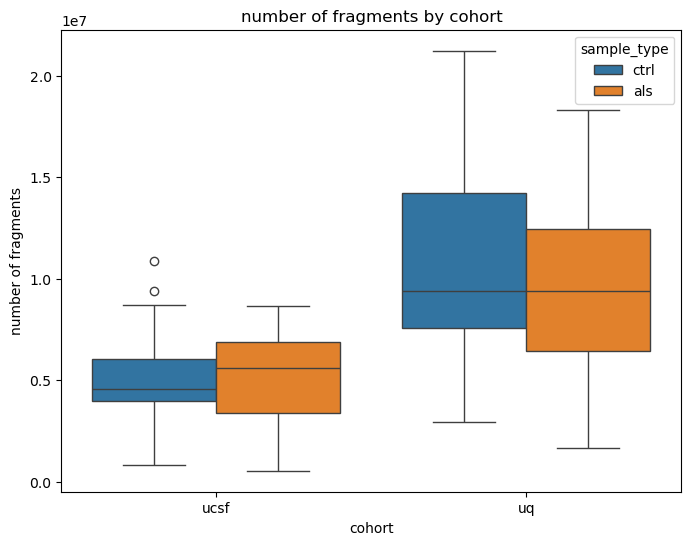

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='cohort', y='num_fragments', hue='sample_type')
plt.title('number of fragments by cohort')
plt.ylabel('number of fragments')
plt.show()

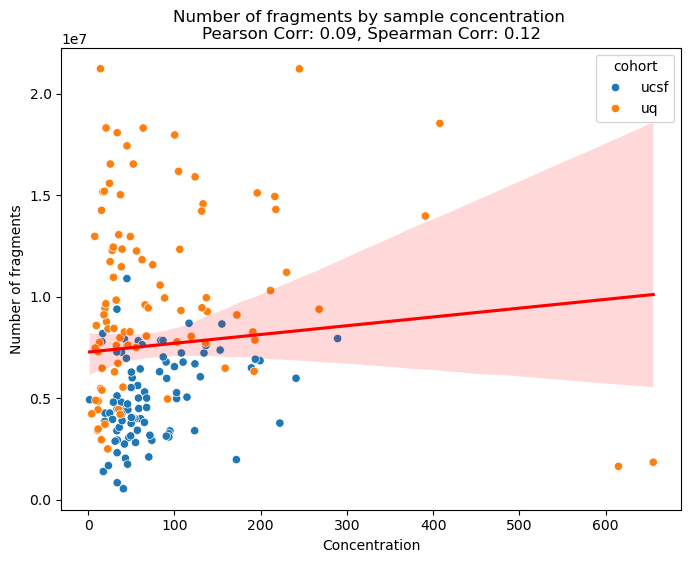

In [11]:
pearson_corr = clinical['concentration'].corr(clinical['num_fragments'])
spearman_corr = clinical['concentration'].corr(clinical['num_fragments'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=clinical, x='concentration', y='num_fragments', hue='cohort')
sns.regplot(x='concentration', y='num_fragments', data=clinical, scatter=False, color='red')
plt.title(f'Number of fragments by sample concentration \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('Concentration')
plt.ylabel('Number of fragments')
plt.show()

In [12]:
ucsf_counts = pd.read_csv("./ucsf/ucsf_counts.csv")
ucsf_counts.set_index('Sample', inplace=True)
uq_counts = pd.read_csv("./uq/uq_counts.csv")
uq_counts.set_index('Sample', inplace=True)
all_counts = pd.concat([ucsf_counts, uq_counts])

In [13]:
all_counts

50    51    52    53    54    55    56    57    58    59  ...  491  \
Sample                                                             ...        
1       144   126   146   151   165   168   234   201   265   212  ...    0   
2       489   540   523   648   656   645   718   762   822   851  ...    0   
3       702   728   772   798   780   874   903  1077  1077  1149  ...    0   
4       620   742   757   766   835   872   984  1062  1079  1103  ...    0   
5       944  1042  1183  1119  1348  1341  1475  1500  1624  1717  ...    0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
188     103   101   102   148   124   153   133   415   412   466  ...    0   
189     426   439   446   512   548   612   686   761   735   846  ...    0   
190     126   125   126   112   162   189   197   223   209   271  ...  154   
191     256   269   319   372   359   420   442   426   520   598  ...    0   
192     104   104   121   123   152   121   153   172   175   195  ...    0   

        492  493  494  495  496  497  498  499  500  
Sample                                               
1         0    0    0    0    0    0    0    0    0  
2         0    0    0    0    0    0    0    0    0  
3         0    0    0    0    0    0    0    0    0  
4         0    0    0    0    0    0    0    0    0  
5         0    0    0    0    0    0    0    0    0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  
188       0    0    0    0    0    0    0    0    0  
189       0    0    0    0    0    0    0    0    0  
190     156  173  138   92   70   85   47   21   13  
191       0    0    0    0    0    0    0    0    0  
192       0    0    0    0    0    0    0    0    0  

[192 rows x 451 columns]

In [14]:
# Normalize each row by dividing by the sum of all counts in that row
normalized_counts = all_counts.div(all_counts.sum(axis=1), axis=0)

# Reset index to keep 'Sample' as a column
normalized_counts.reset_index(inplace=True)

/tmp/ipykernel_198458/3906930768.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized_counts.reset_index(inplace=True)


In [15]:
normalized_counts.set_index('Sample', inplace=True)

In [16]:
normalized_counts = pd.DataFrame(normalized_counts)

In [17]:
normalized_counts

50        51        52        53        54        55        56  \
Sample                                                                         
1       0.000020  0.000017  0.000020  0.000021  0.000023  0.000023  0.000032   
2       0.000081  0.000089  0.000086  0.000107  0.000108  0.000106  0.000118   
3       0.000089  0.000092  0.000097  0.000101  0.000098  0.000110  0.000114   
4       0.000082  0.000098  0.000100  0.000101  0.000110  0.000115  0.000130   
5       0.000109  0.000120  0.000136  0.000129  0.000155  0.000154  0.000170   
...          ...       ...       ...       ...       ...       ...       ...   
188     0.000012  0.000012  0.000012  0.000018  0.000015  0.000018  0.000016   
189     0.000037  0.000038  0.000039  0.000045  0.000048  0.000053  0.000060   
190     0.000043  0.000042  0.000043  0.000038  0.000055  0.000064  0.000067   
191     0.000034  0.000036  0.000043  0.000050  0.000048  0.000056  0.000059   
192     0.000009  0.000009  0.000011  0.000011  0.000014  0.000011  0.000014   

              57        58        59  ...       491       492       493  \
Sample                                ...                                 
1       0.000028  0.000036  0.000029  ...  0.000000  0.000000  0.000000   
2       0.000126  0.000136  0.000140  ...  0.000000  0.000000  0.000000   
3       0.000136  0.000136  0.000145  ...  0.000000  0.000000  0.000000   
4       0.000140  0.000142  0.000145  ...  0.000000  0.000000  0.000000   
5       0.000172  0.000187  0.000197  ...  0.000000  0.000000  0.000000   
...          ...       ...       ...  ...       ...       ...       ...   
188     0.000050  0.000050  0.000056  ...  0.000000  0.000000  0.000000   
189     0.000066  0.000064  0.000074  ...  0.000000  0.000000  0.000000   
190     0.000075  0.000071  0.000092  ...  0.000052  0.000053  0.000058   
191     0.000057  0.000070  0.000080  ...  0.000000  0.000000  0.000000   
192     0.000016  0.000016  0.000018  ...  0.000000  0.000000  0.000000   

             494       495       496       497       498       499       500  
Sample                                                                        
1       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...          ...       ...       ...       ...       ...       ...       ...  
188     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
189     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
190     0.000047  0.000031  0.000024  0.000029  0.000016  0.000007  0.000004  
191     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
192     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[192 rows x 451 columns]

In [18]:
def plot_sample_distribution(sample_id):
    # Select the row for the specific sample
    sample_data = normalized_counts.iloc[sample_id-1]
    
    fragment_lengths = normalized_counts.columns.astype(int)  # Fragment lengths (50-500)
    counts = sample_data.values.flatten()
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(fragment_lengths, counts, width=1)
    plt.xlabel('Fragment Length (bp)')
    plt.ylabel('Normalized Read Count')
    plt.title(f'Fragment Length Distribution for Sample {sample_id}')
    plt.show()

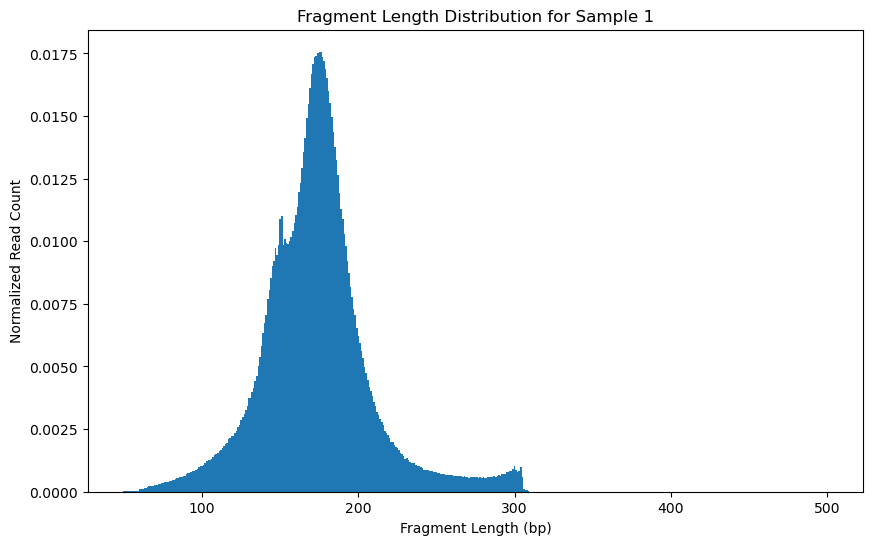

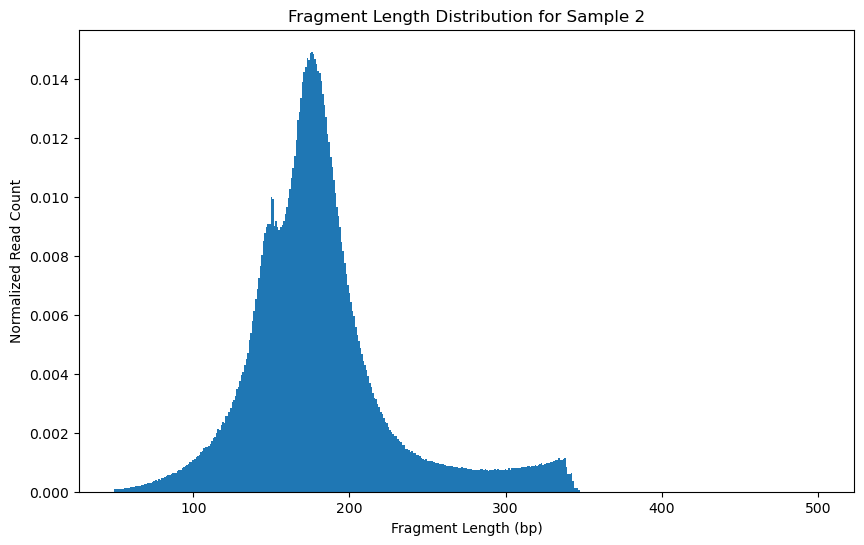

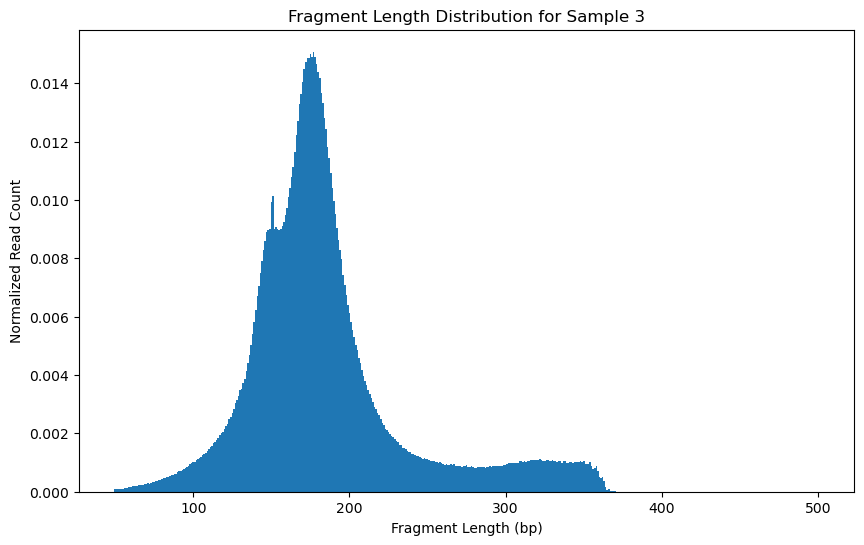

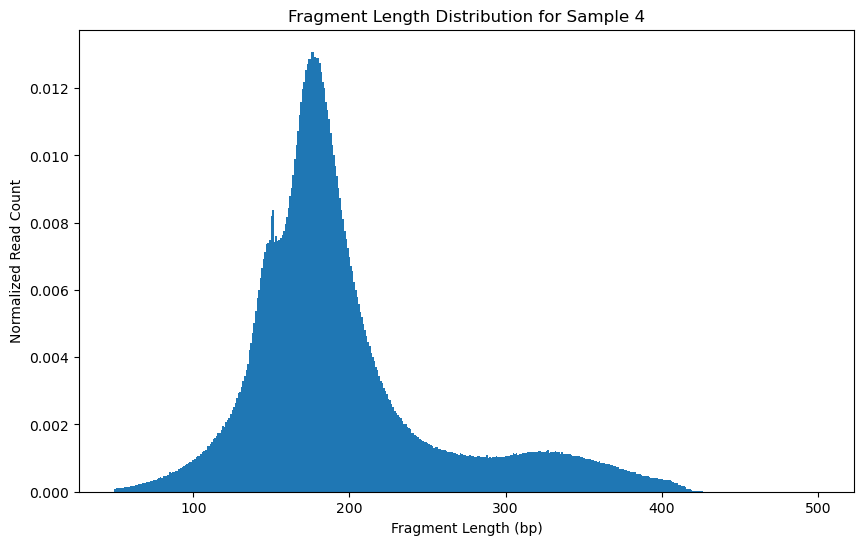

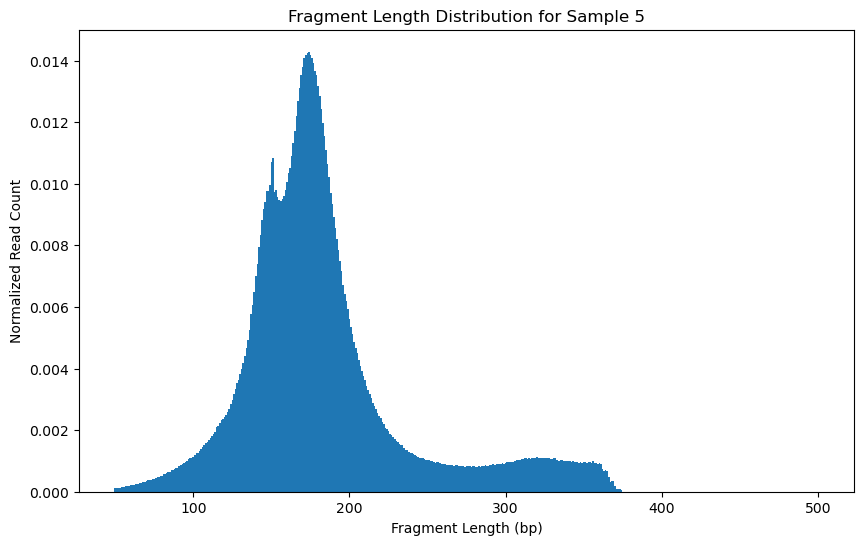

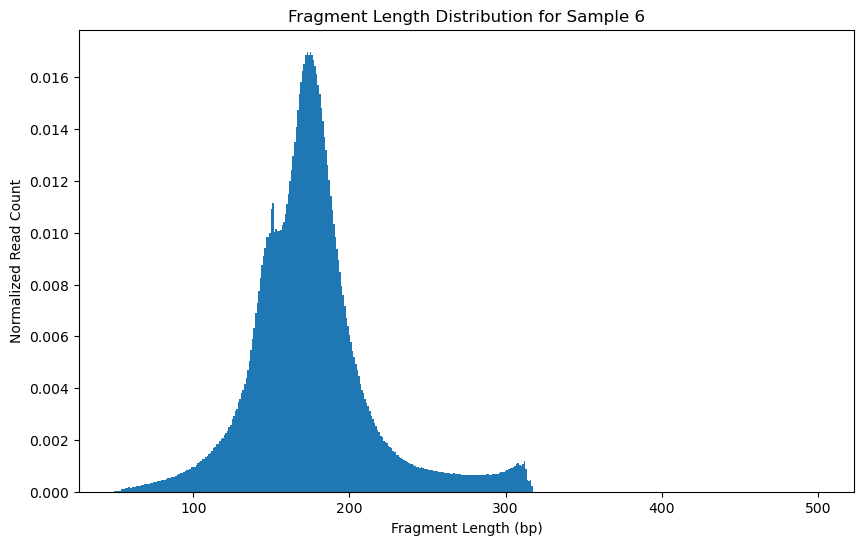

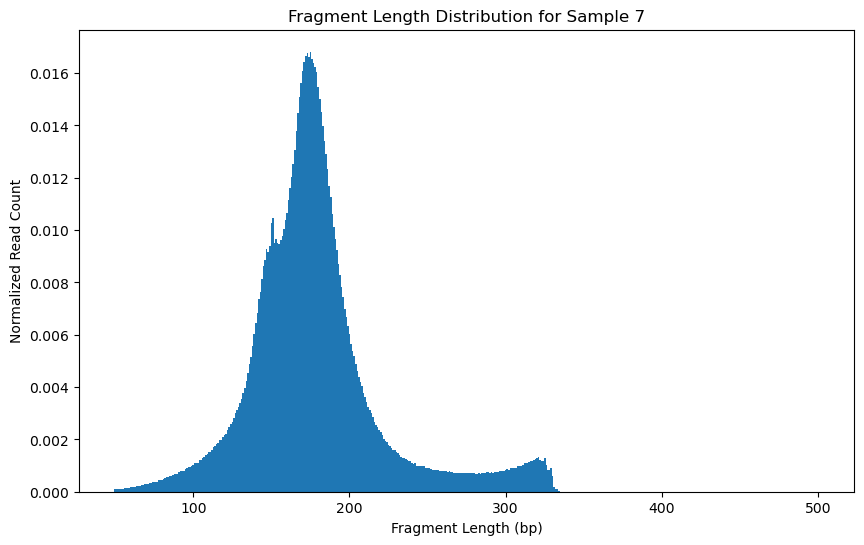

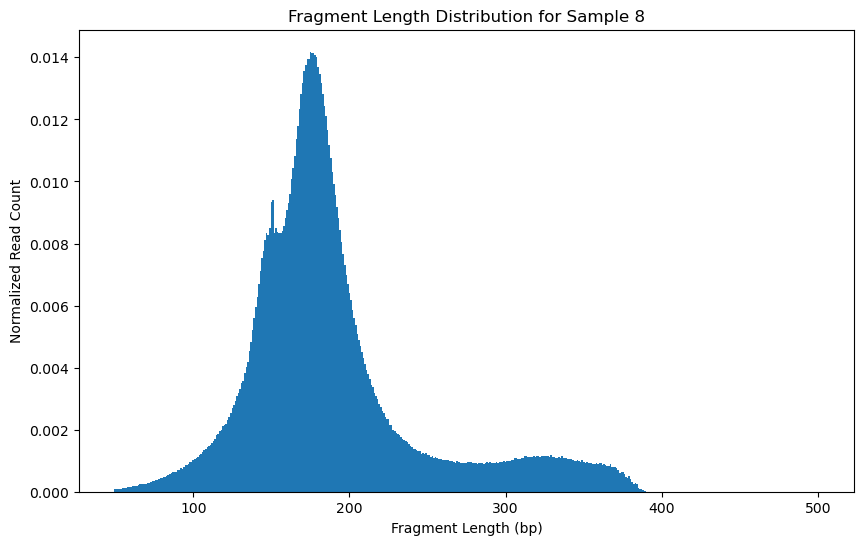

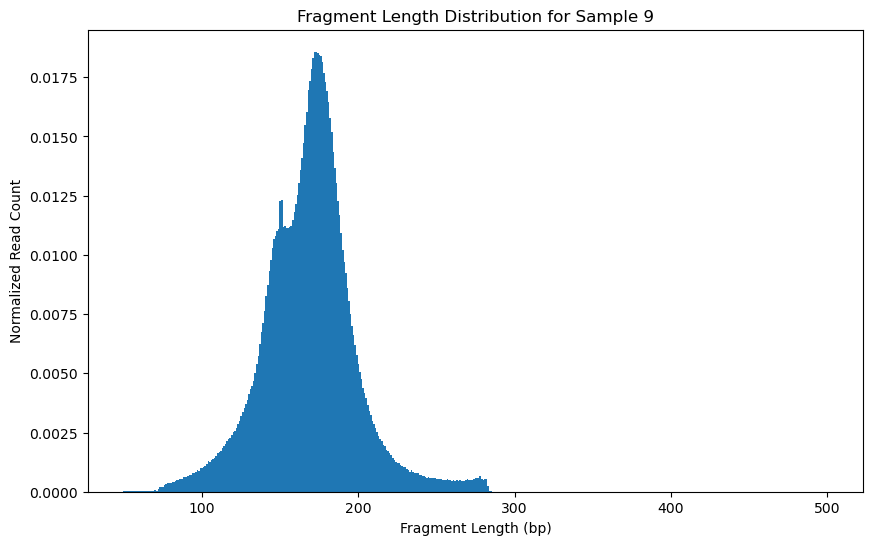

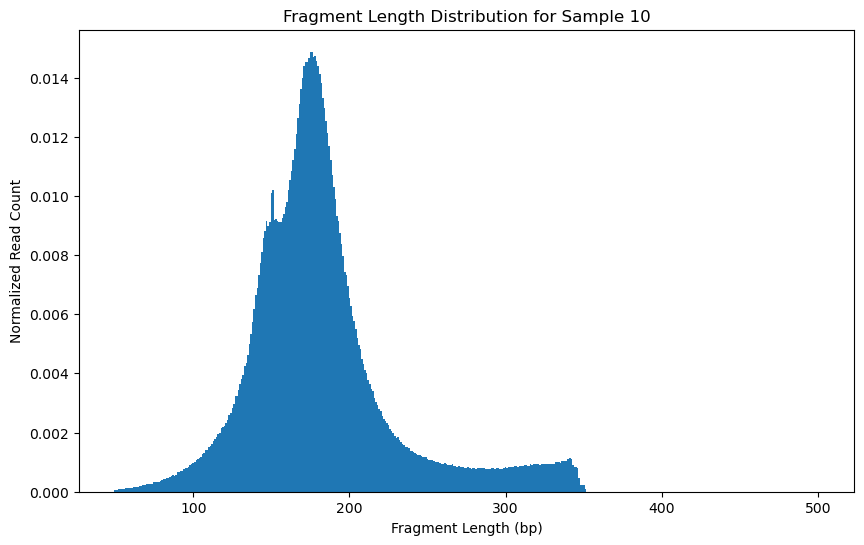

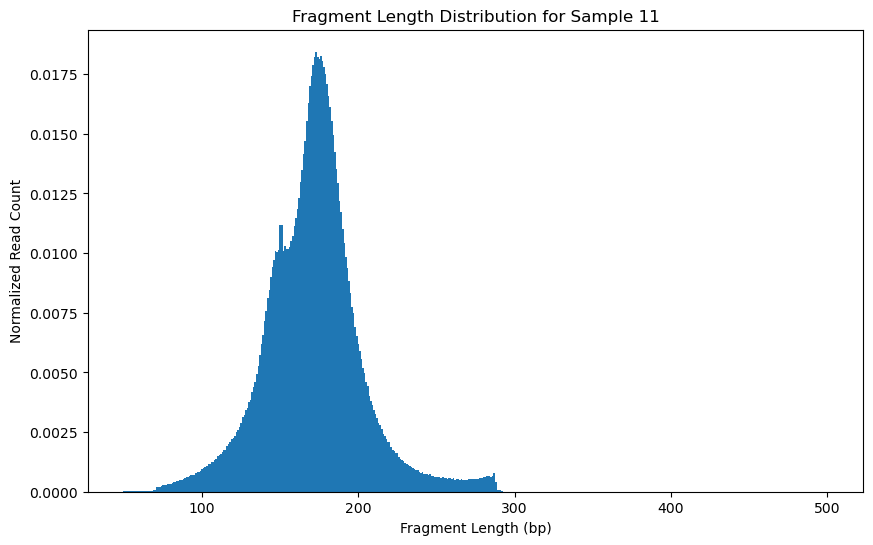

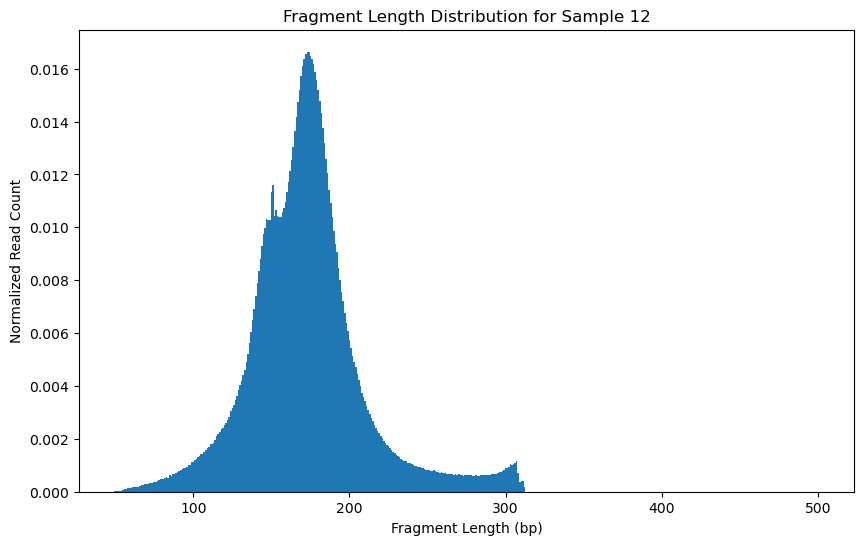

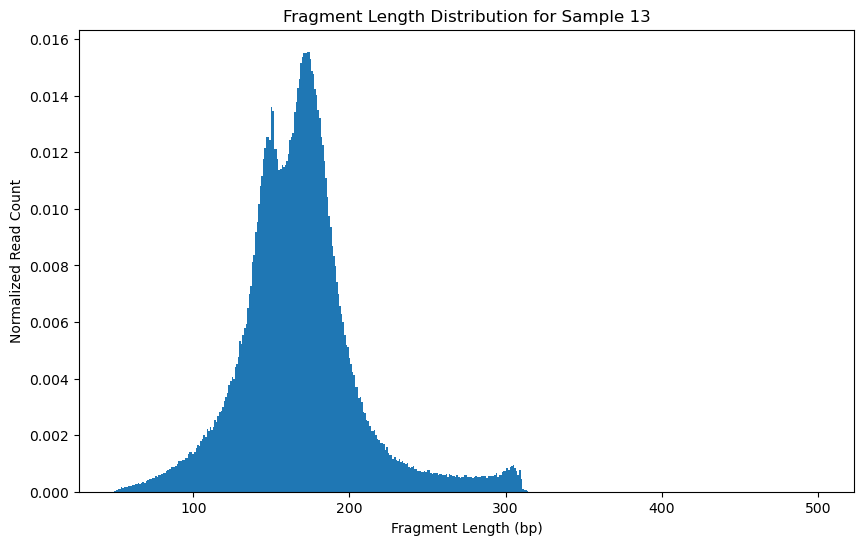

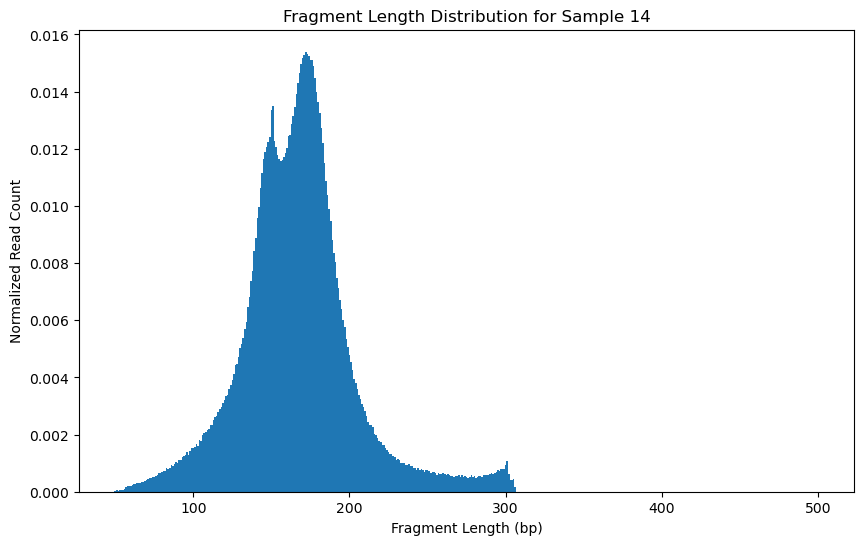

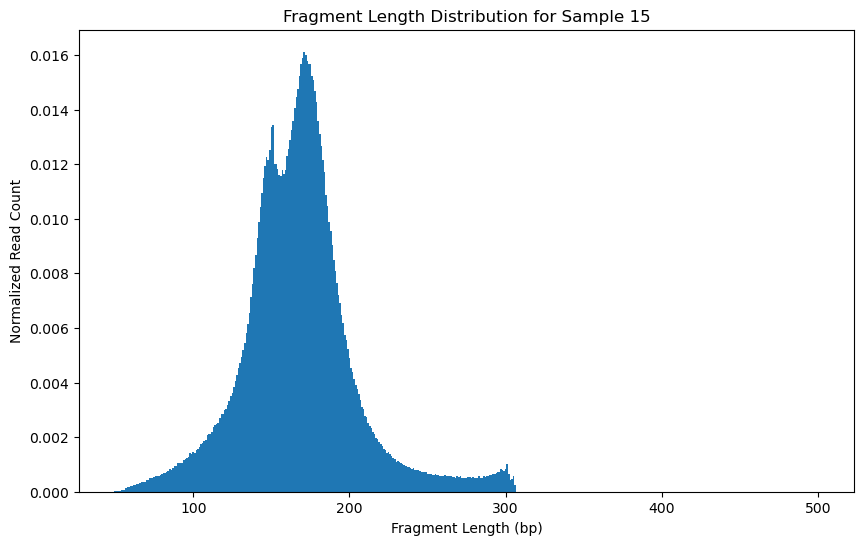

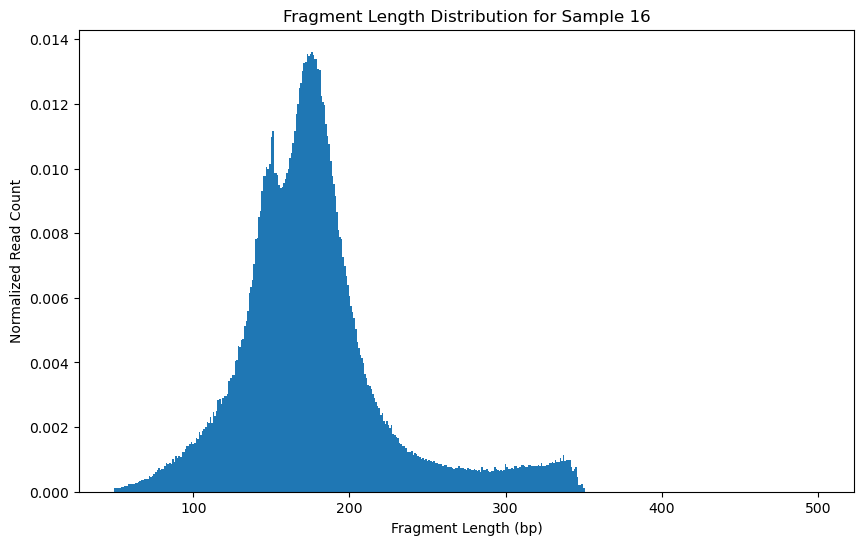

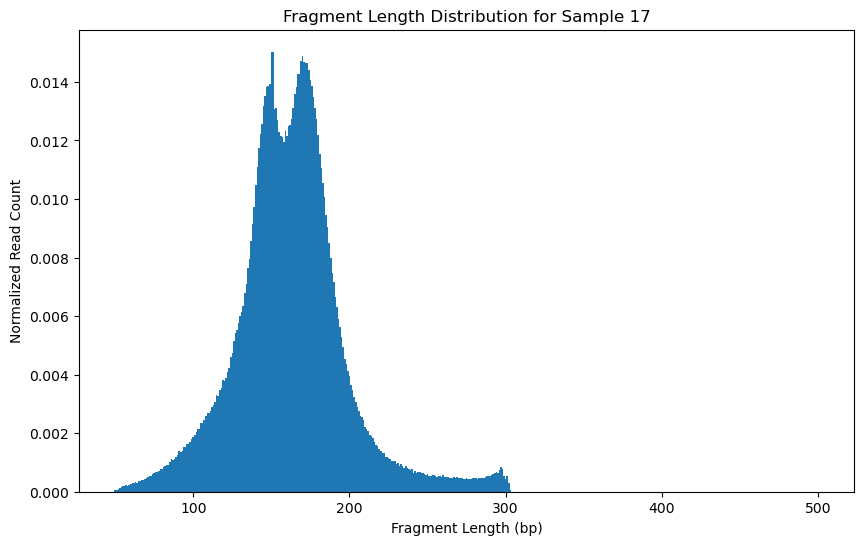

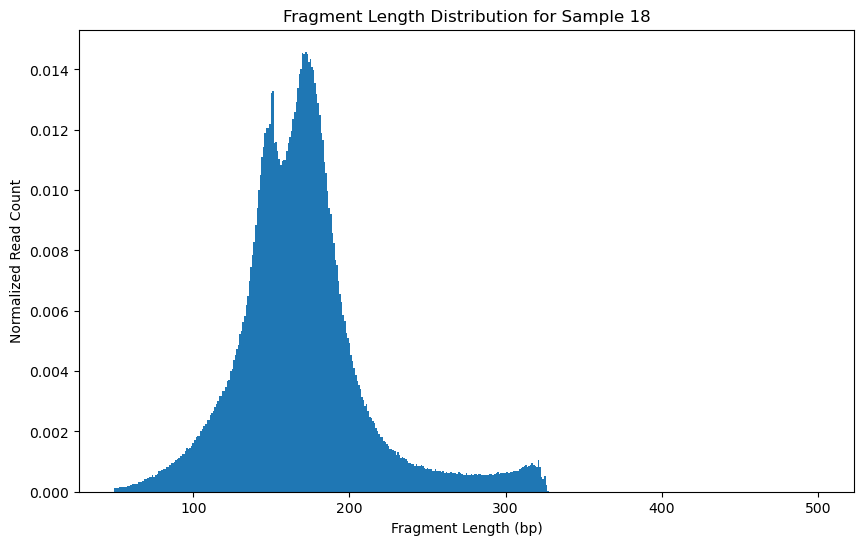

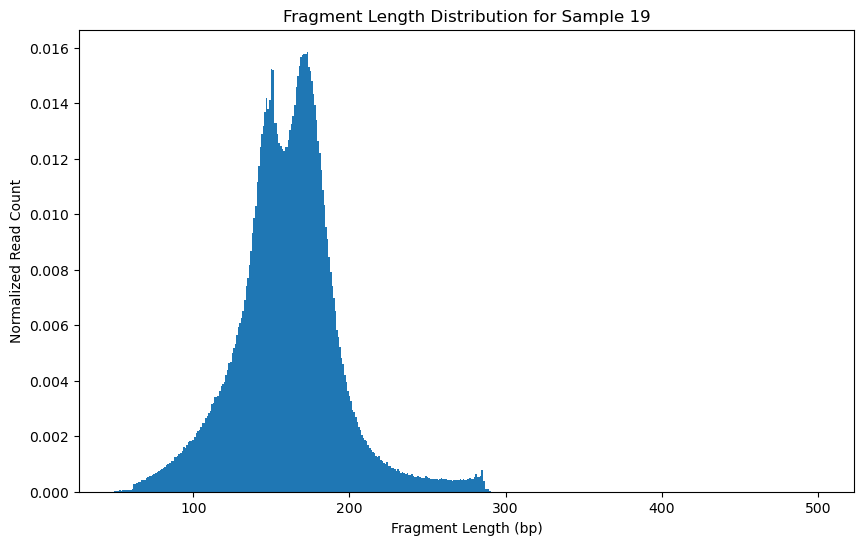

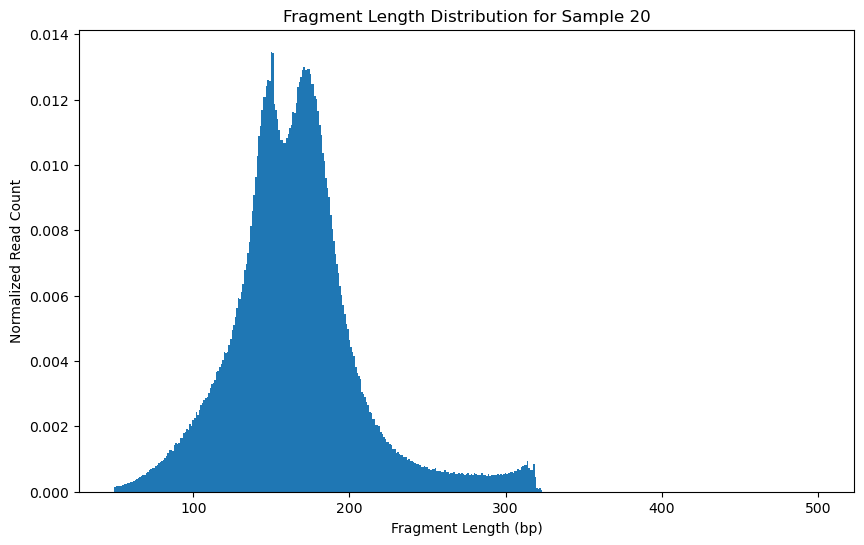

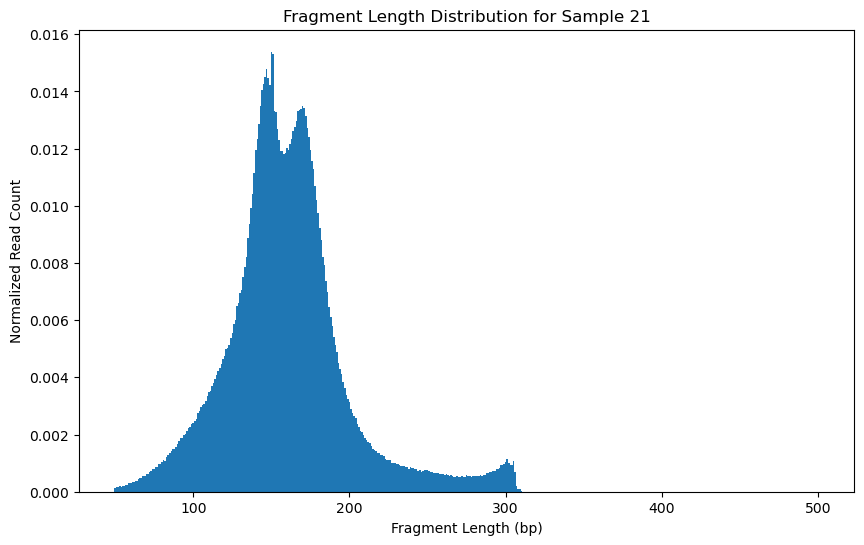

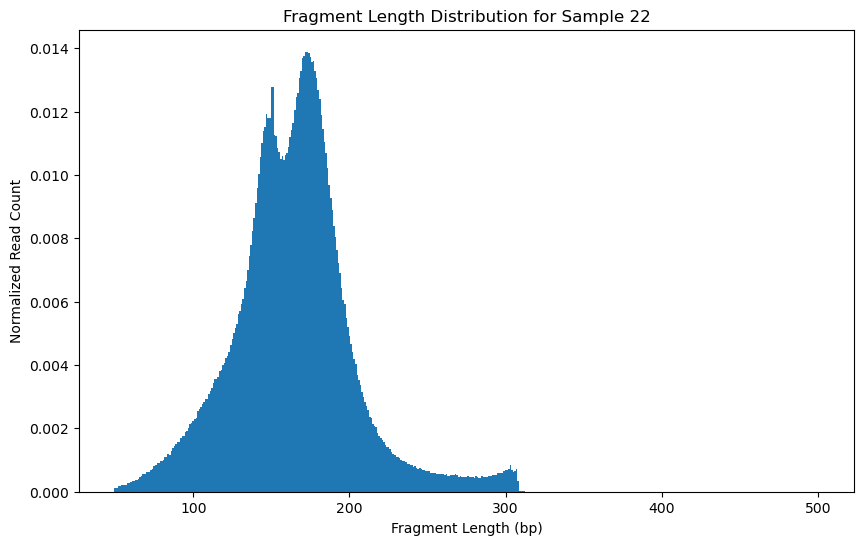

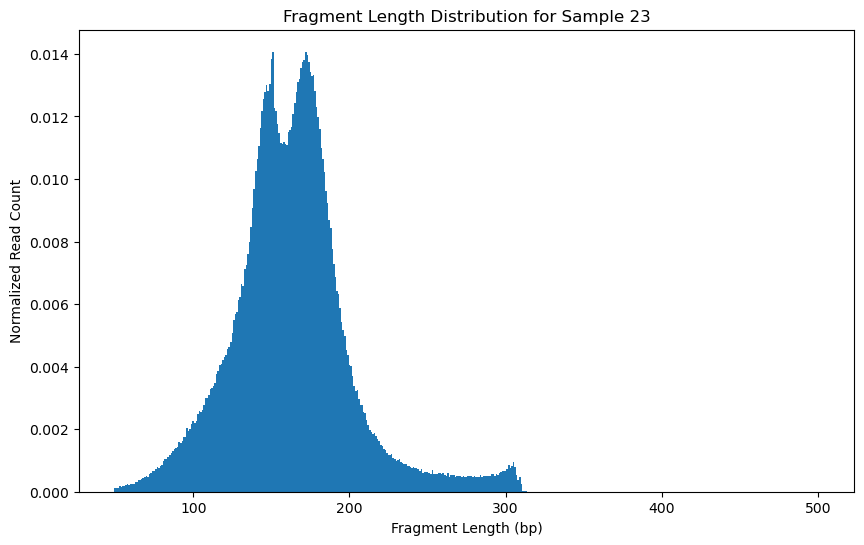

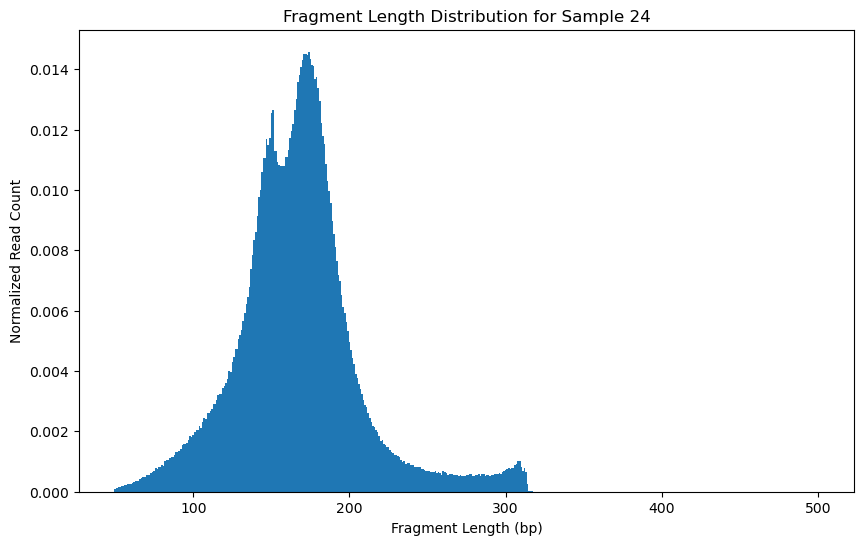

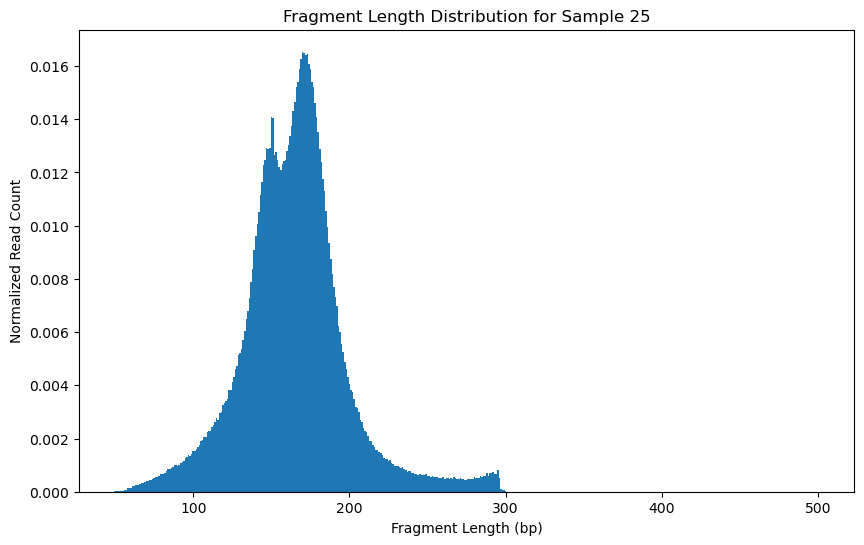

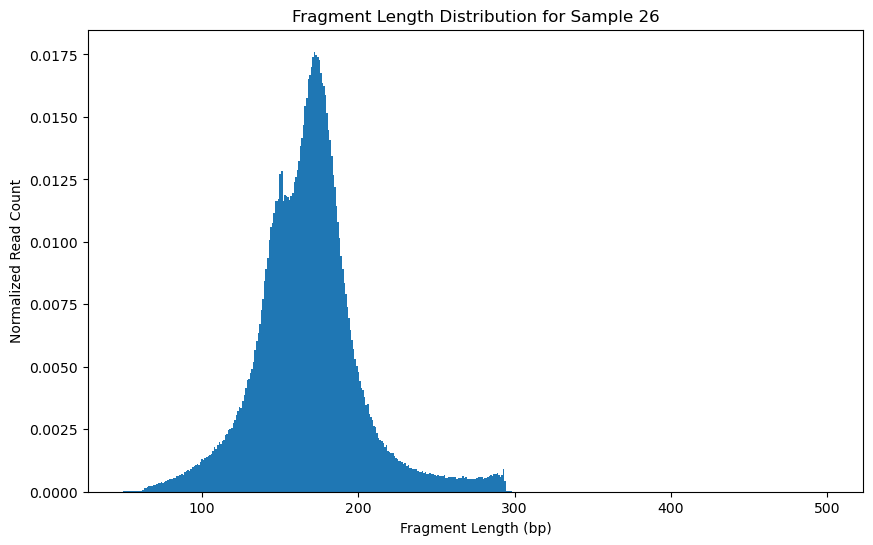

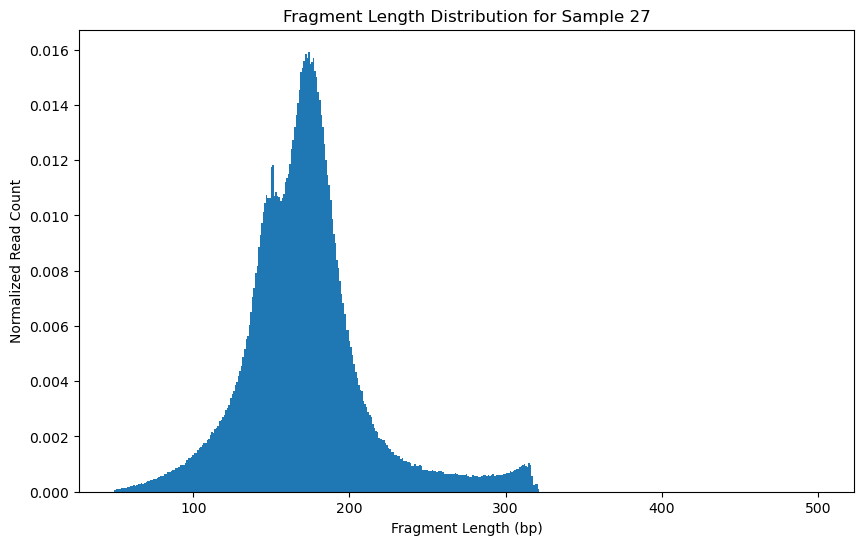

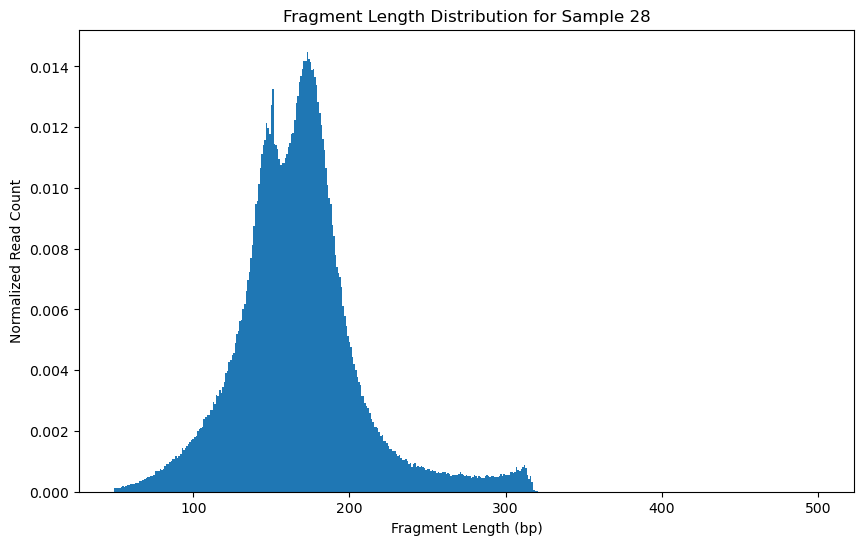

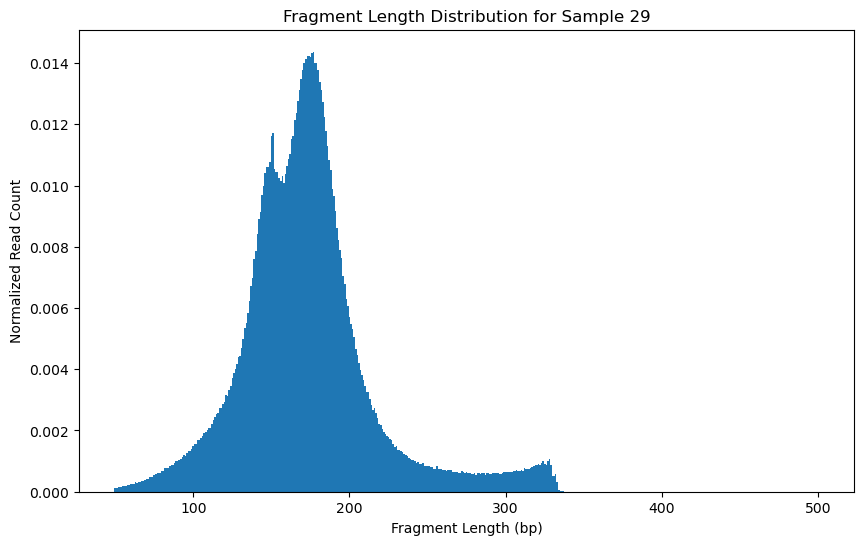

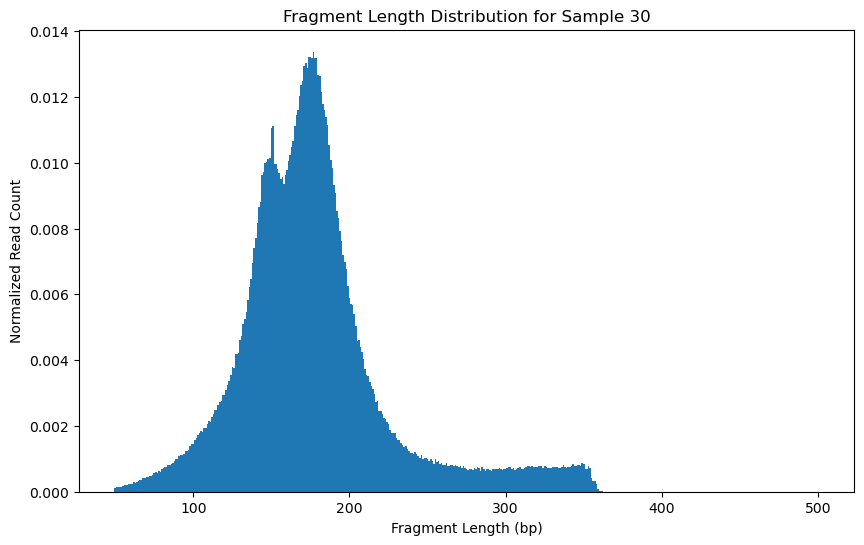

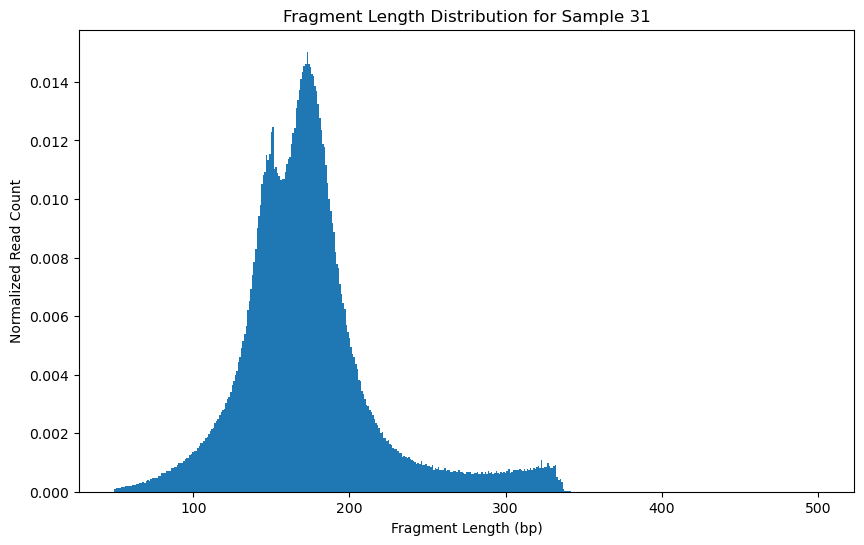

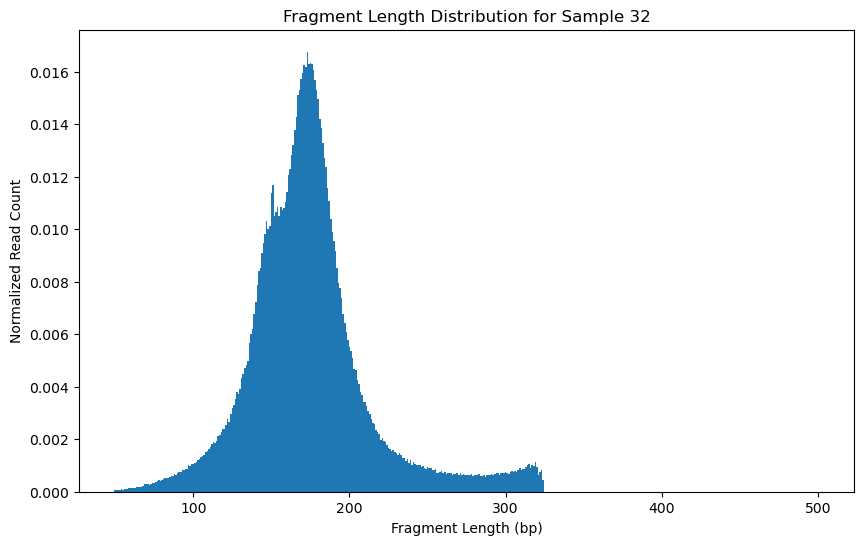

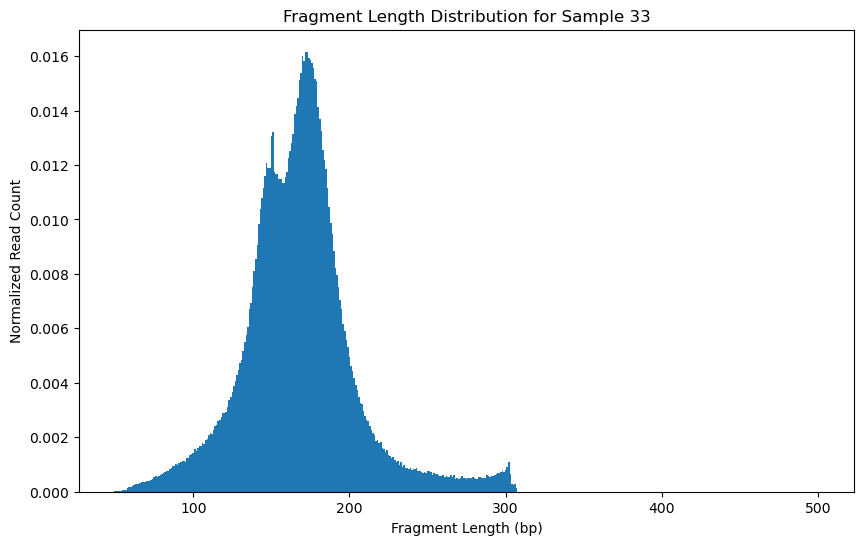

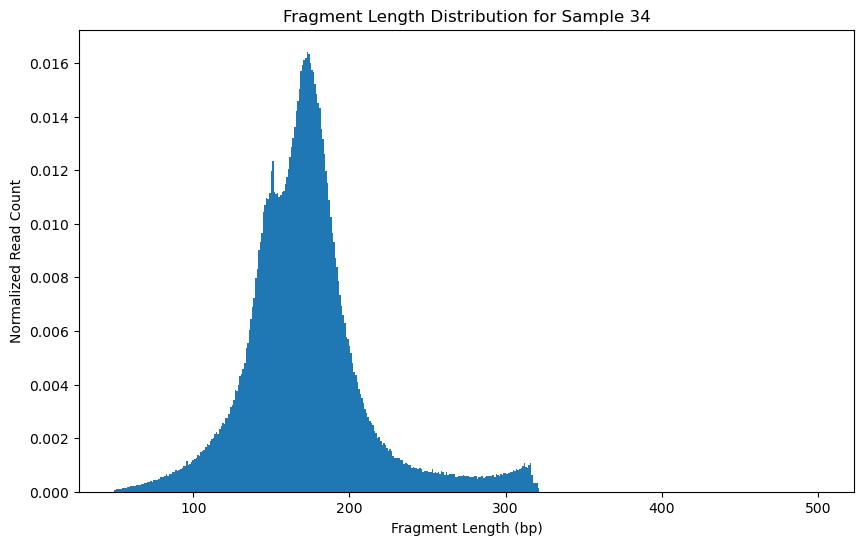

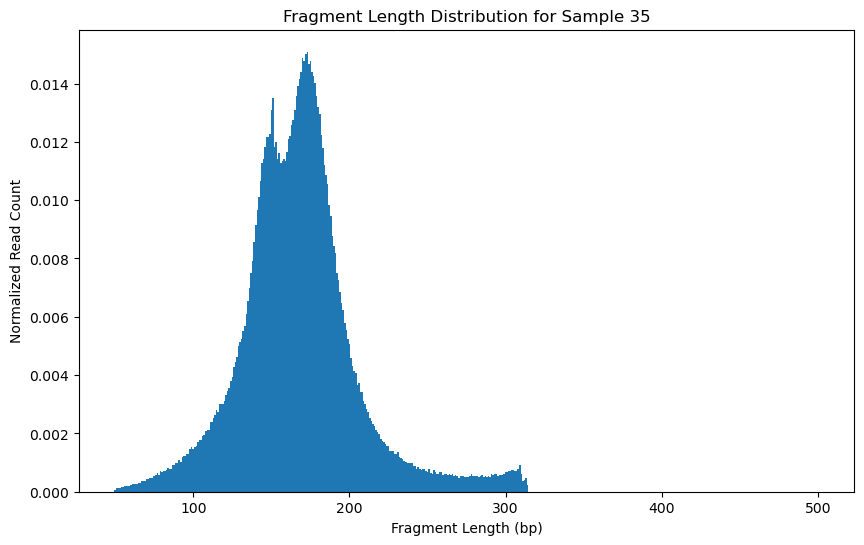

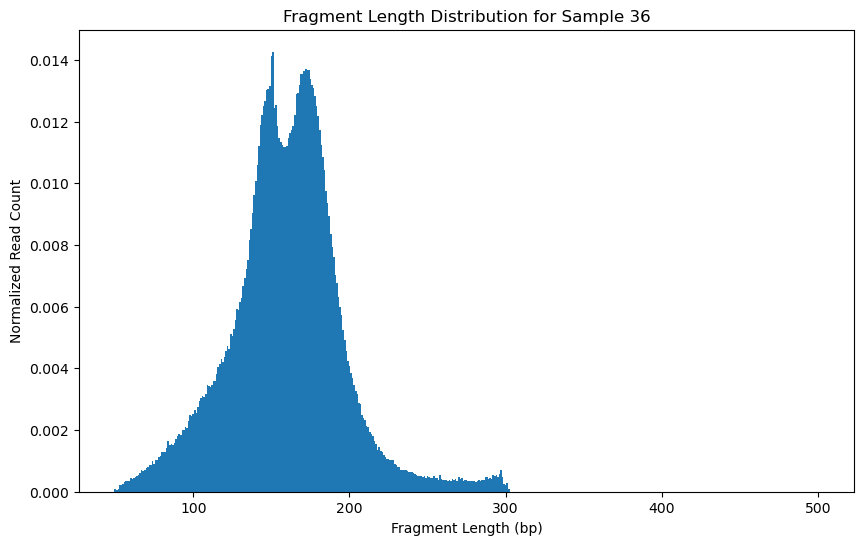

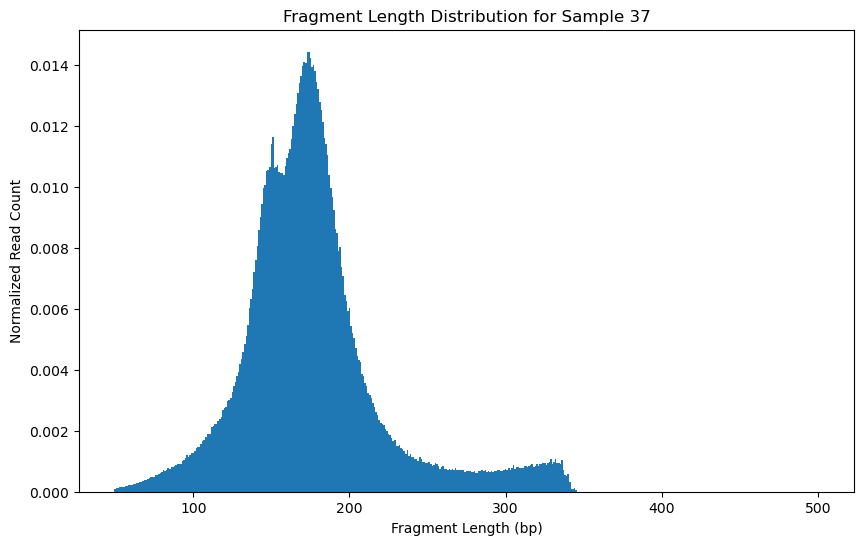

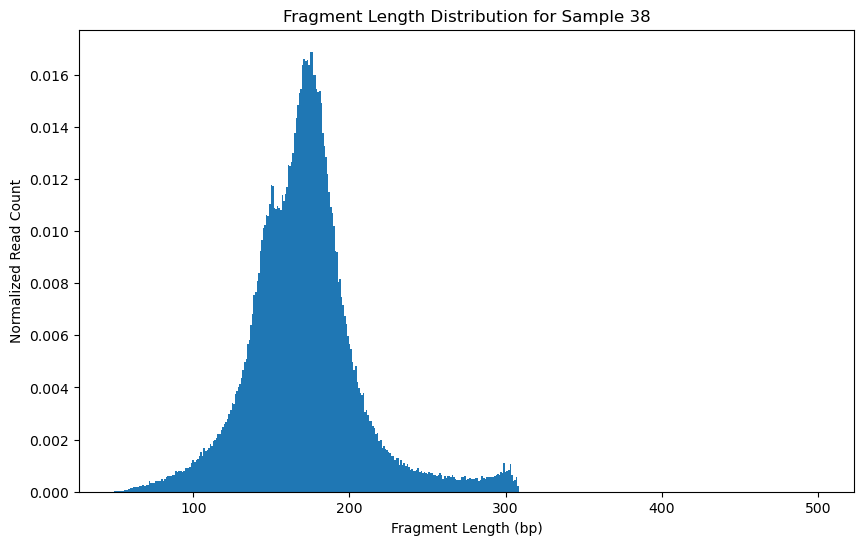

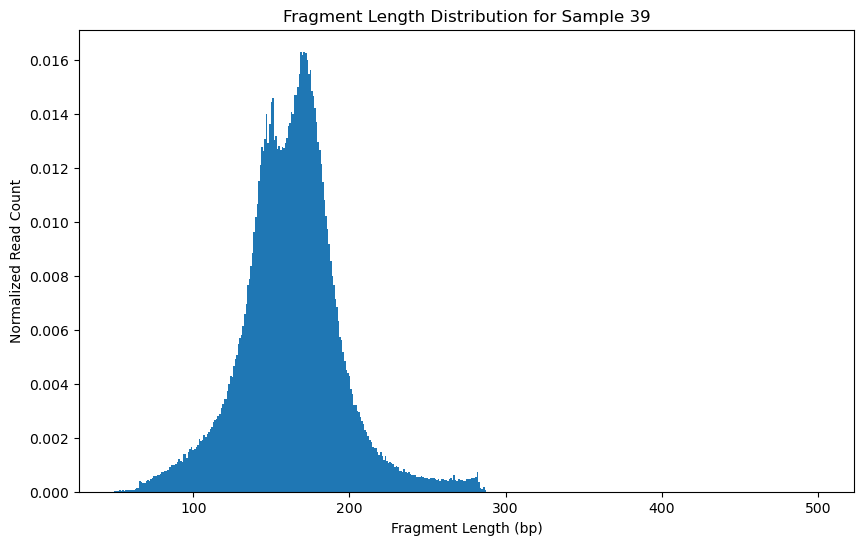

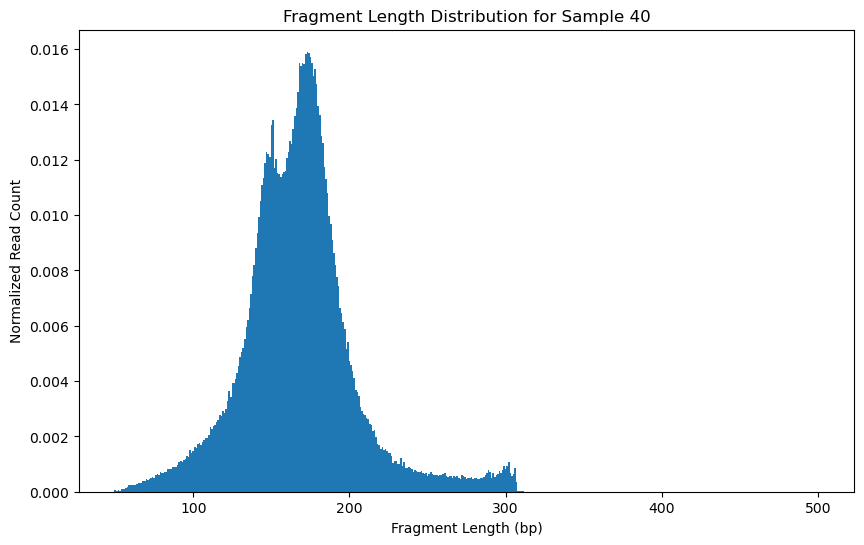

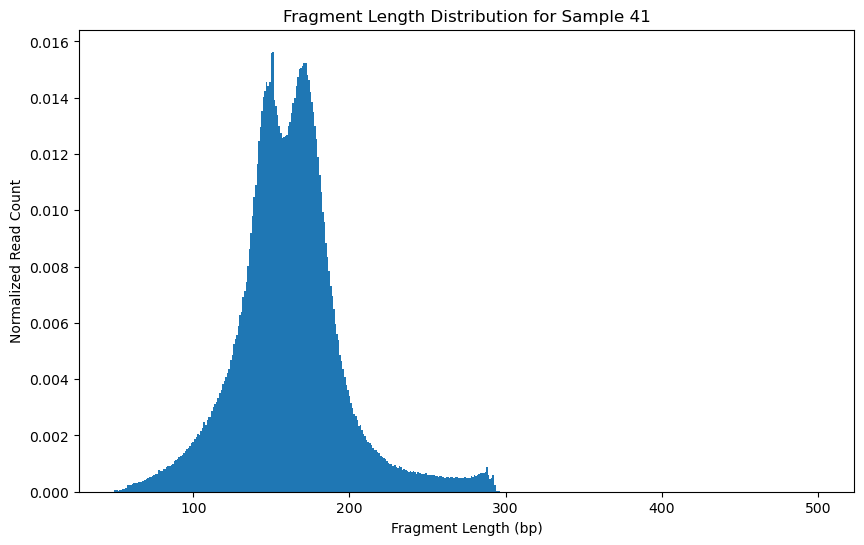

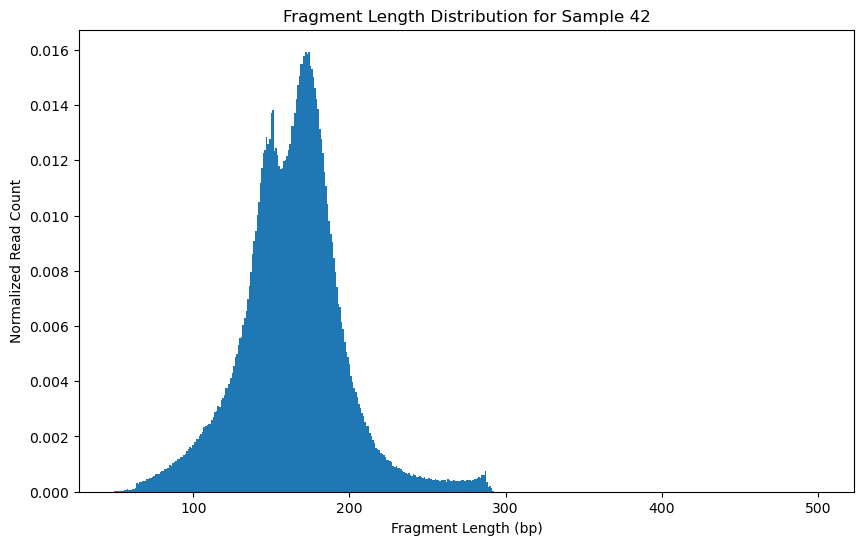

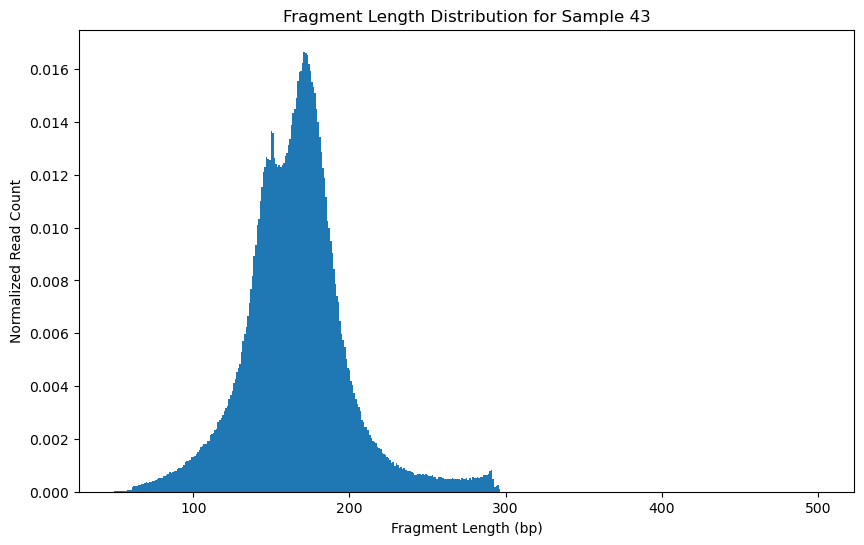

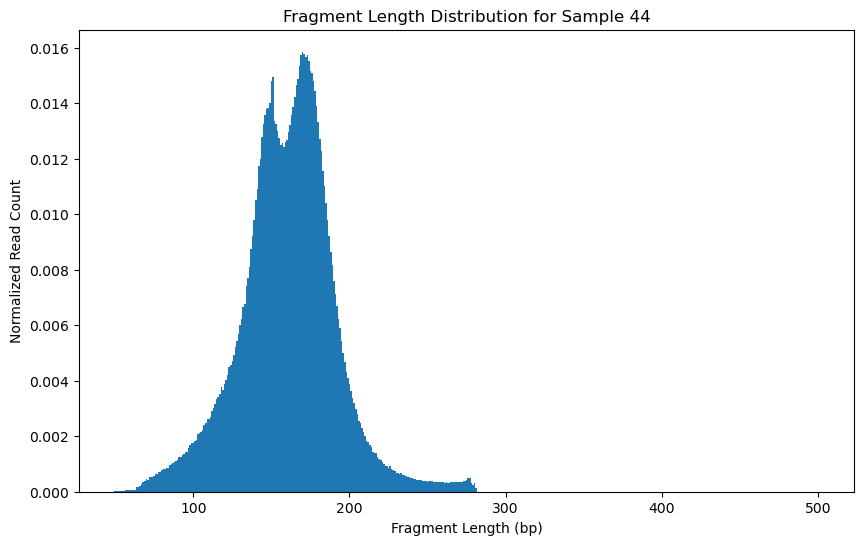

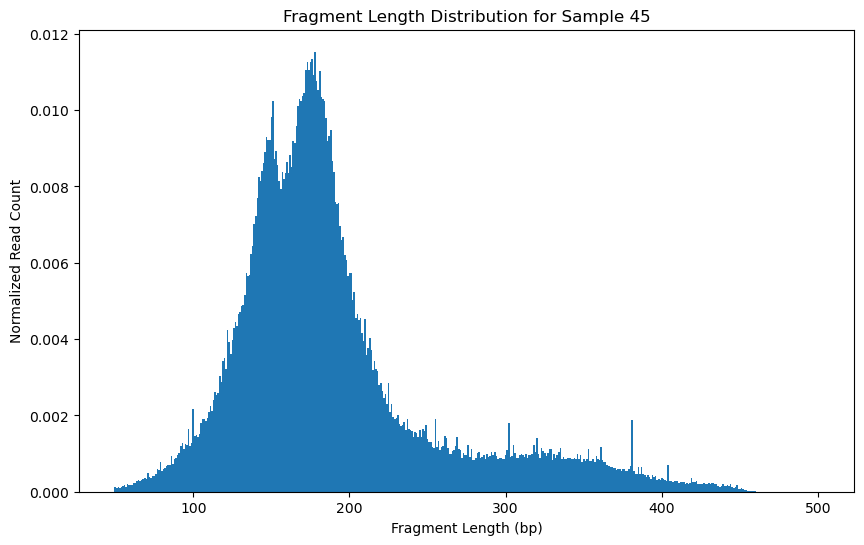

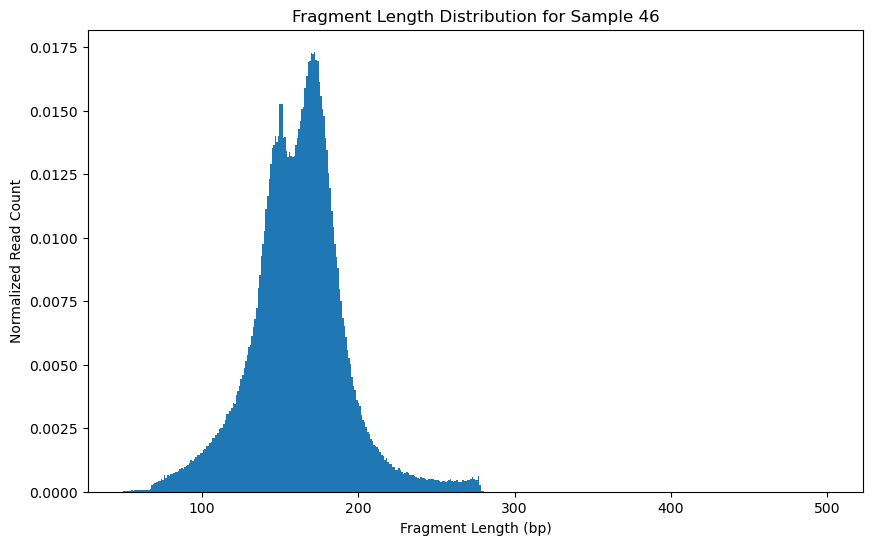

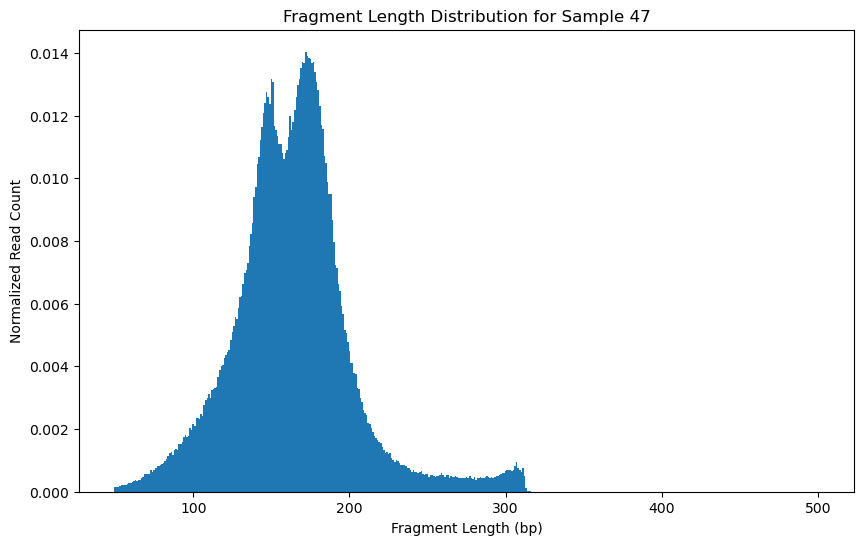

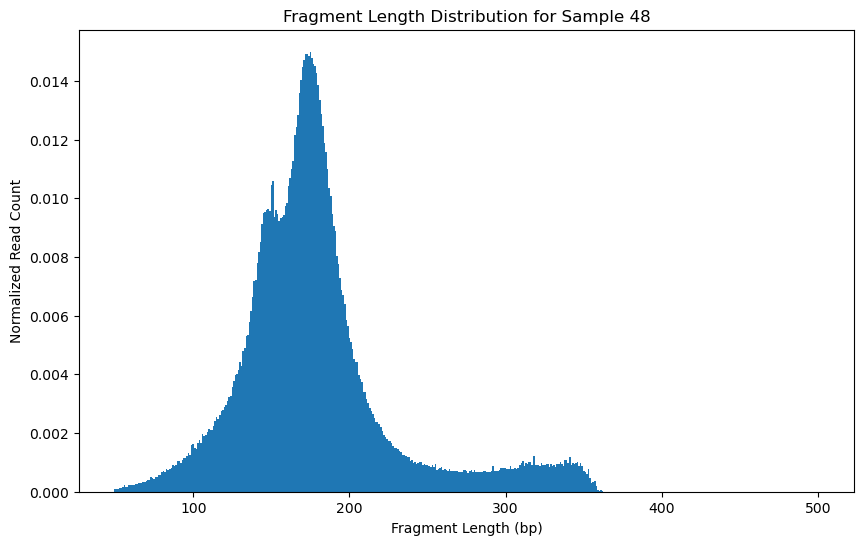

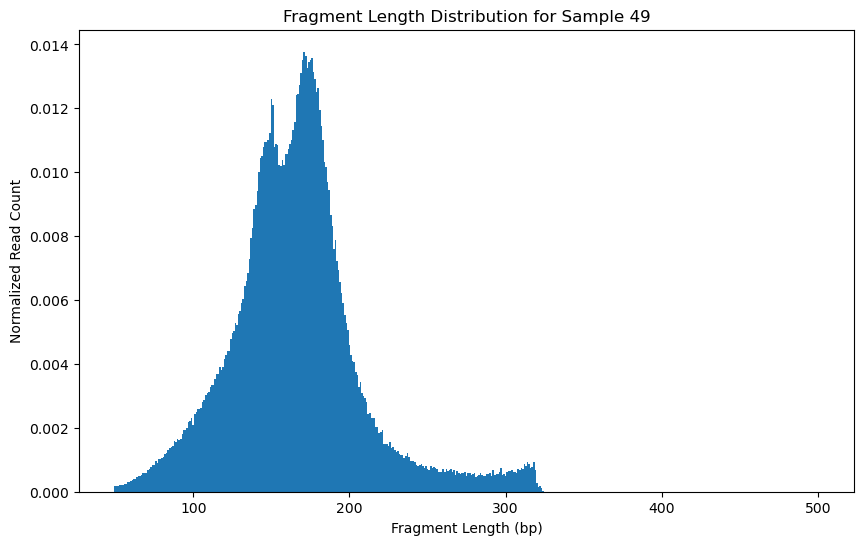

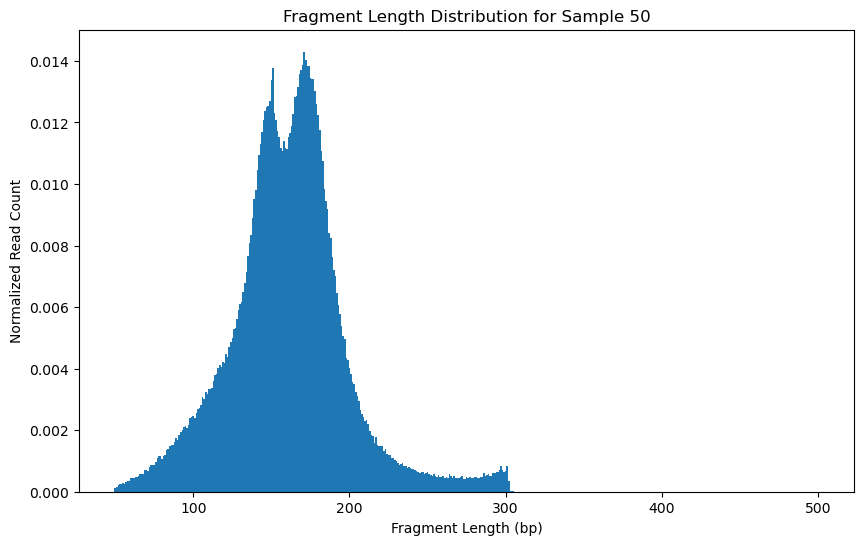

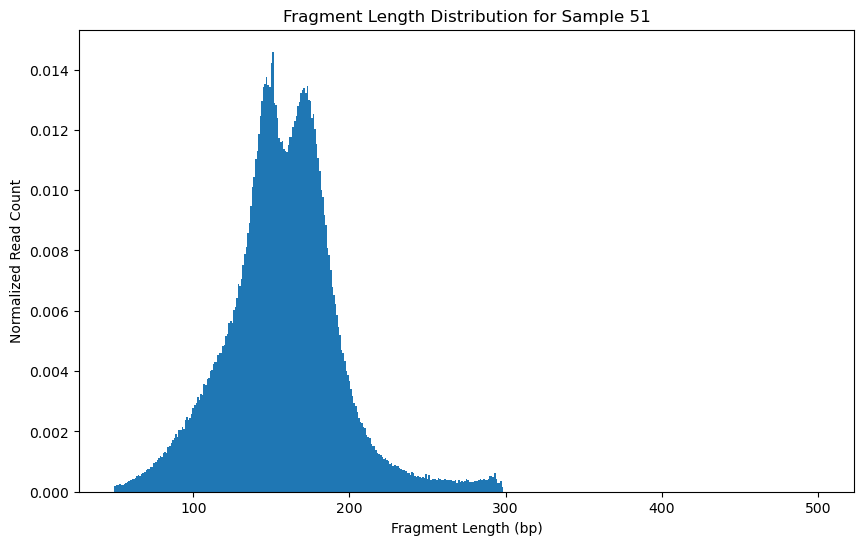

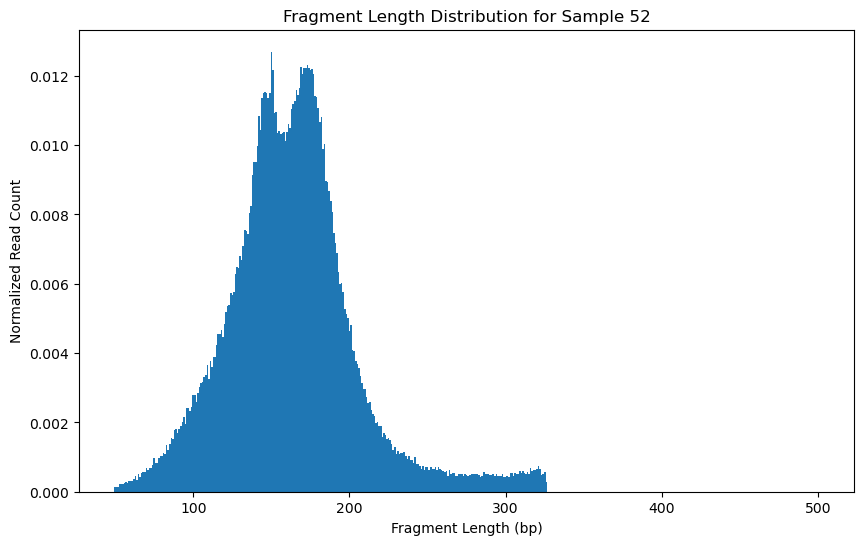

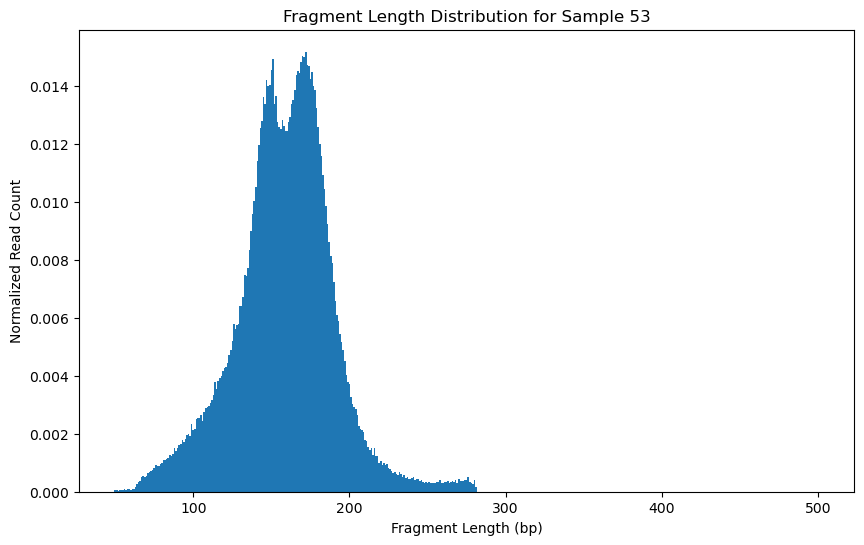

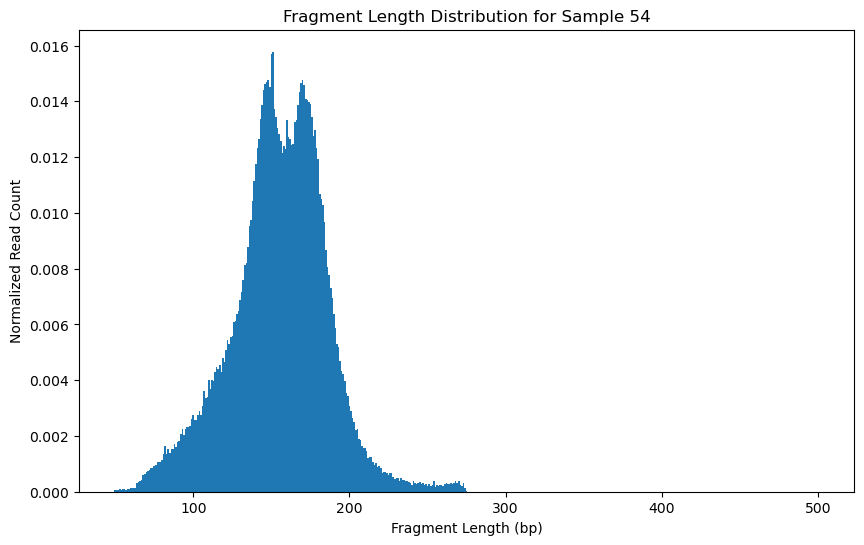

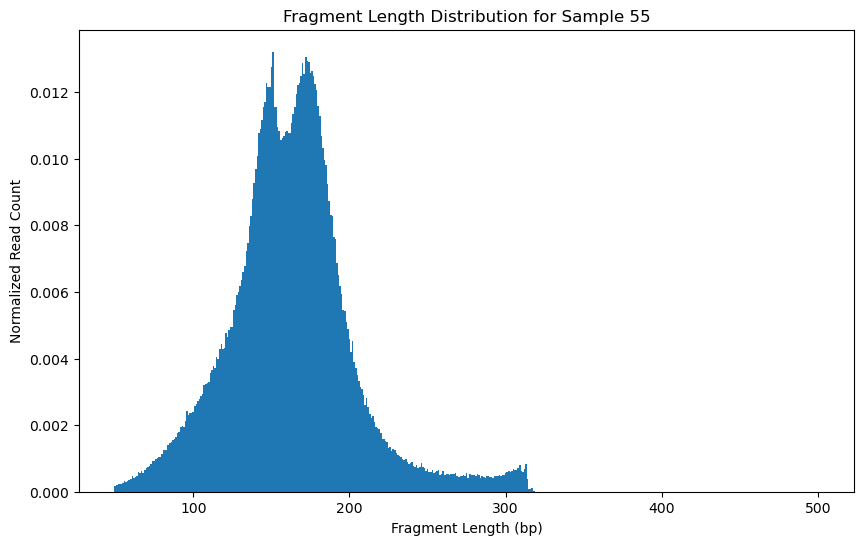

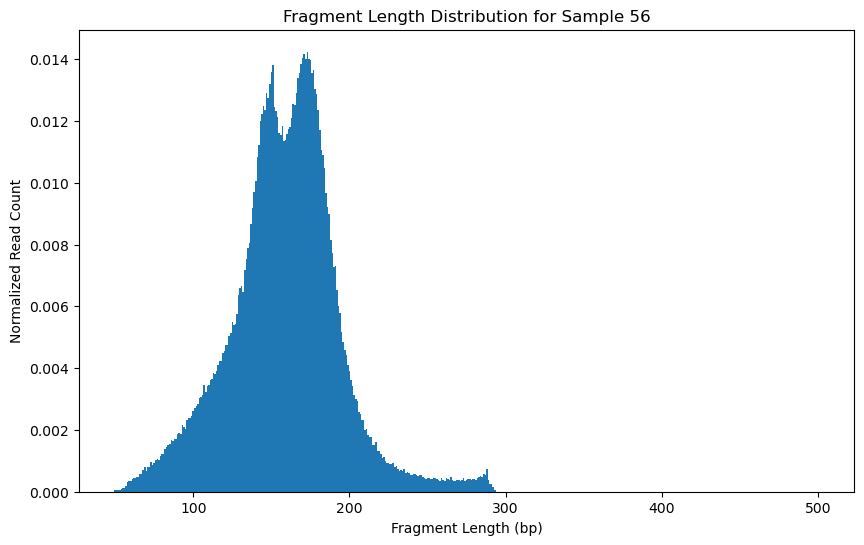

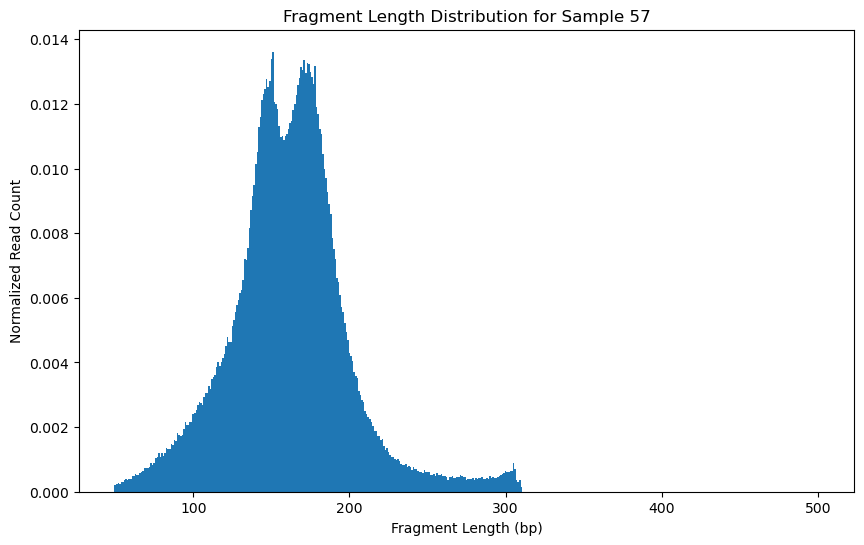

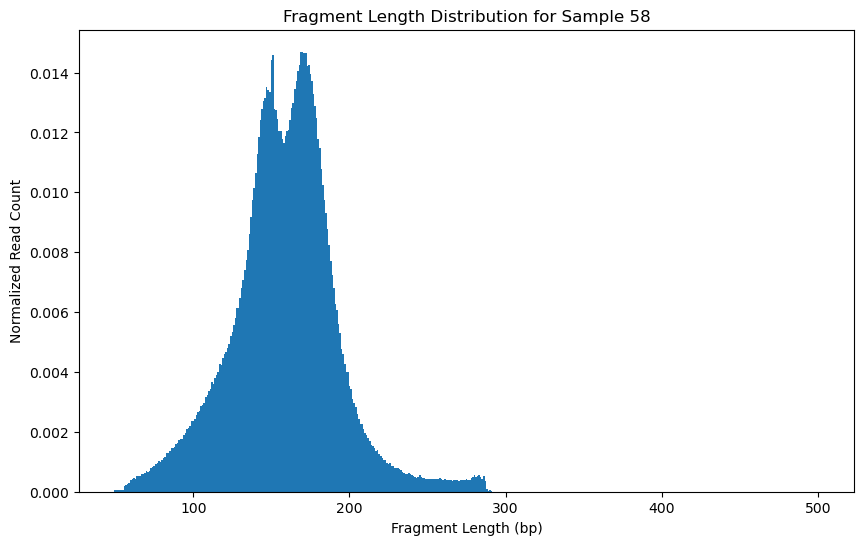

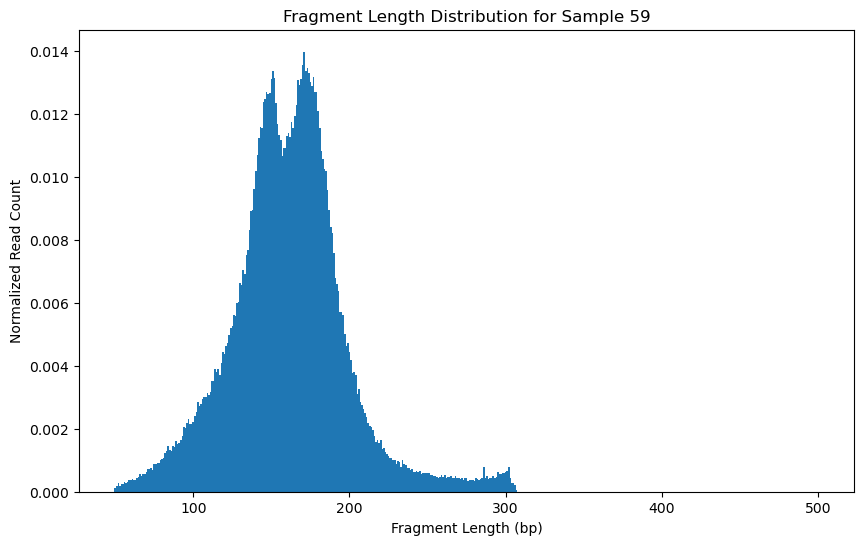

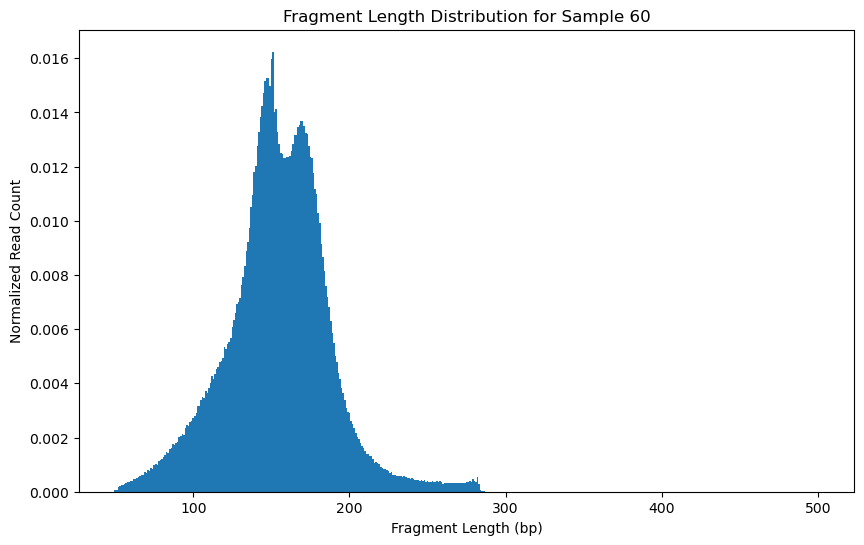

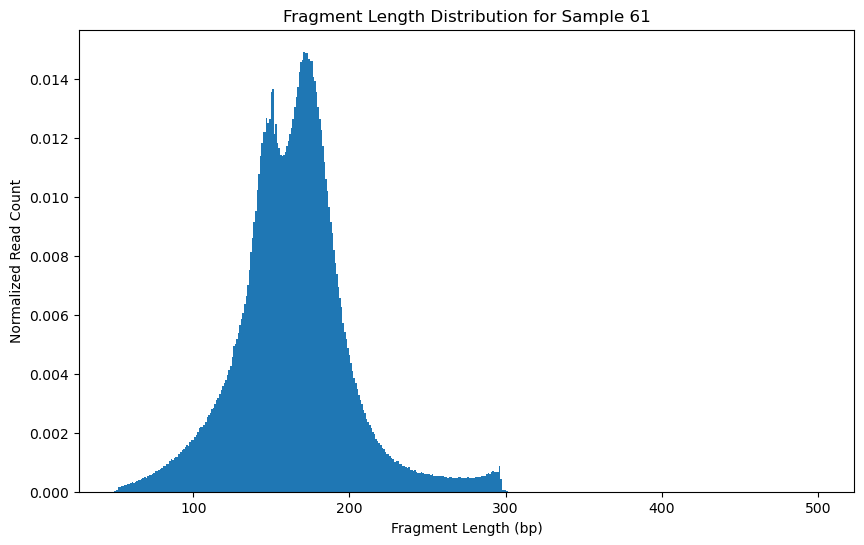

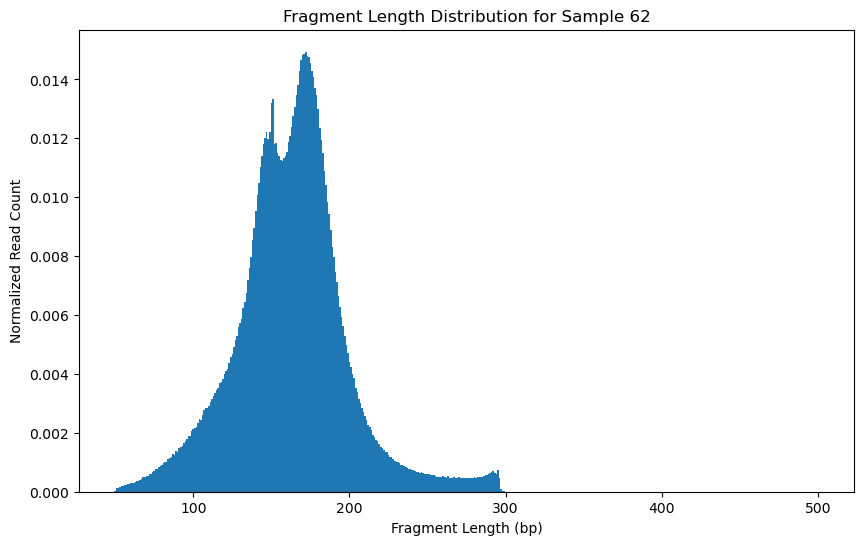

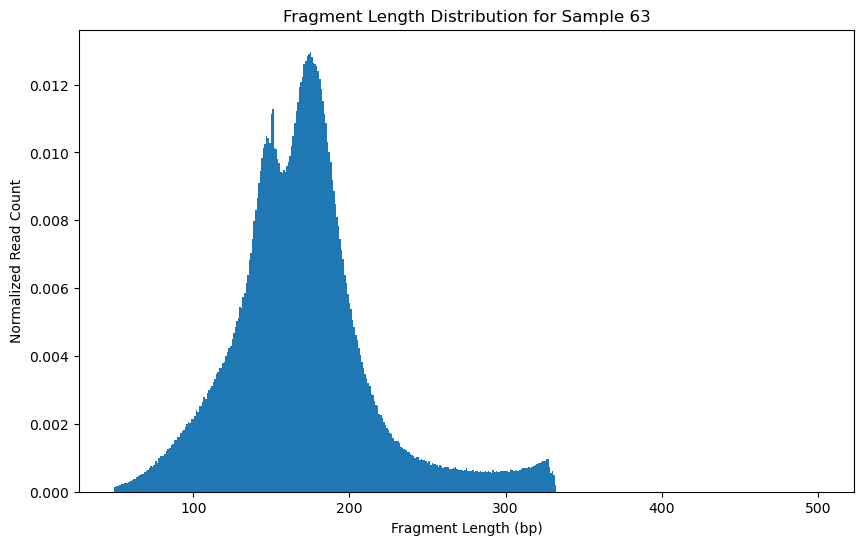

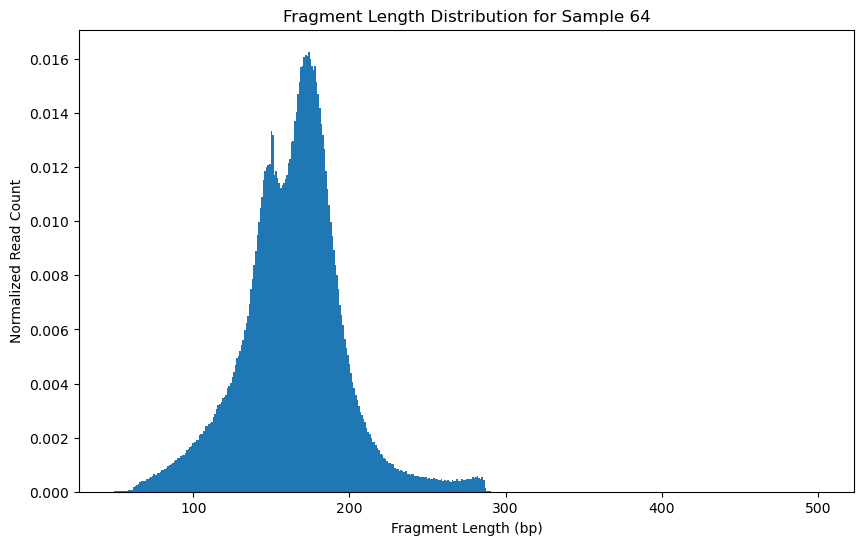

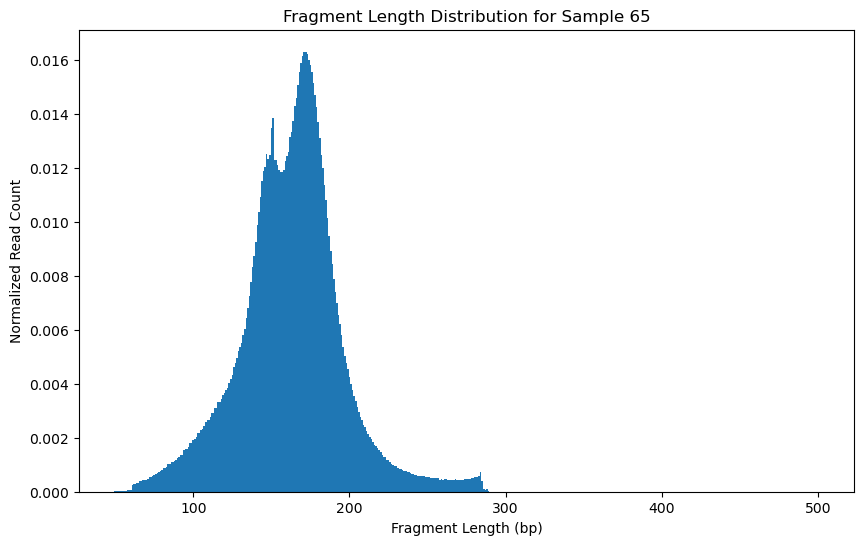

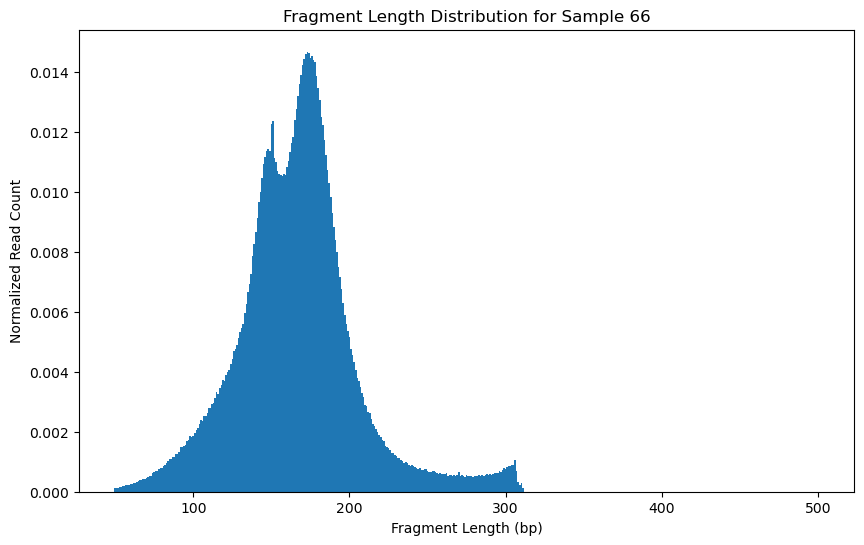

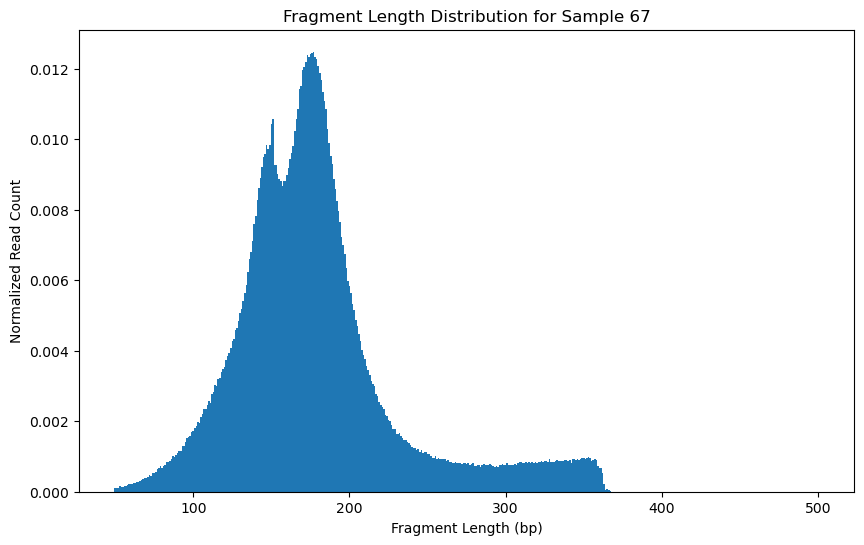

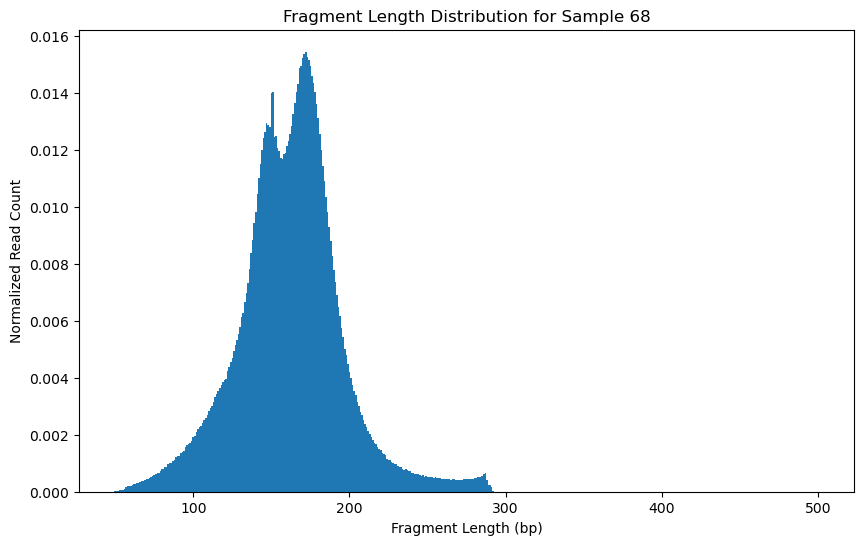

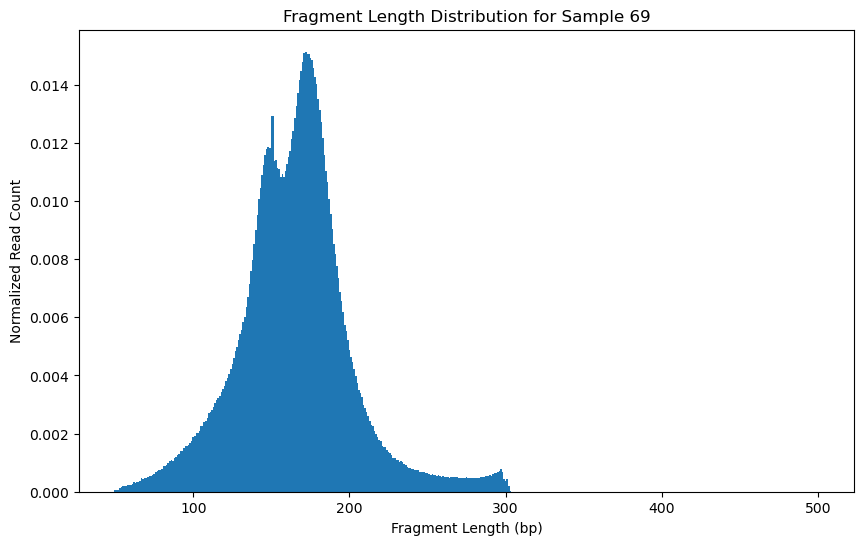

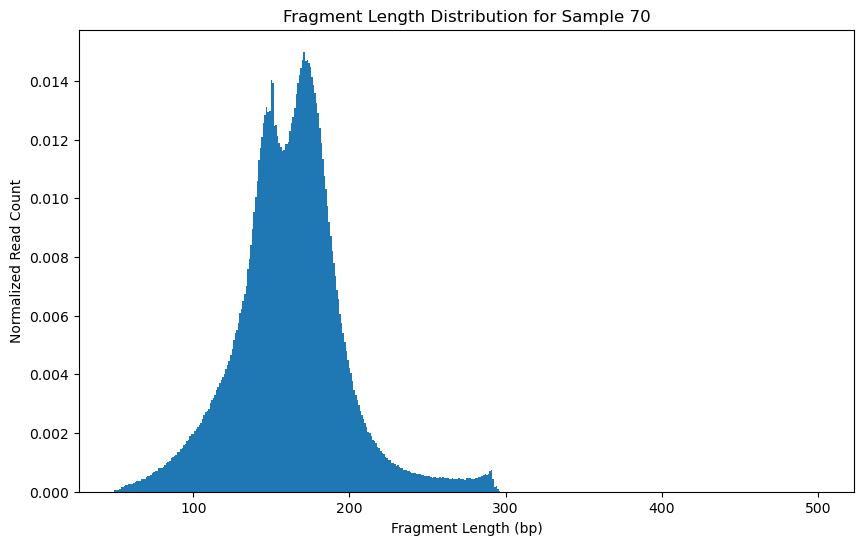

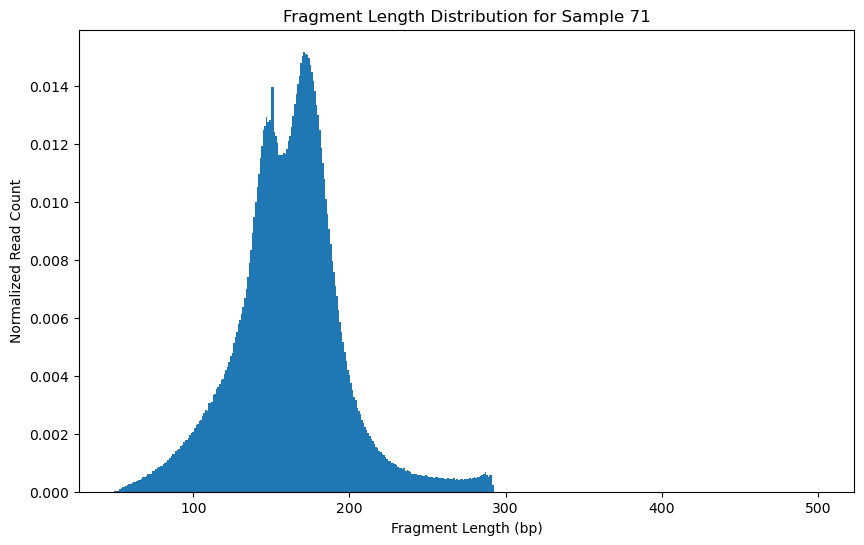

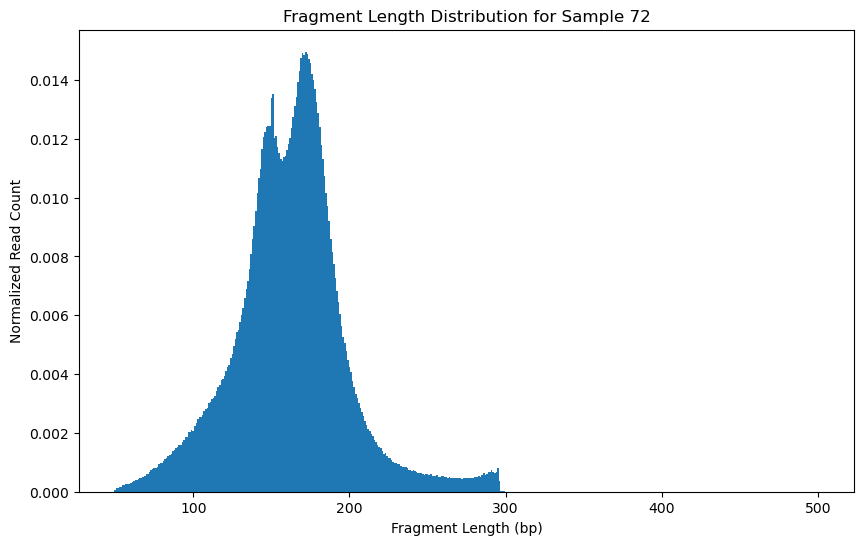

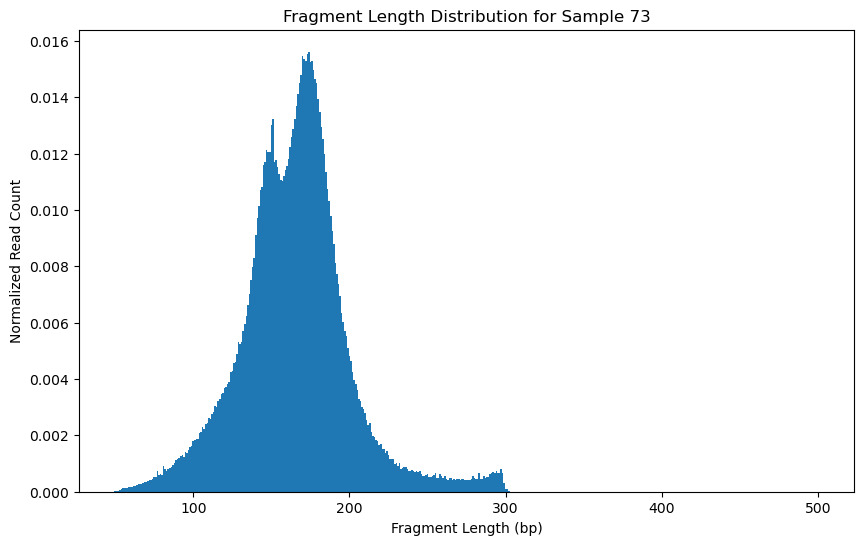

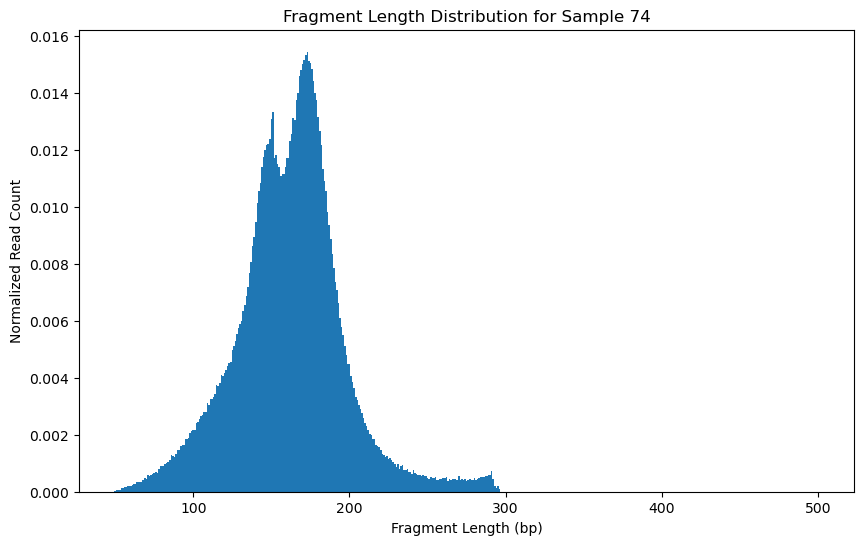

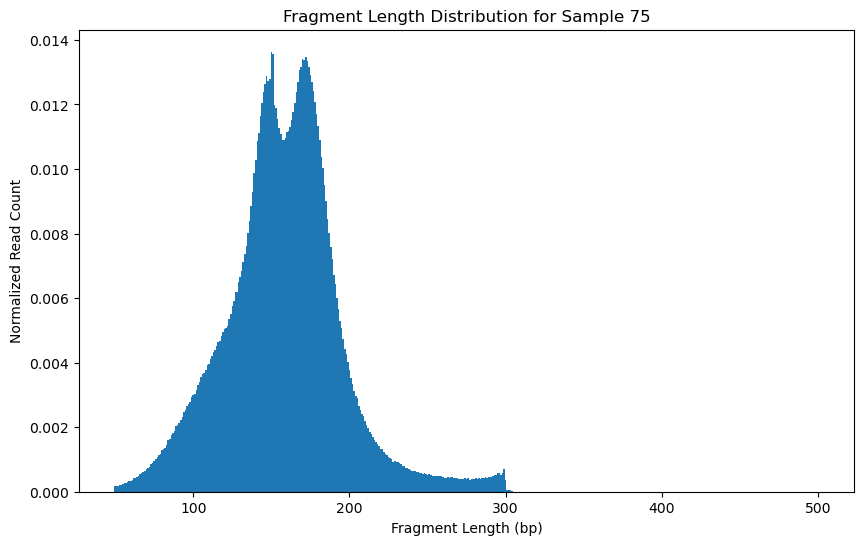

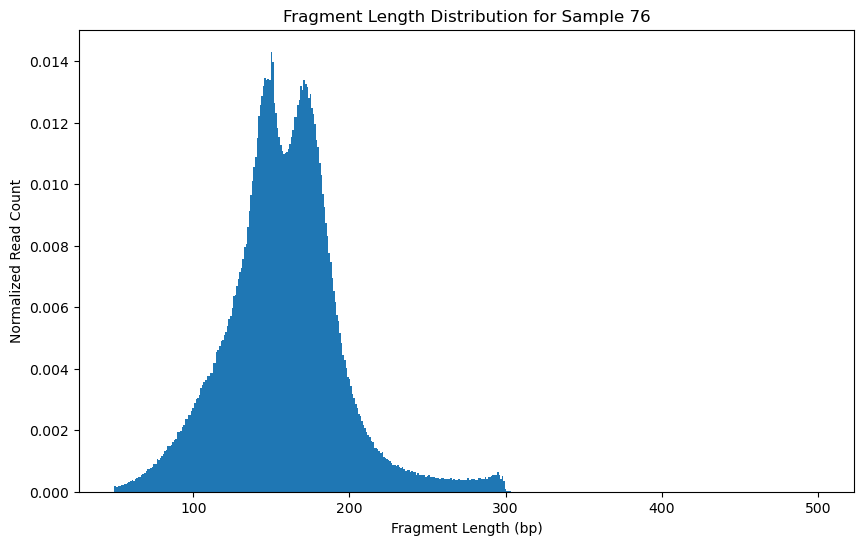

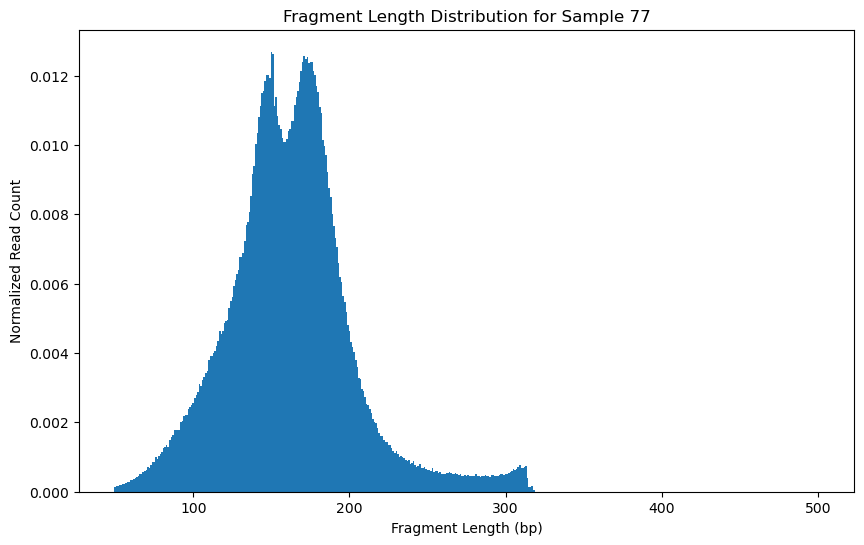

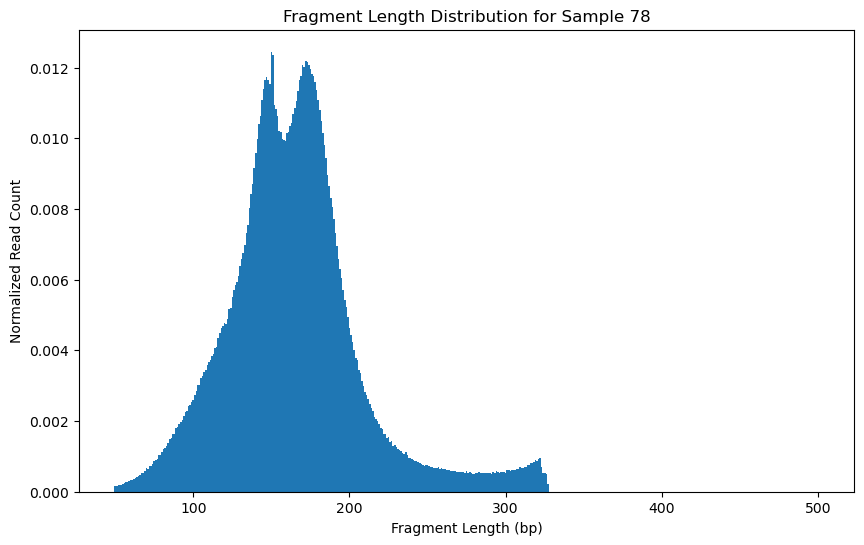

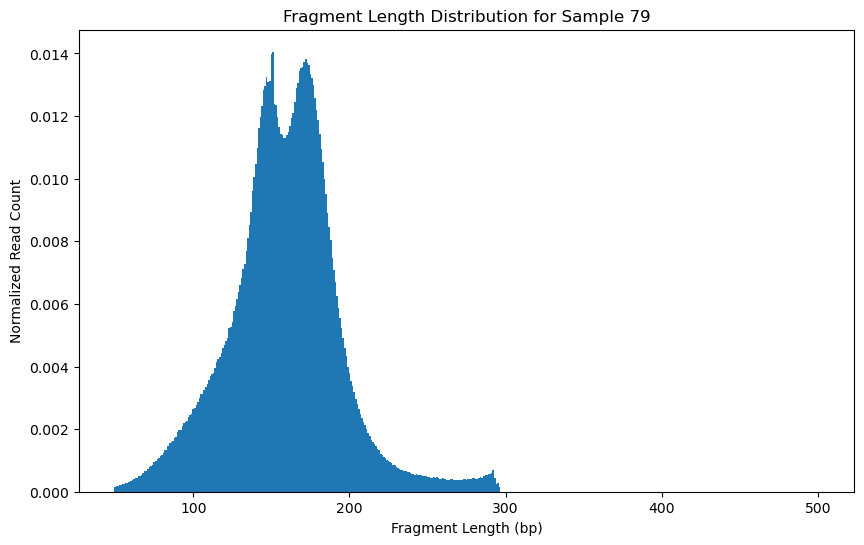

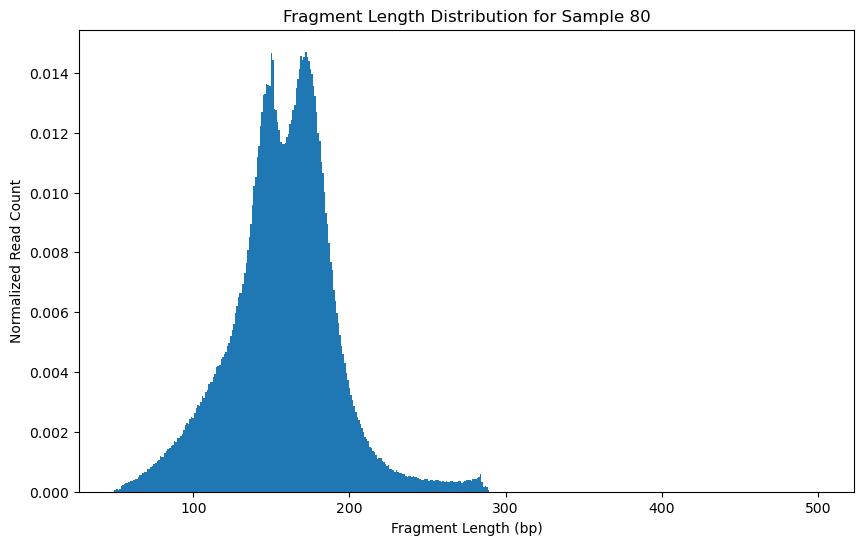

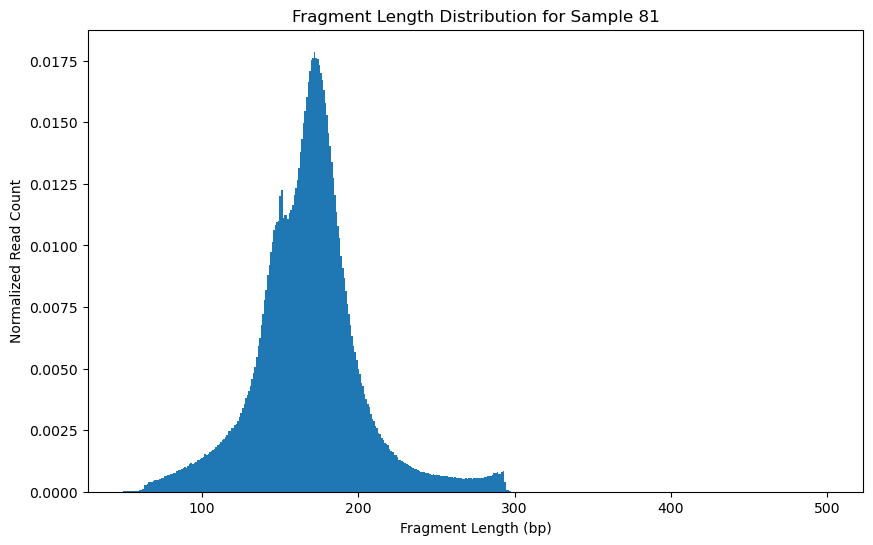

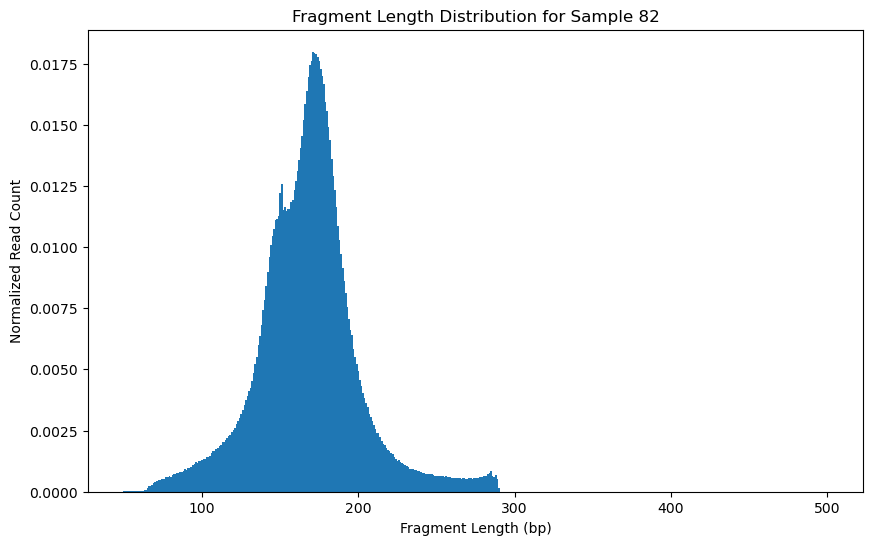

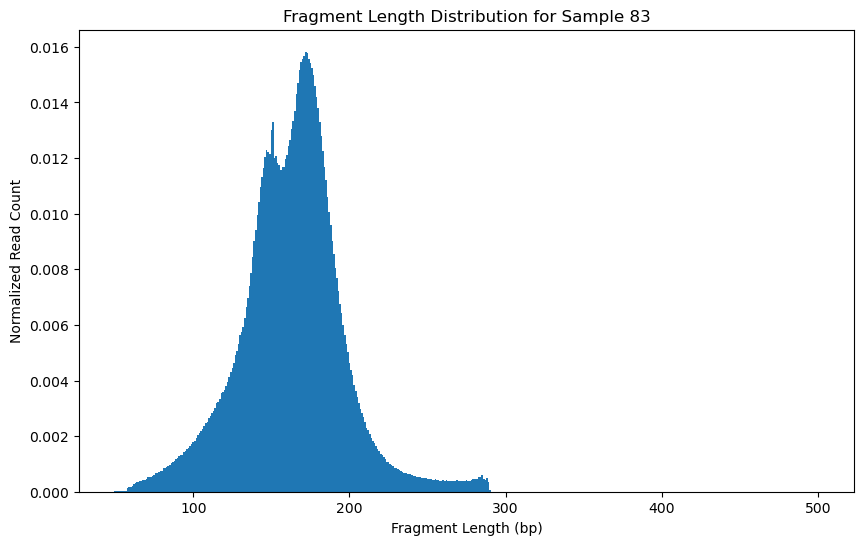

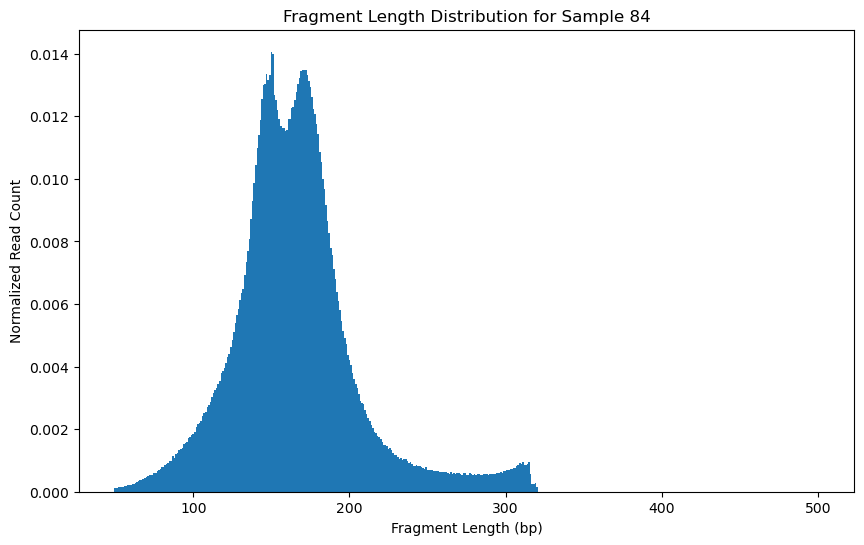

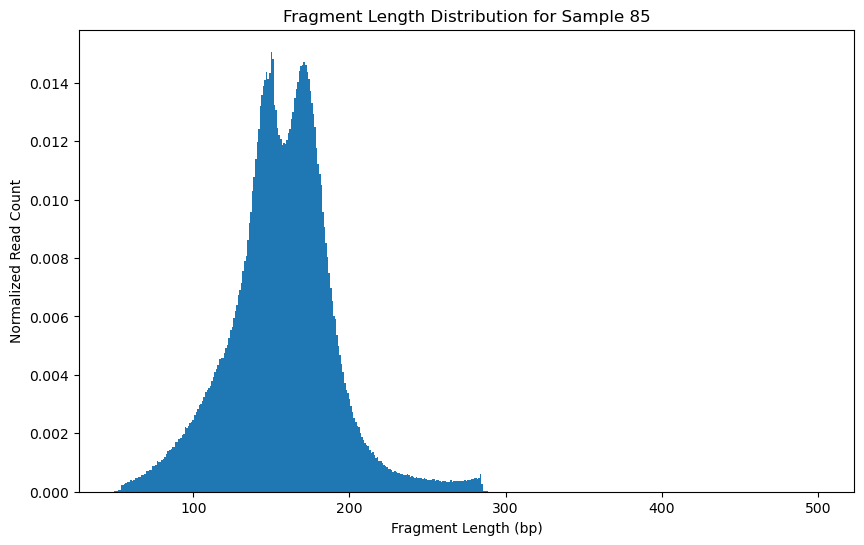

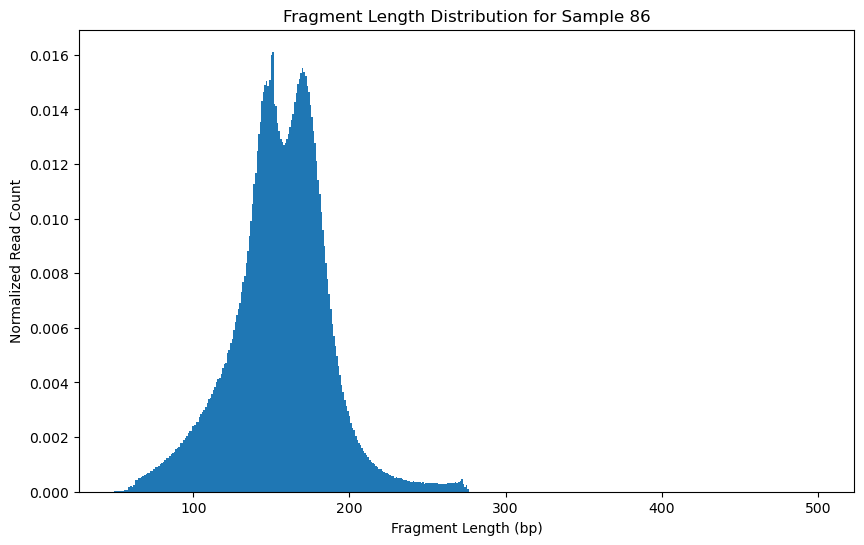

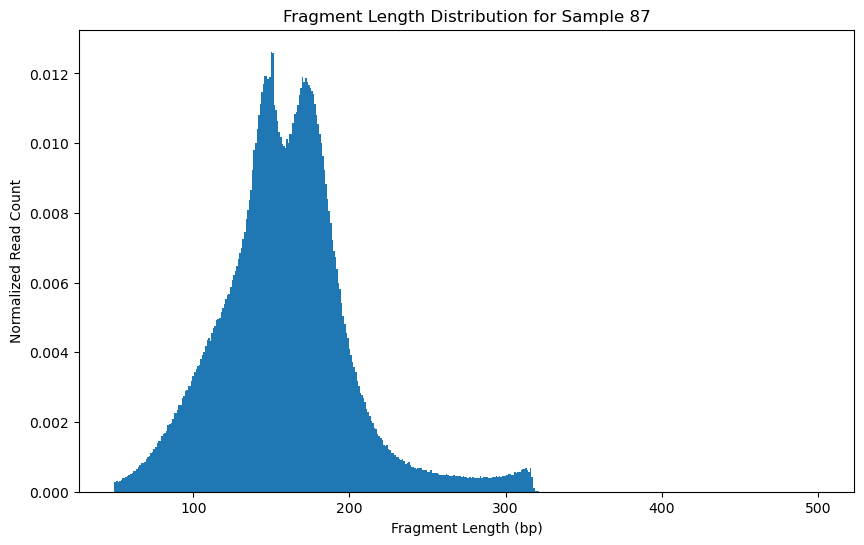

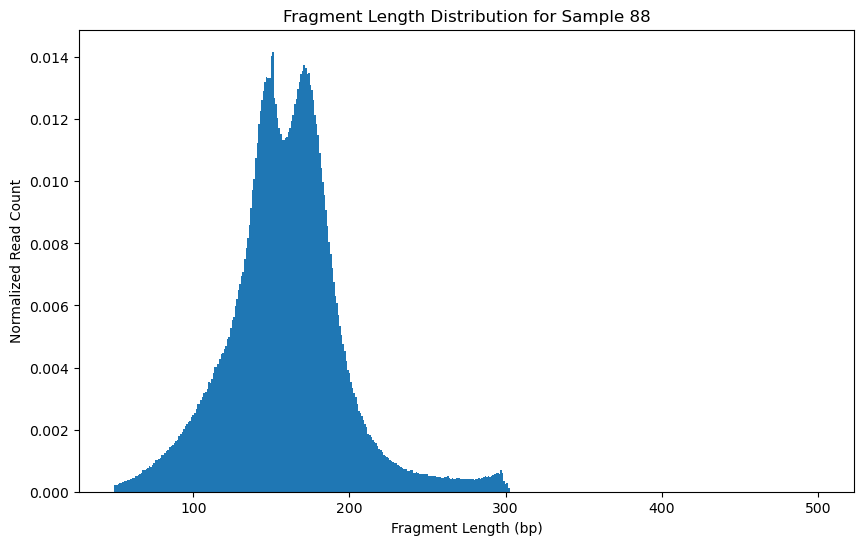

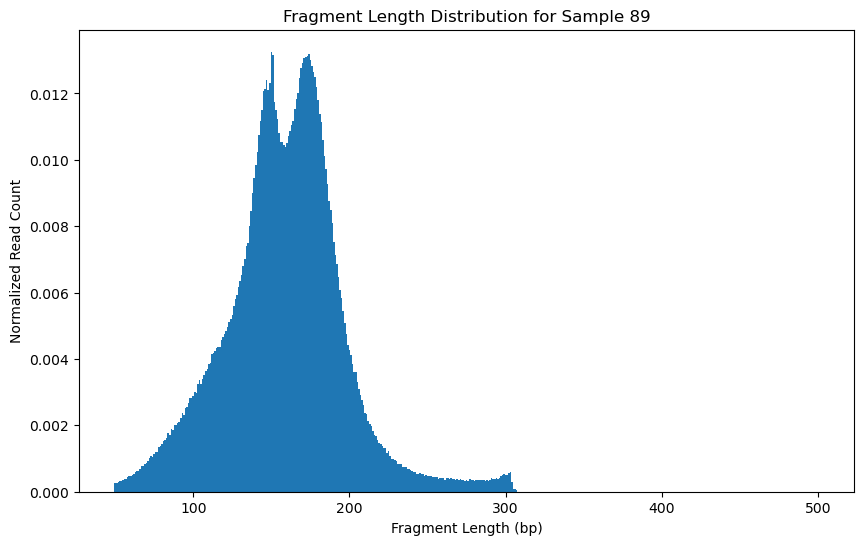

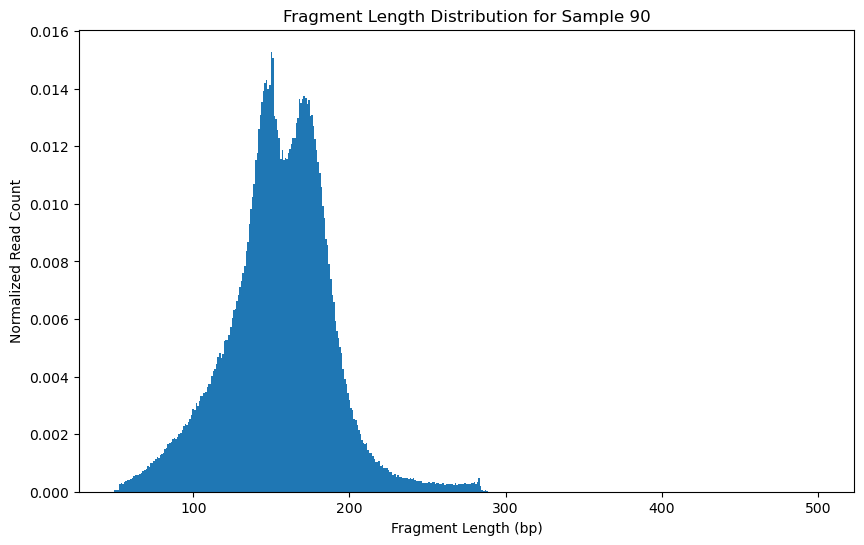

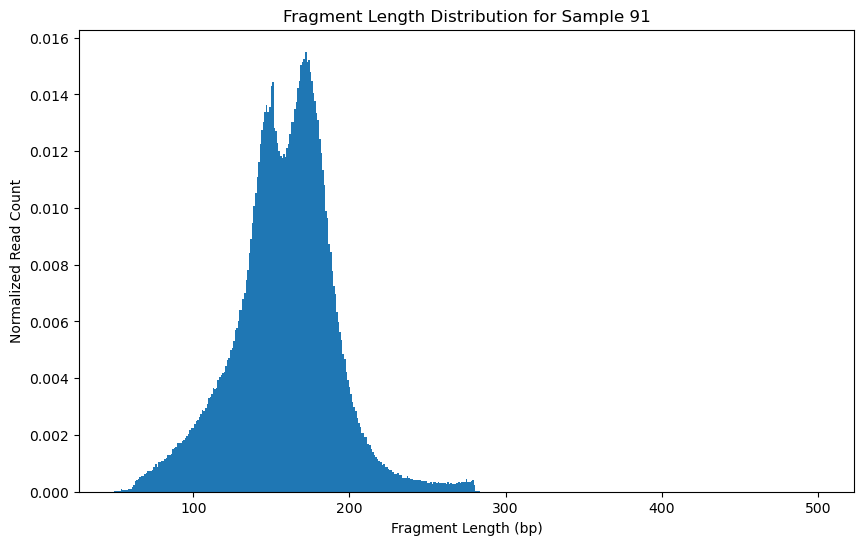

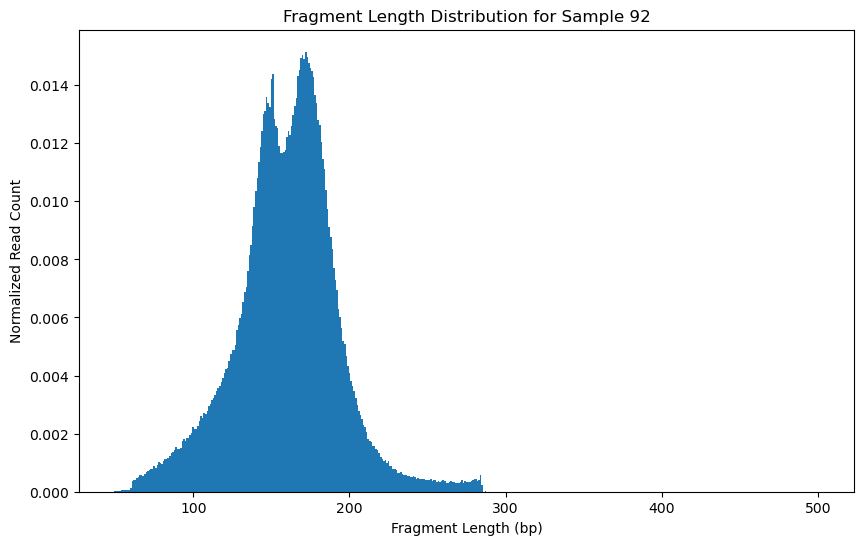

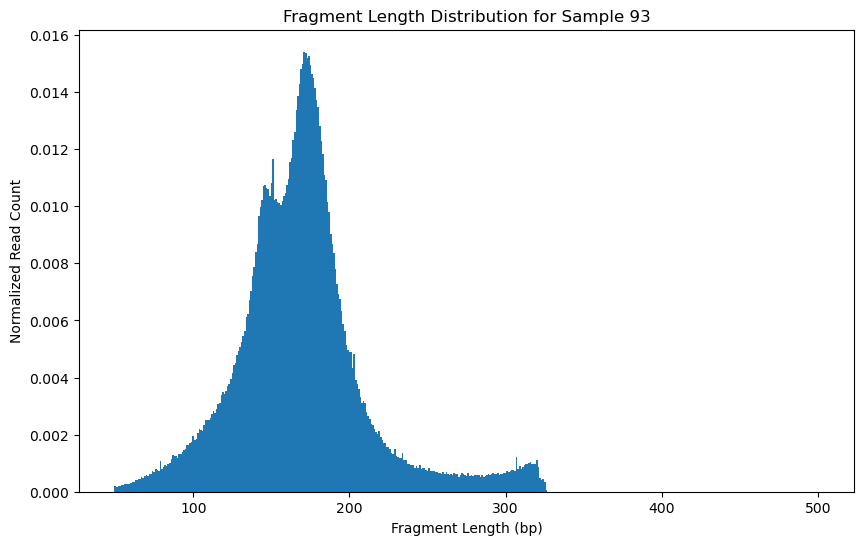

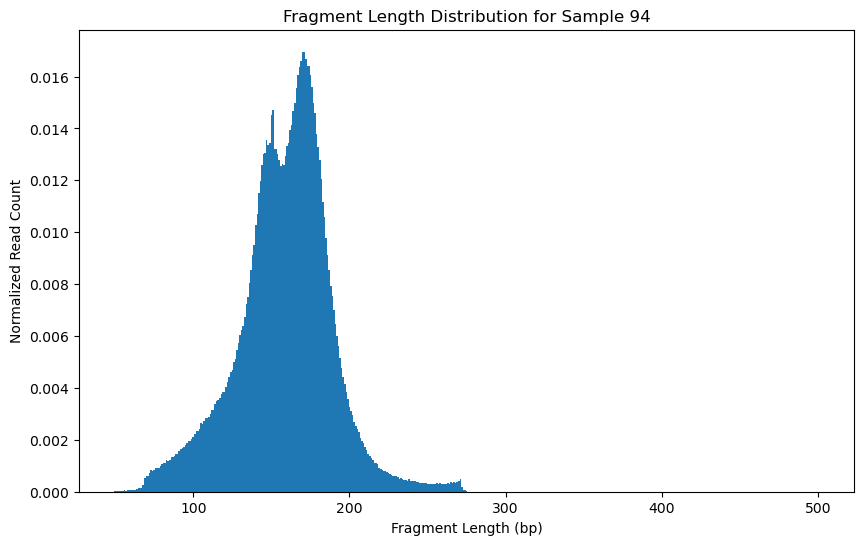

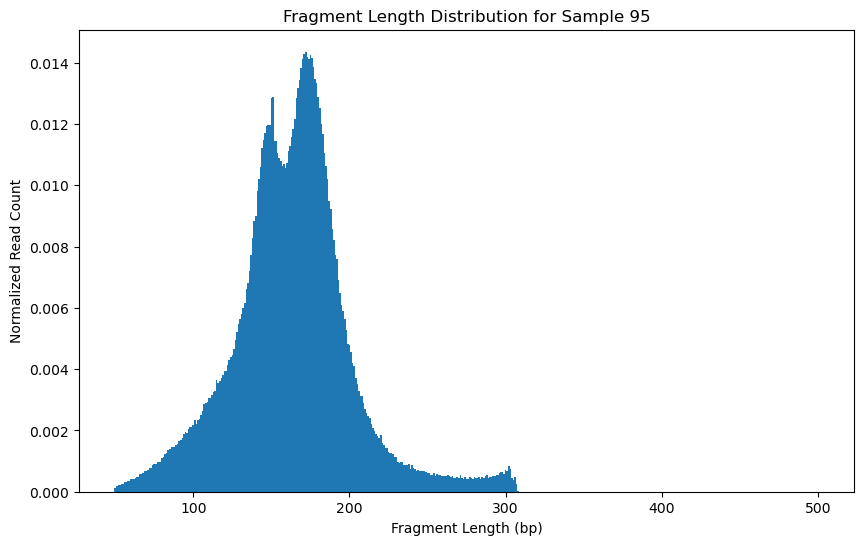

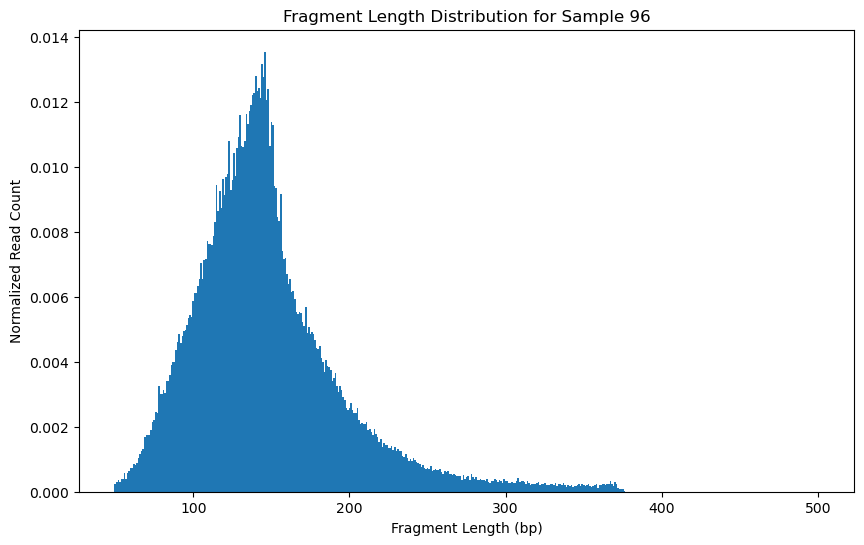

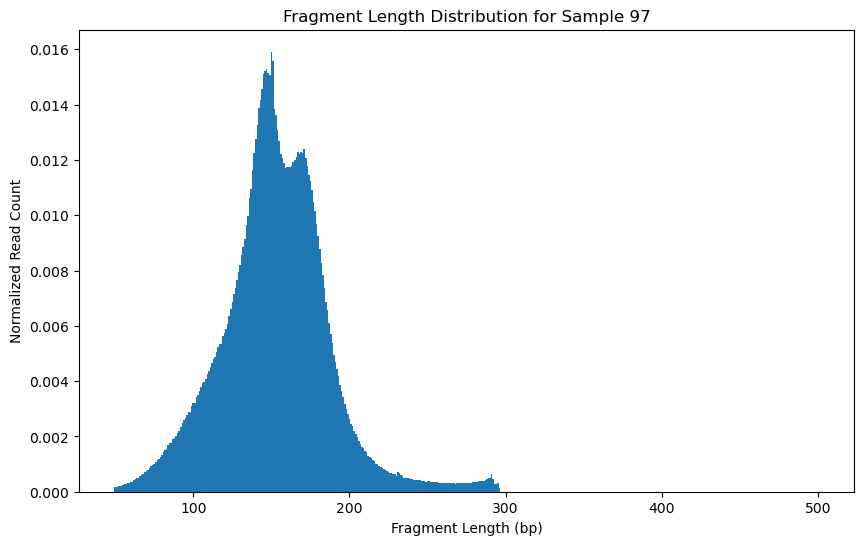

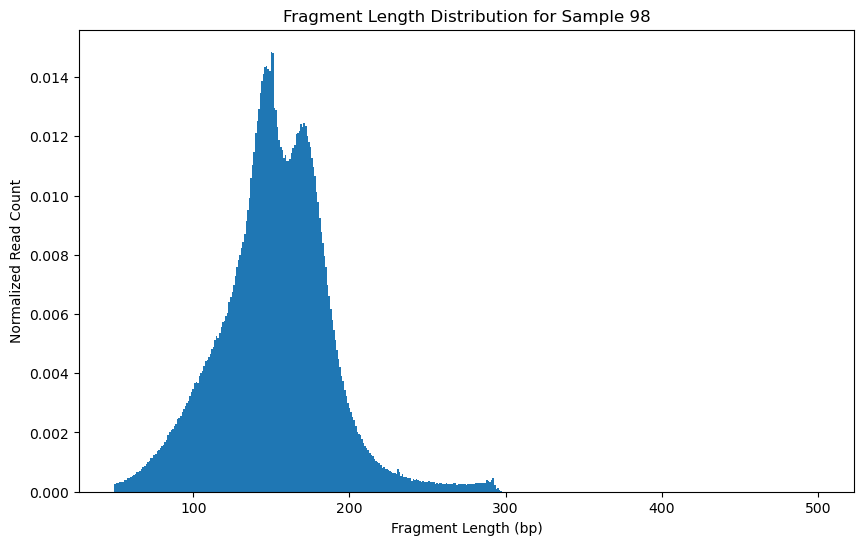

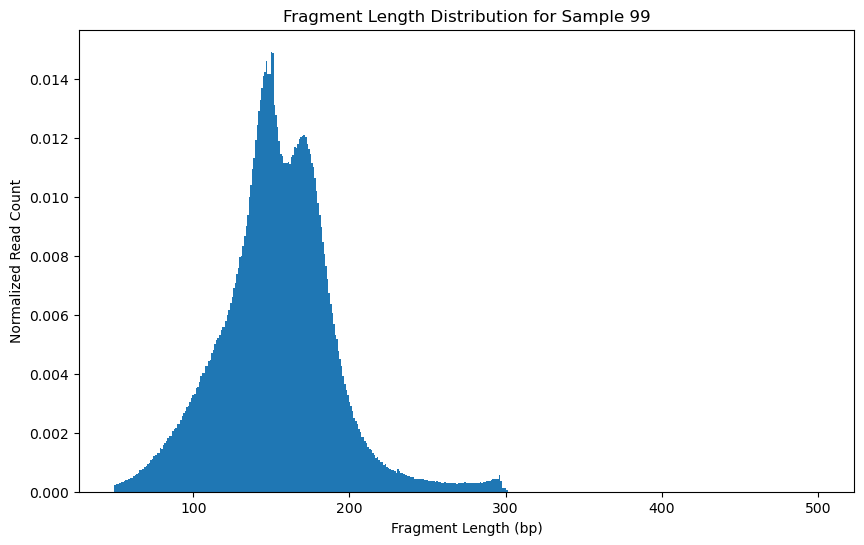

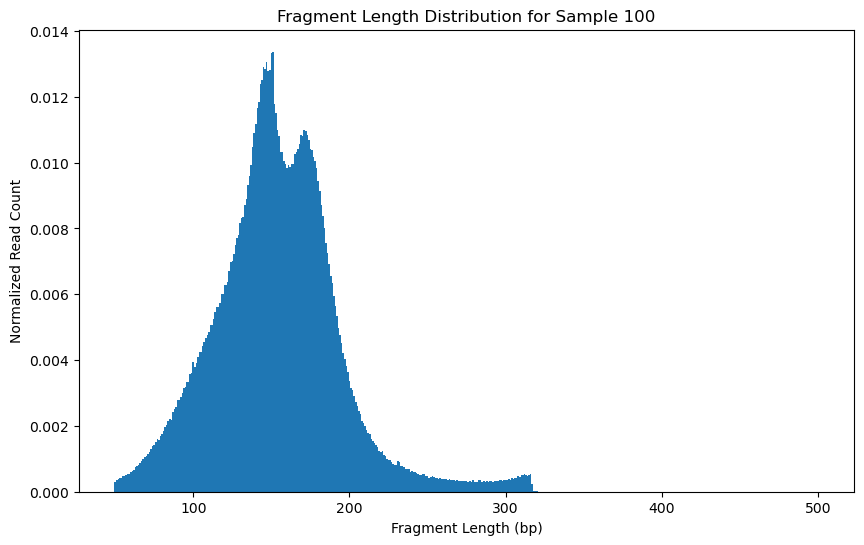

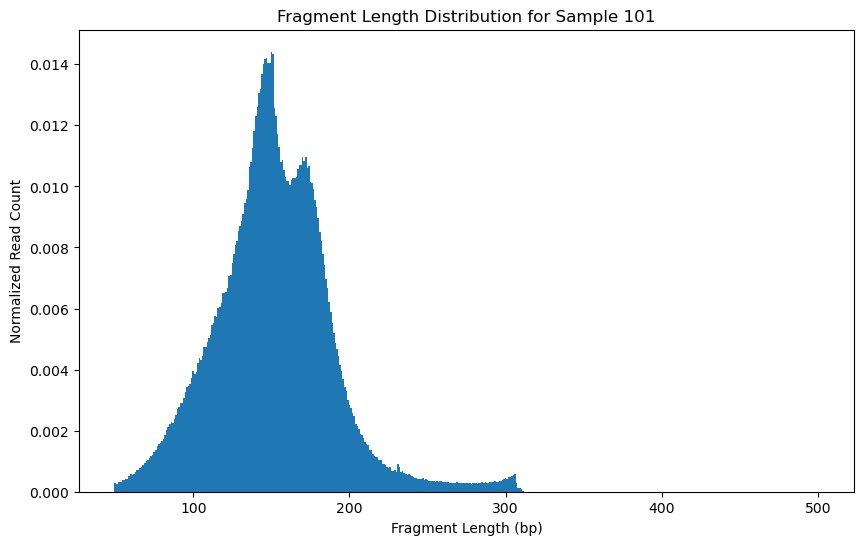

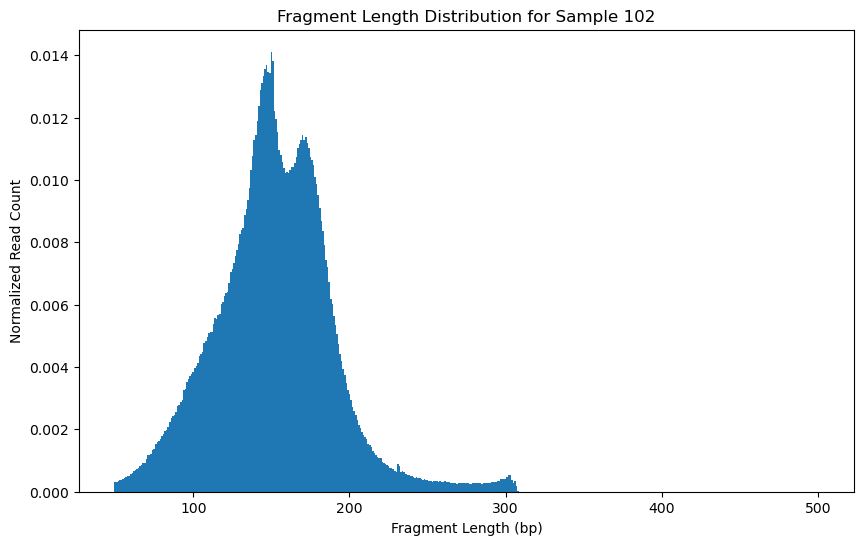

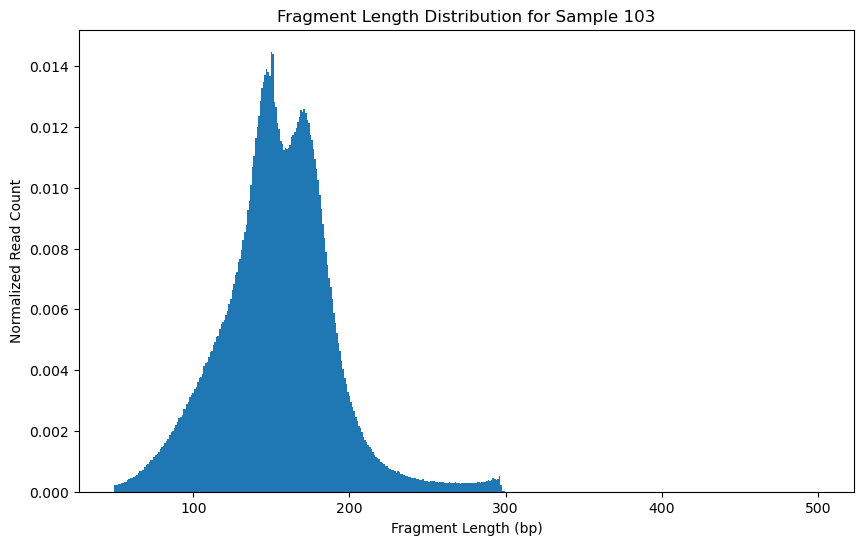

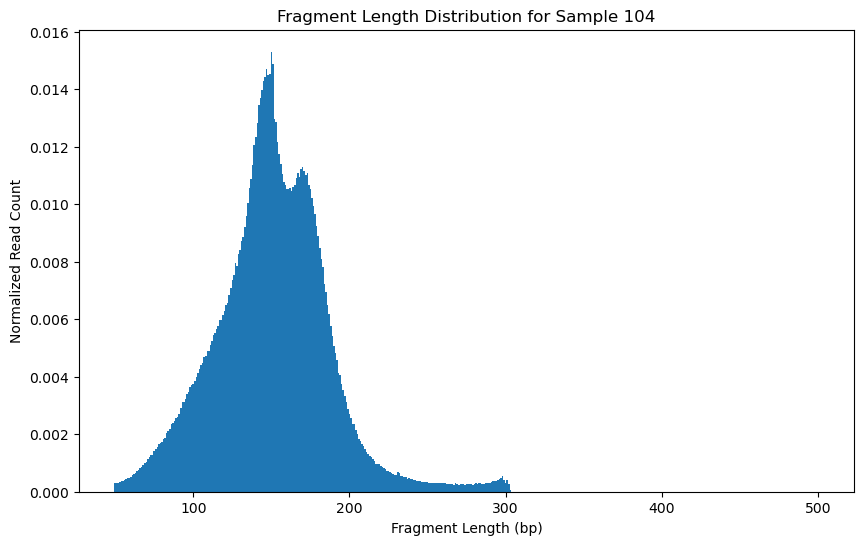

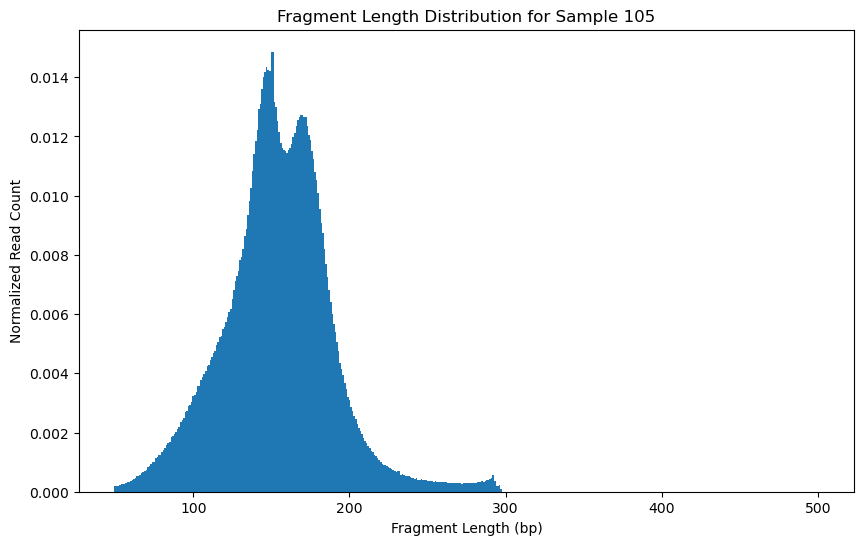

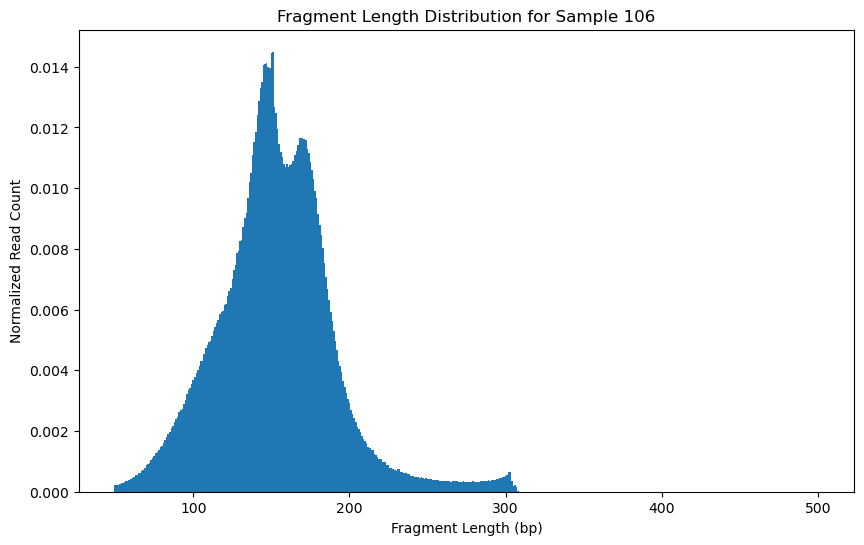

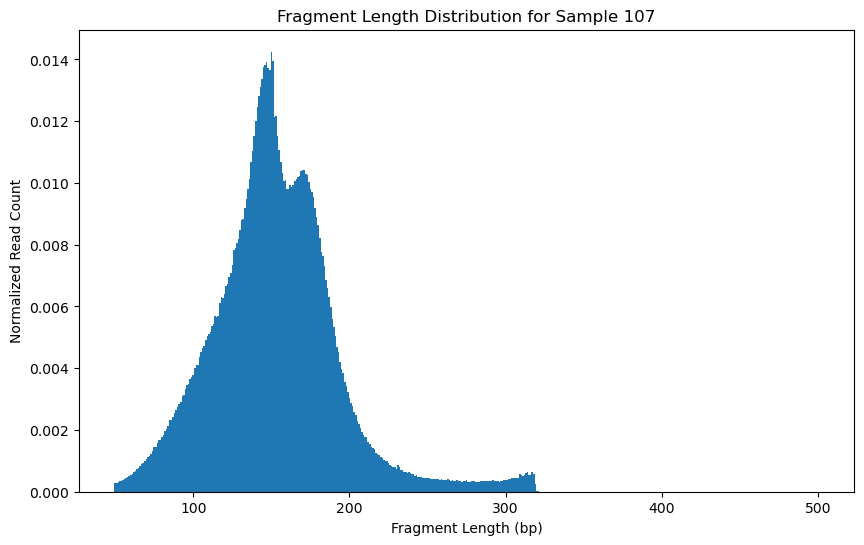

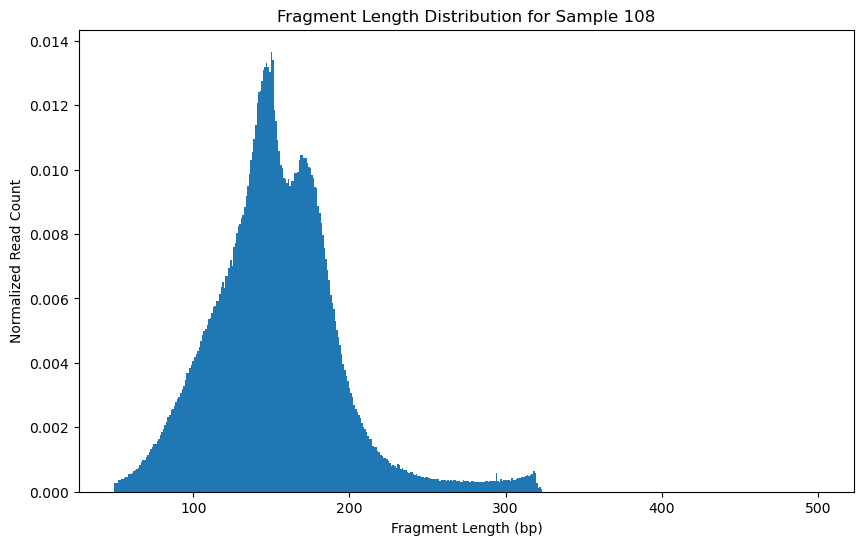

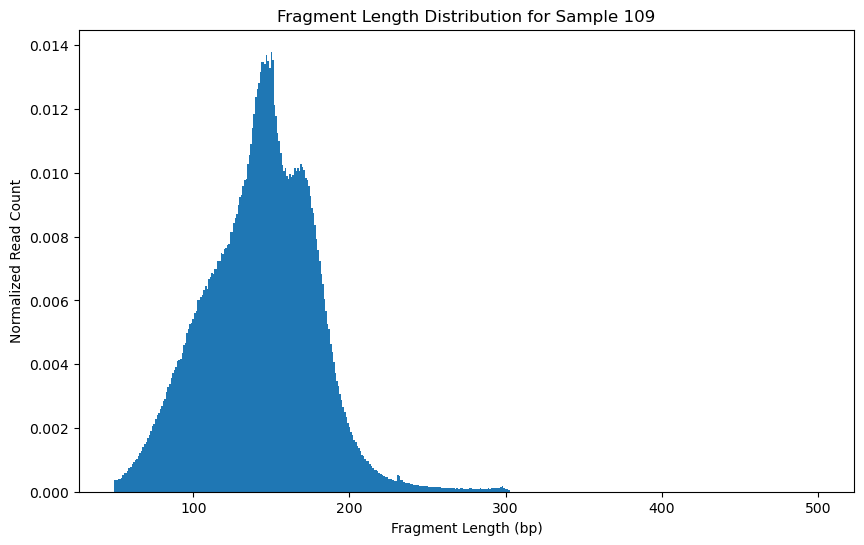

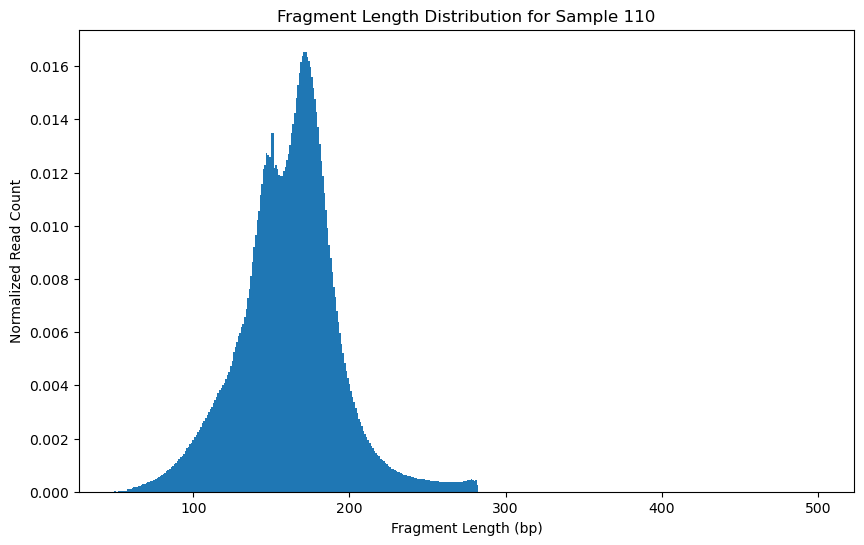

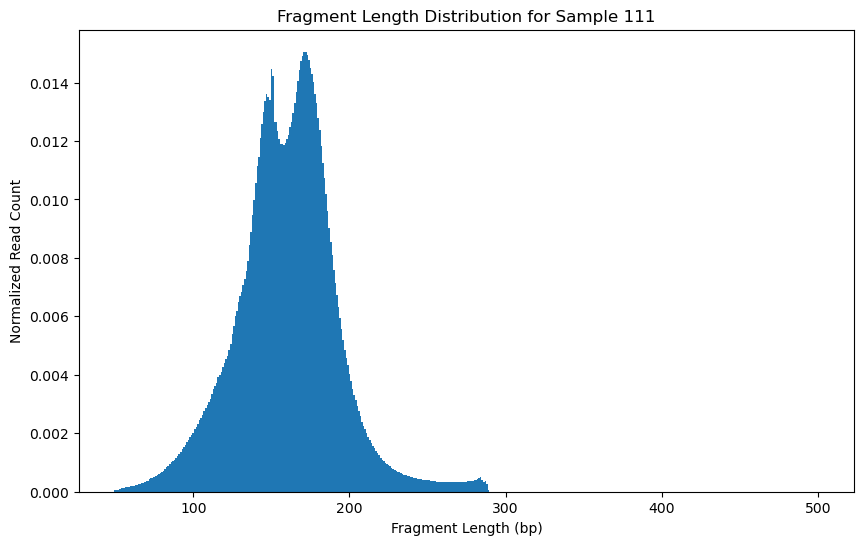

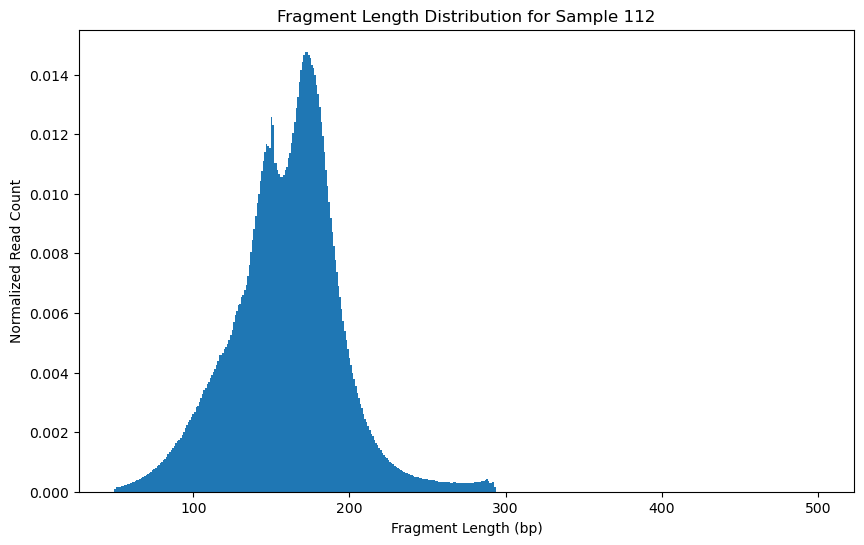

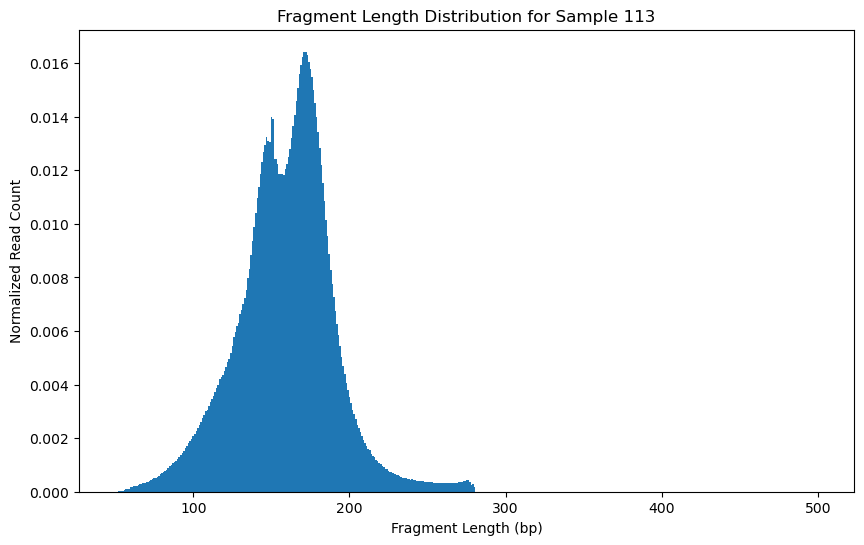

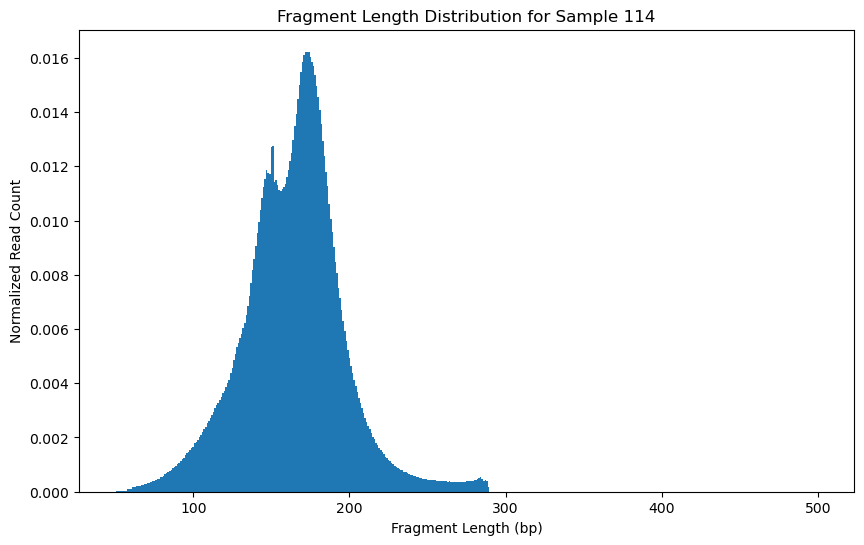

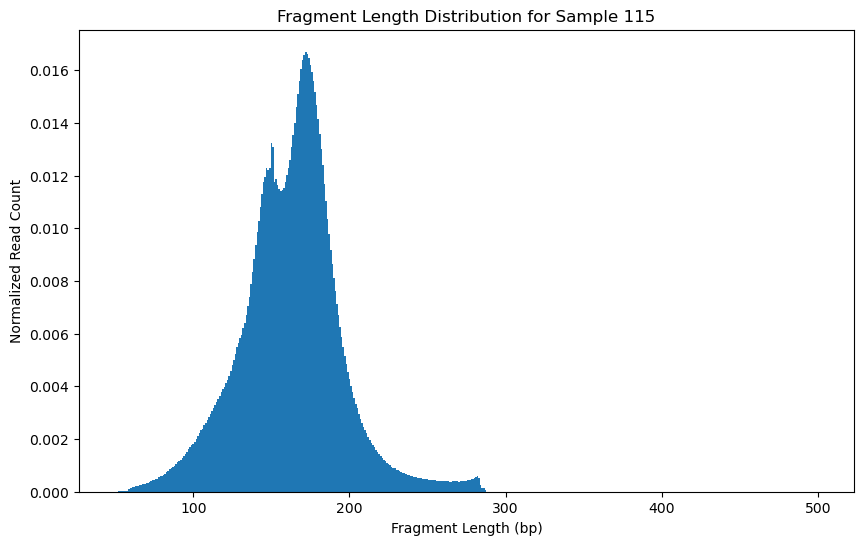

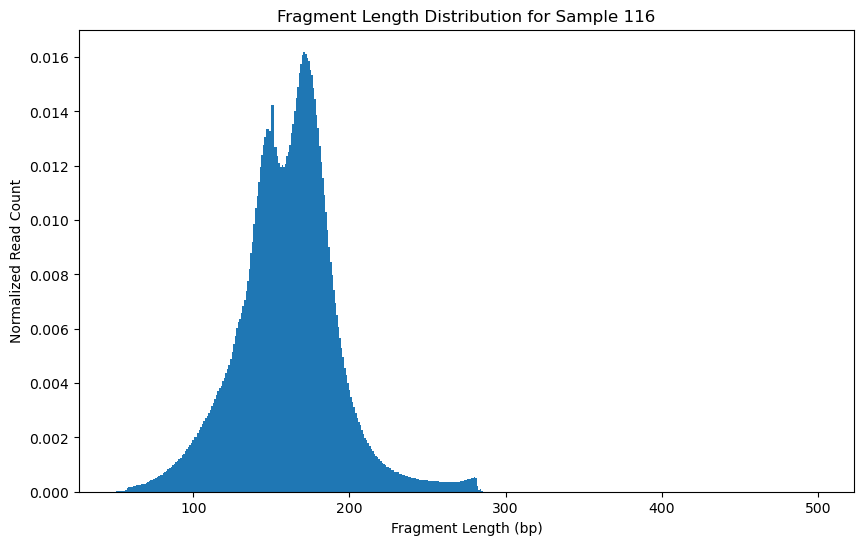

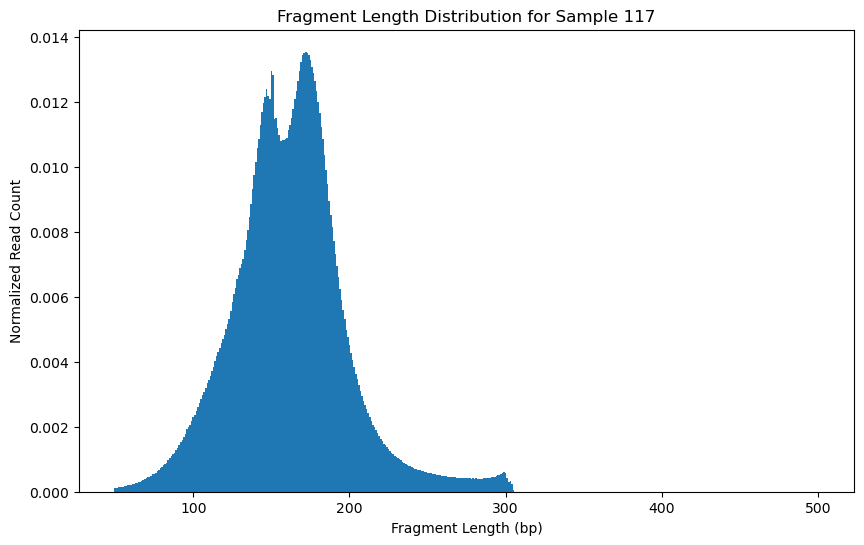

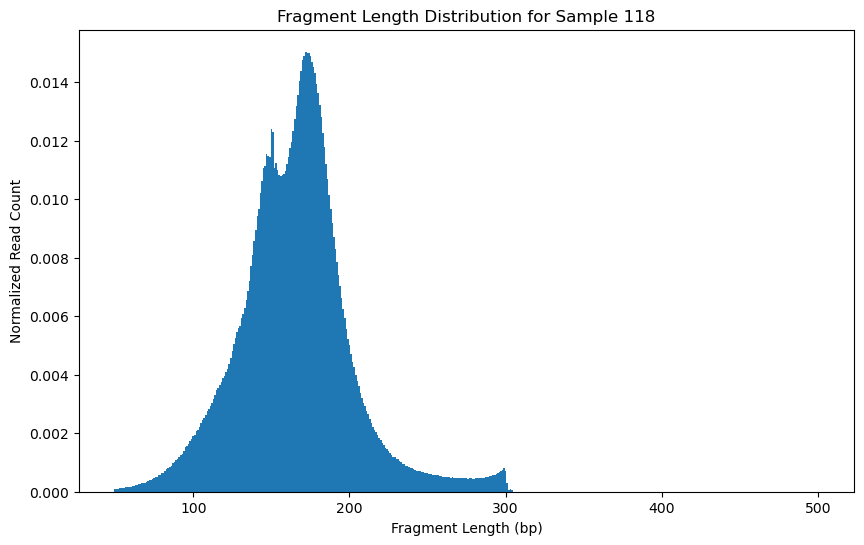

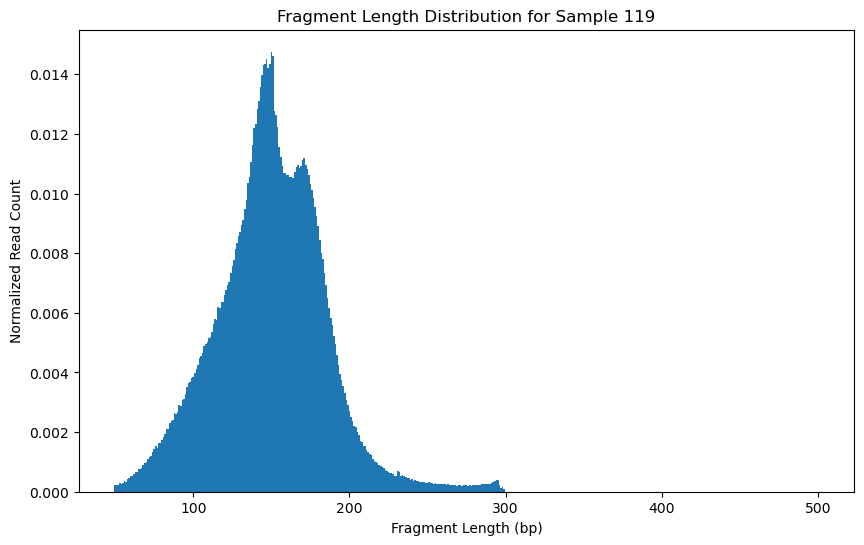

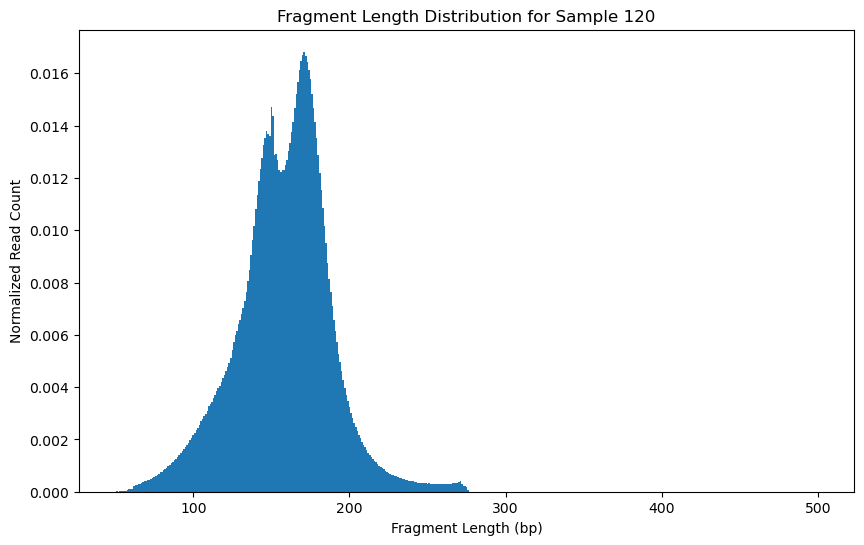

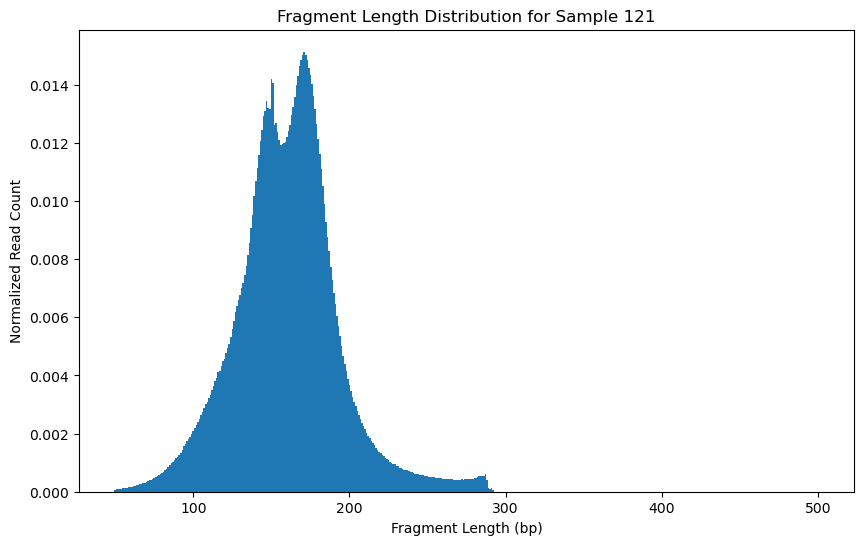

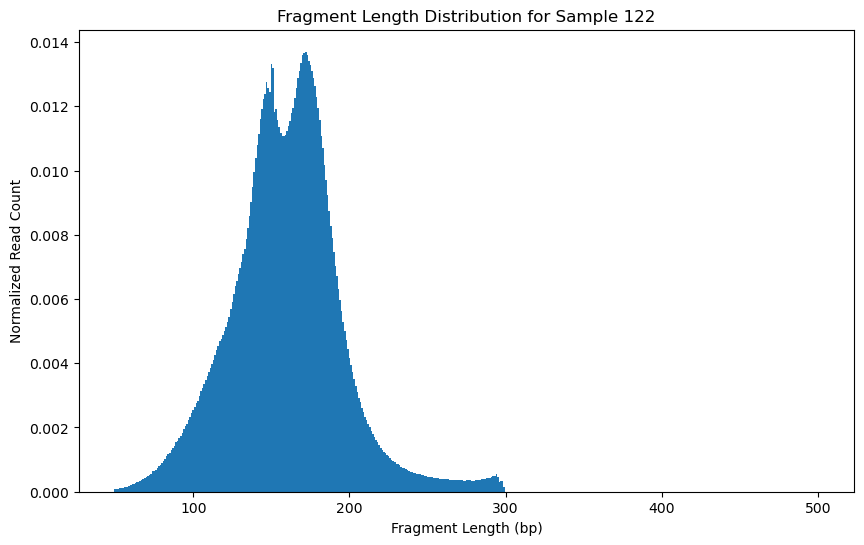

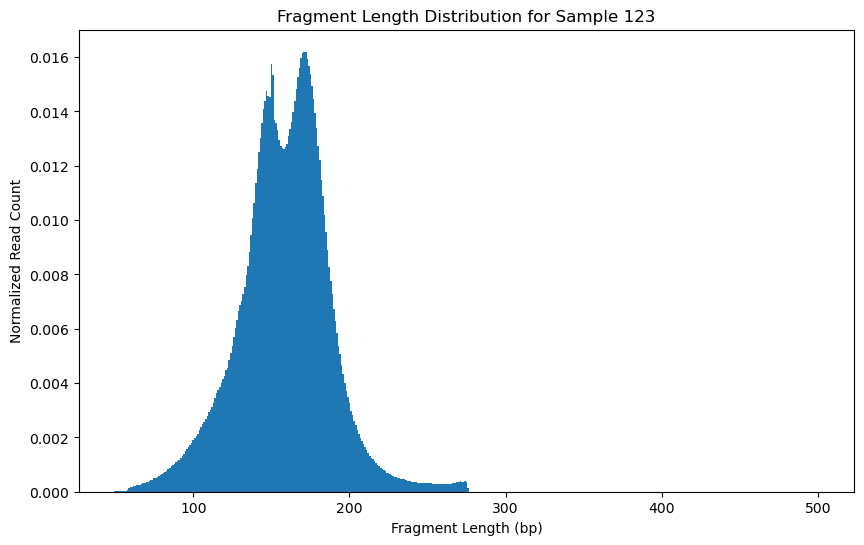

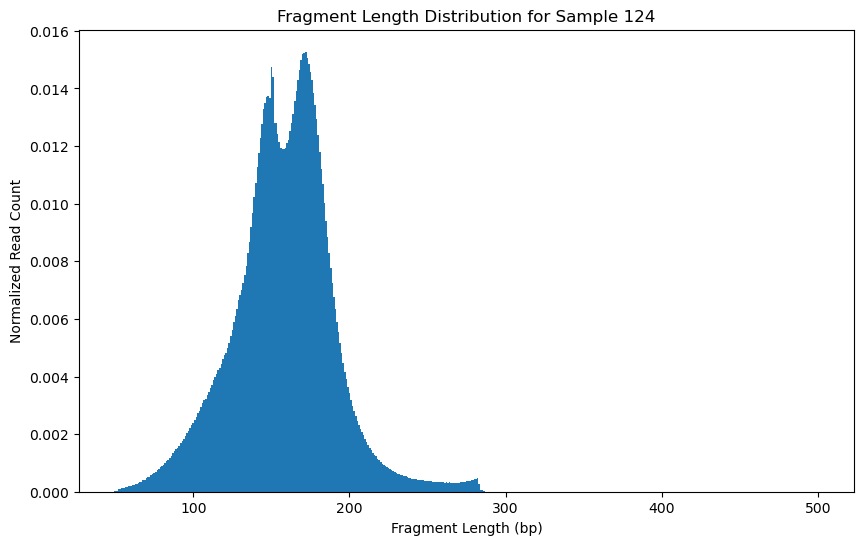

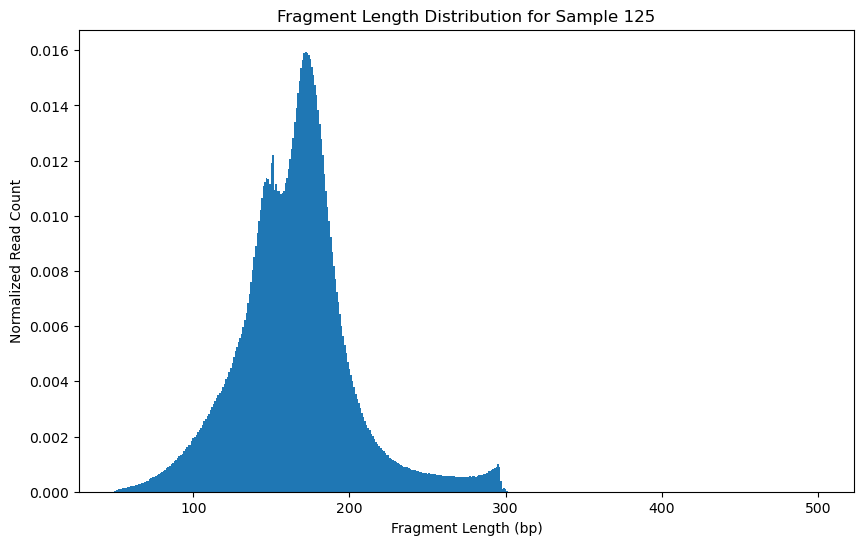

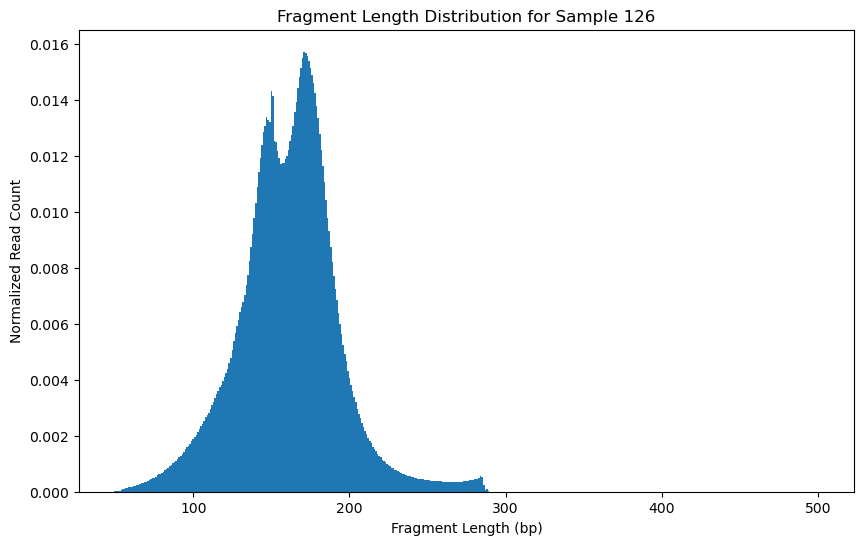

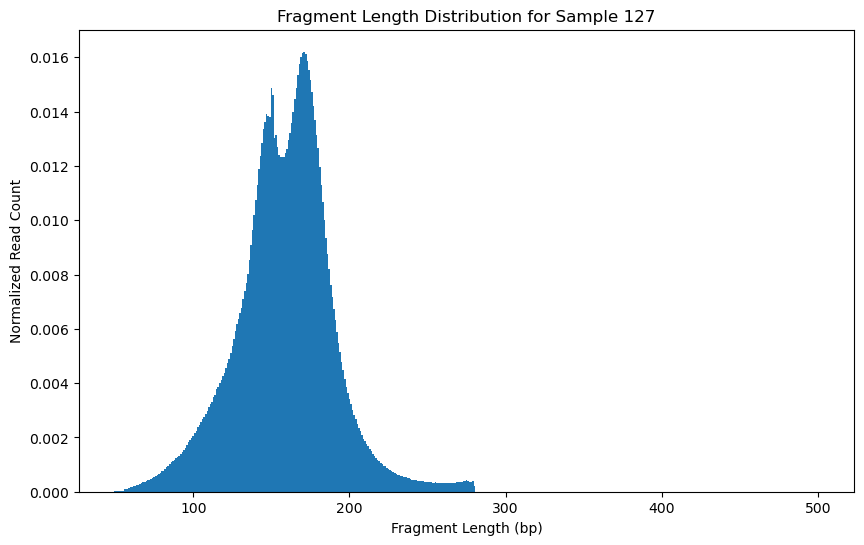

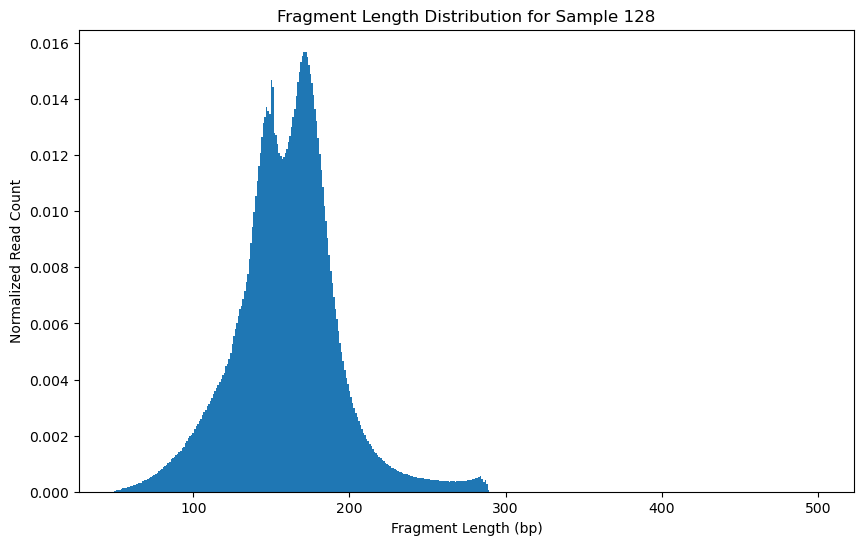

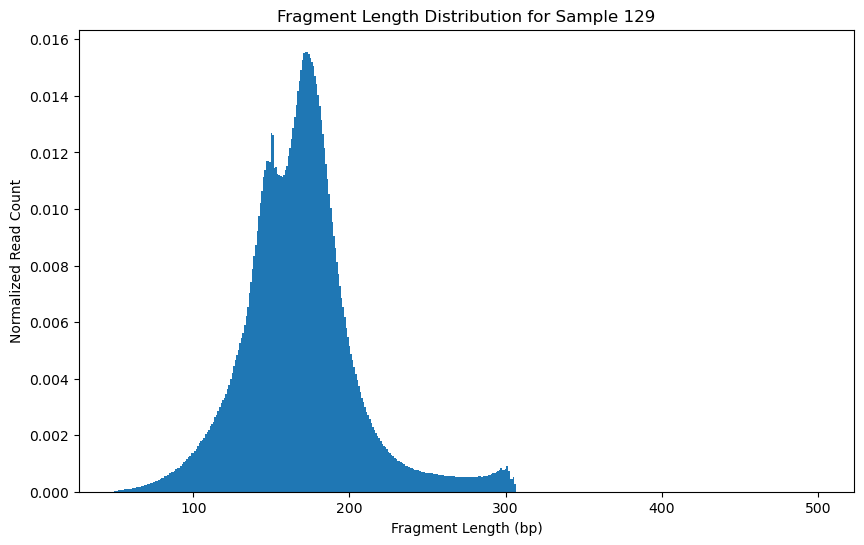

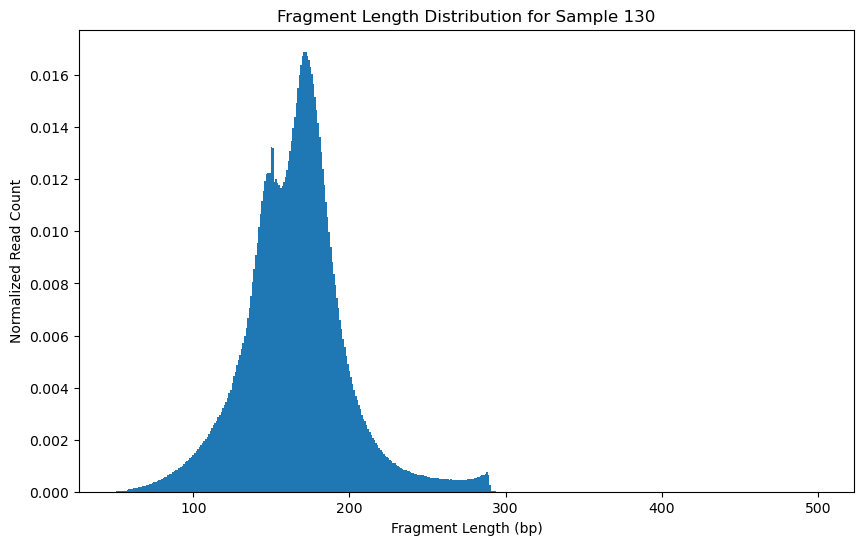

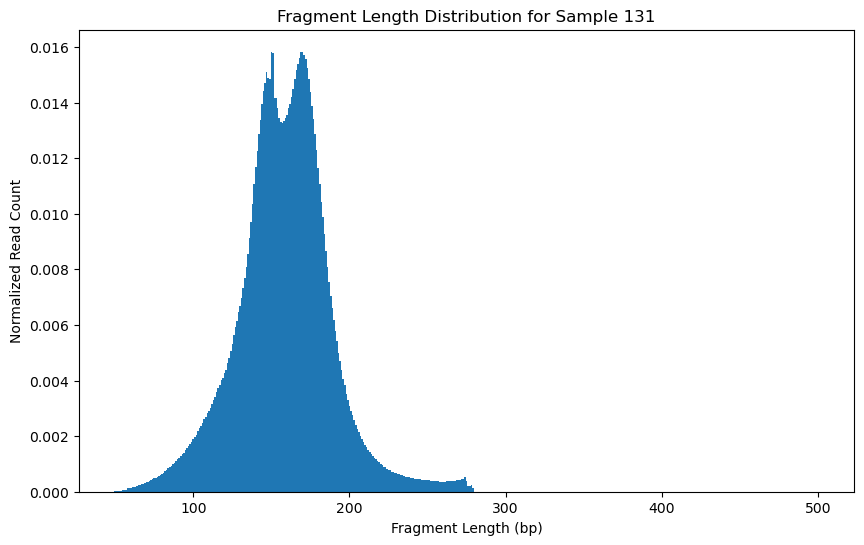

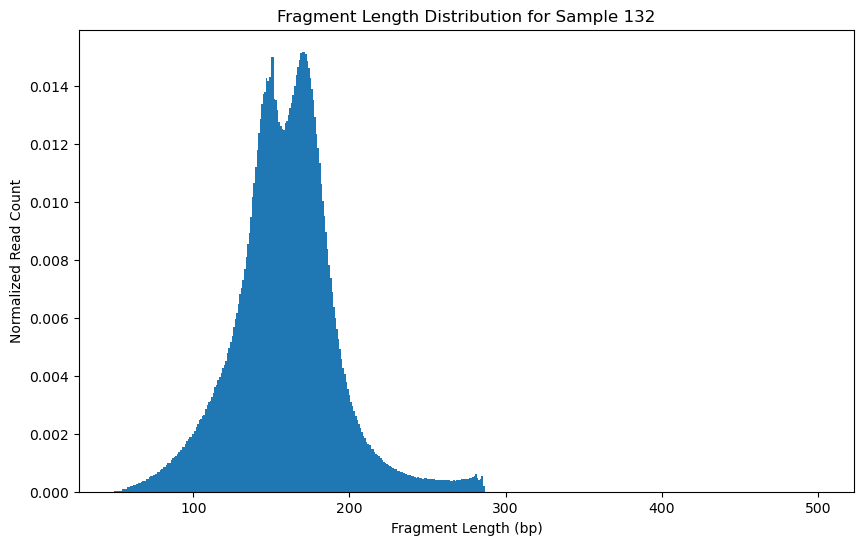

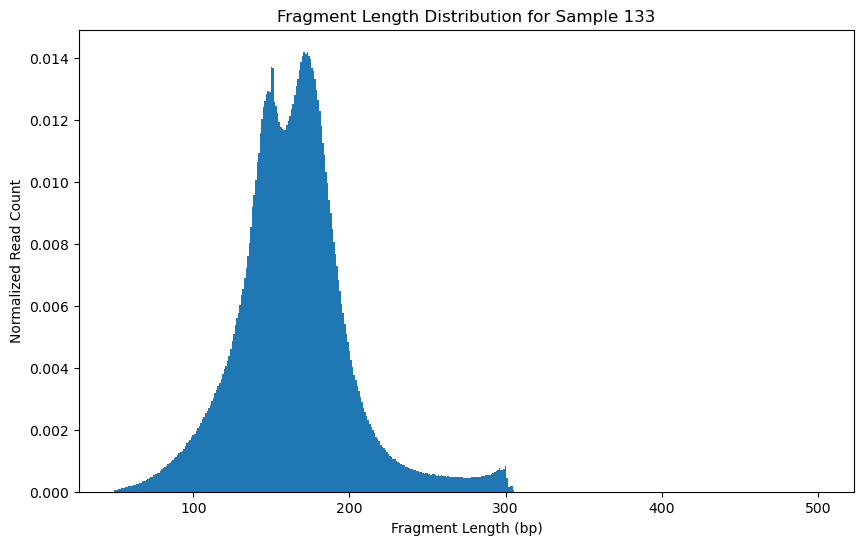

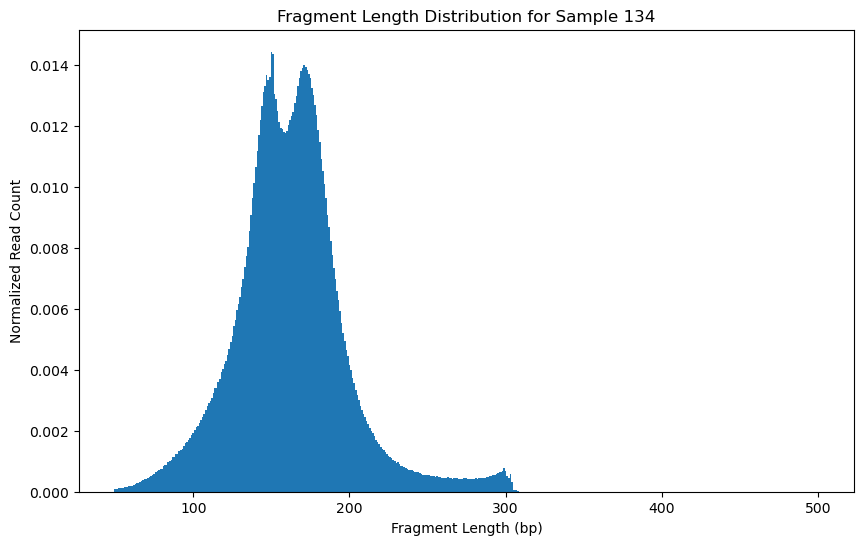

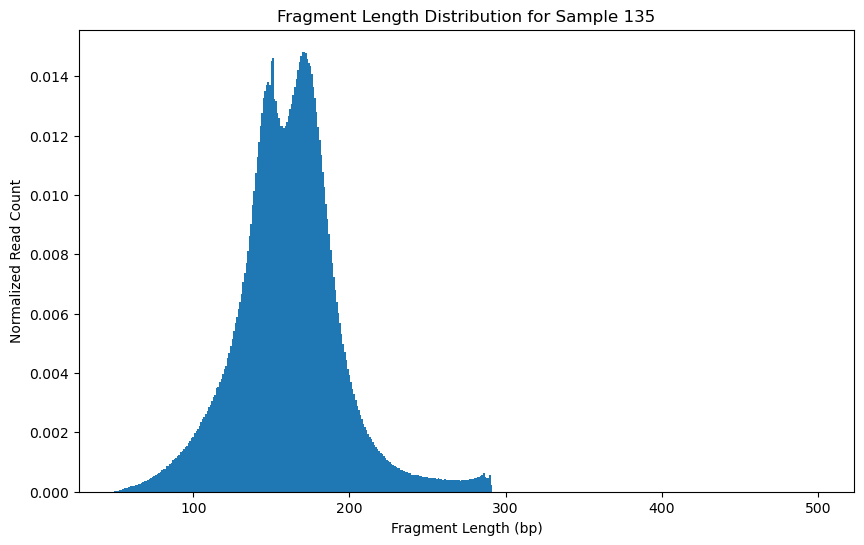

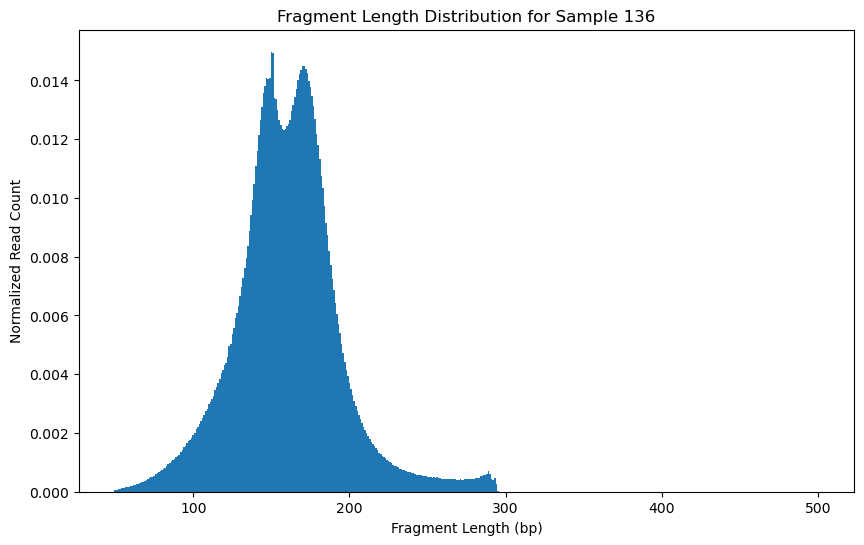

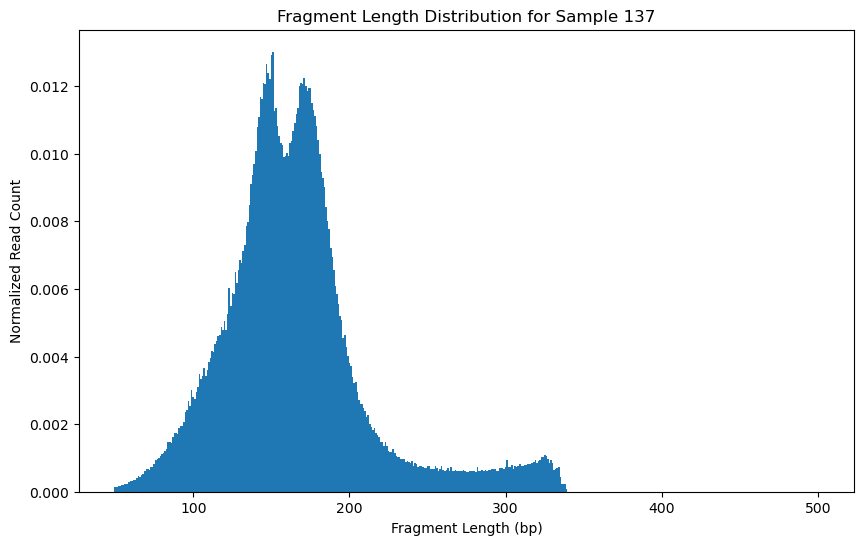

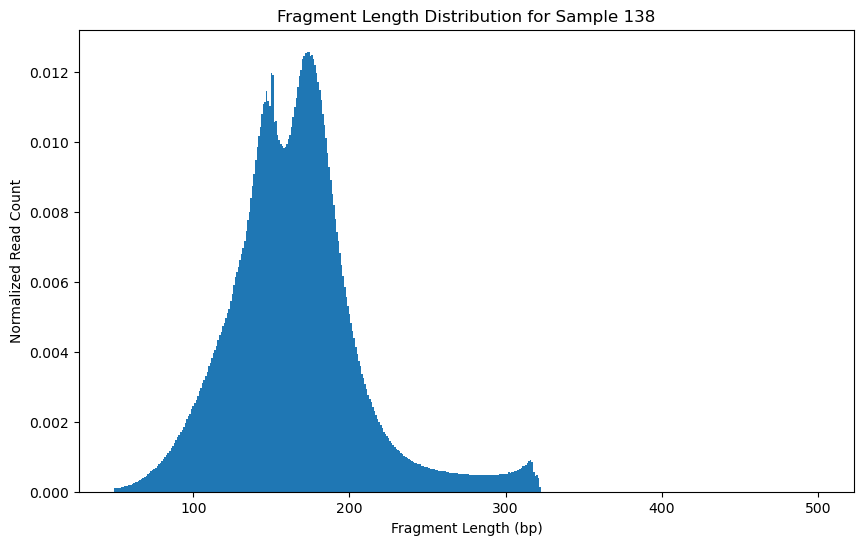

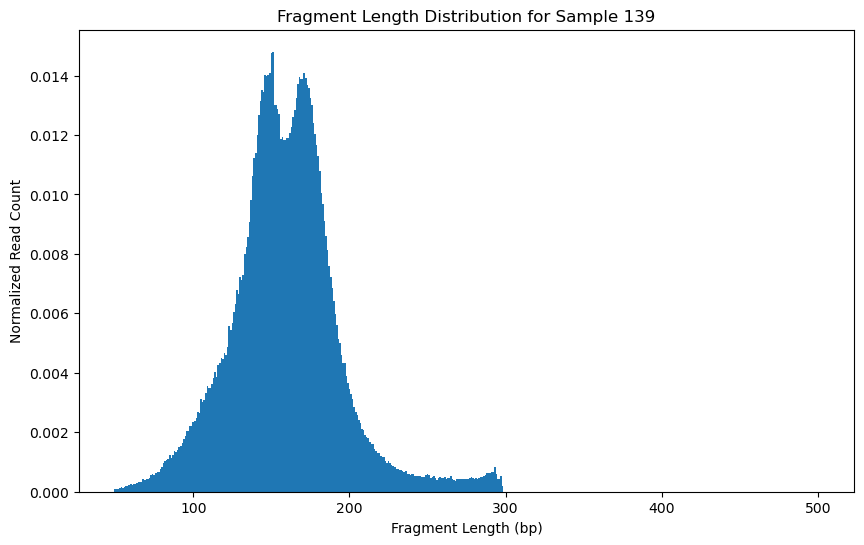

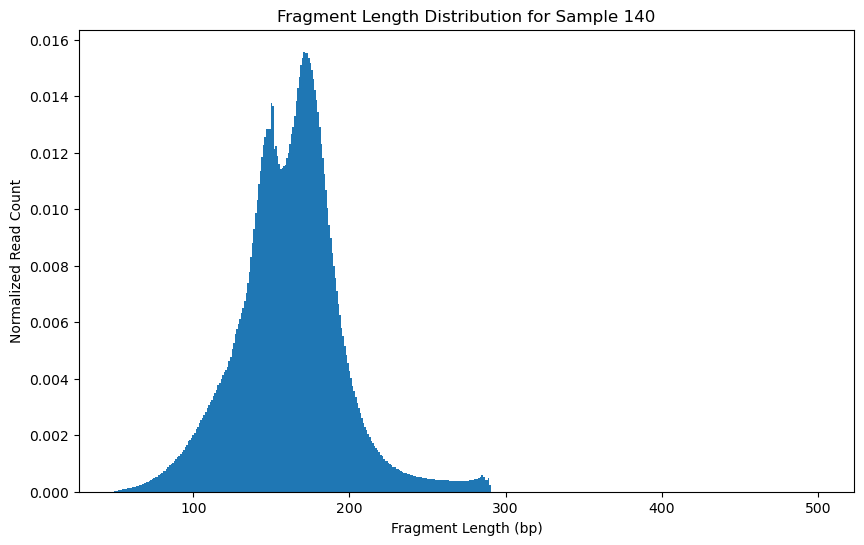

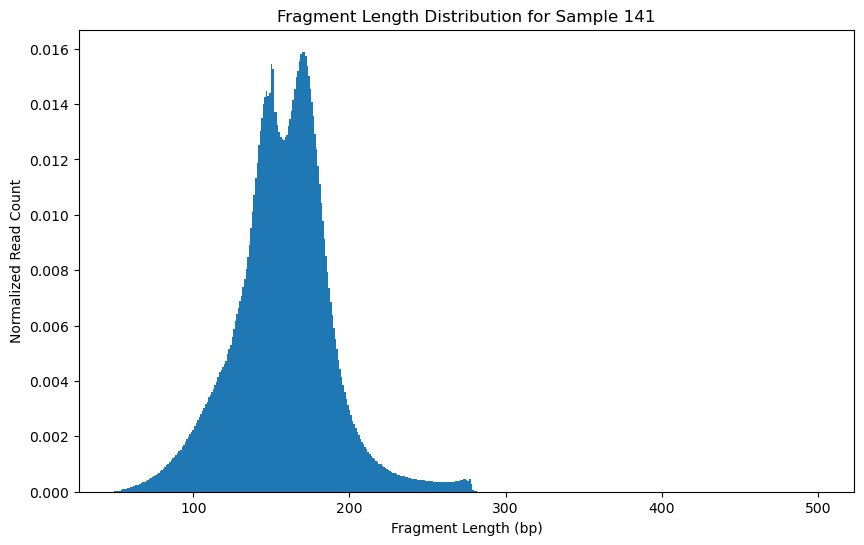

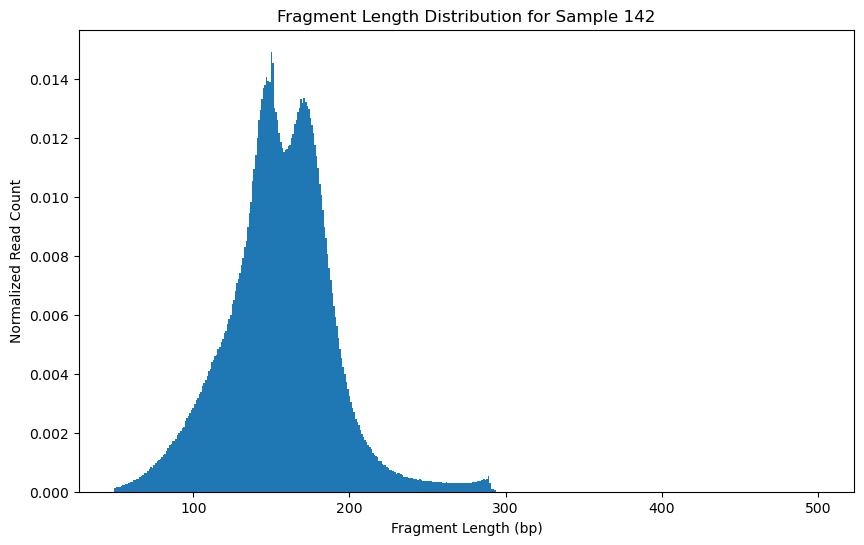

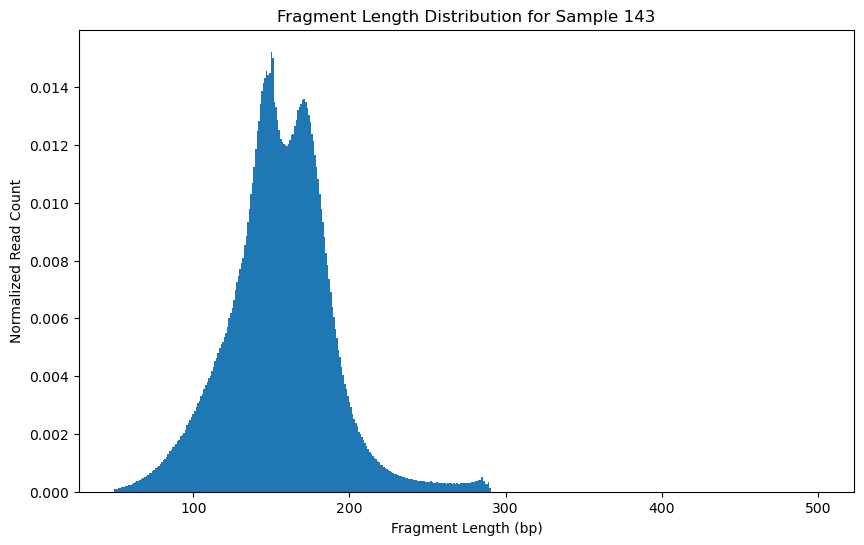

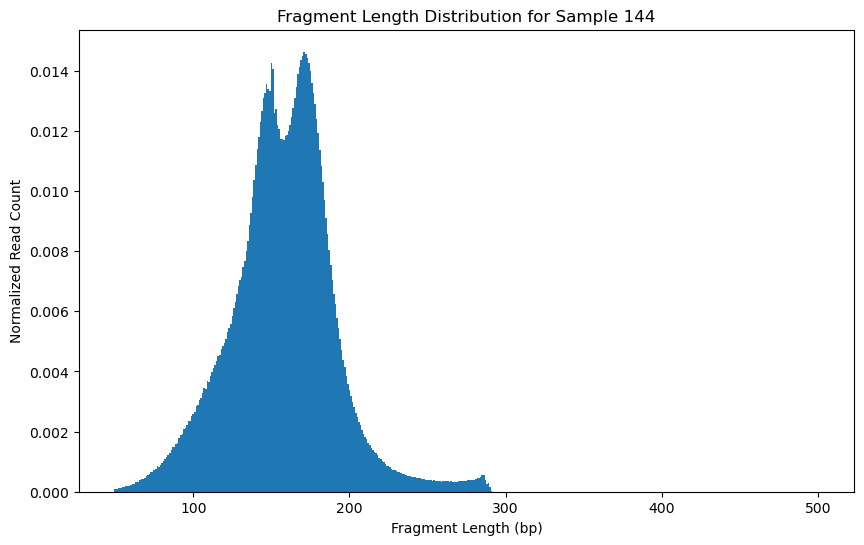

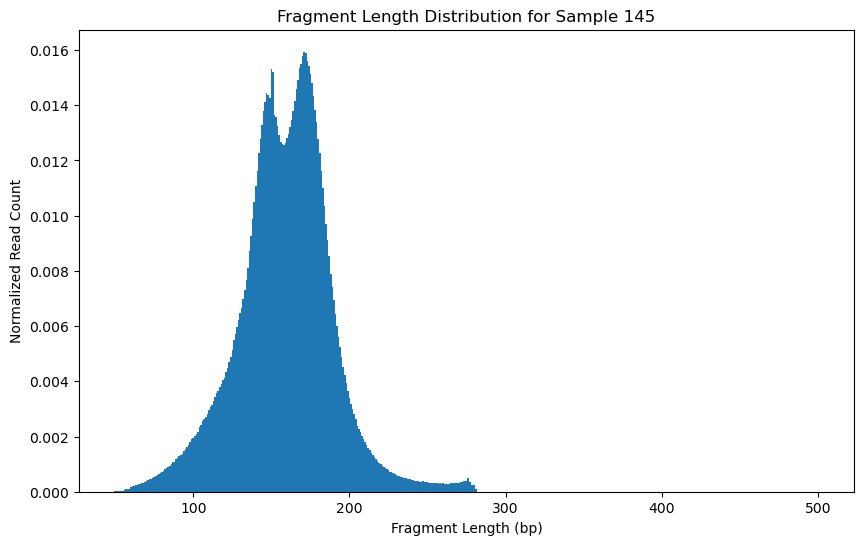

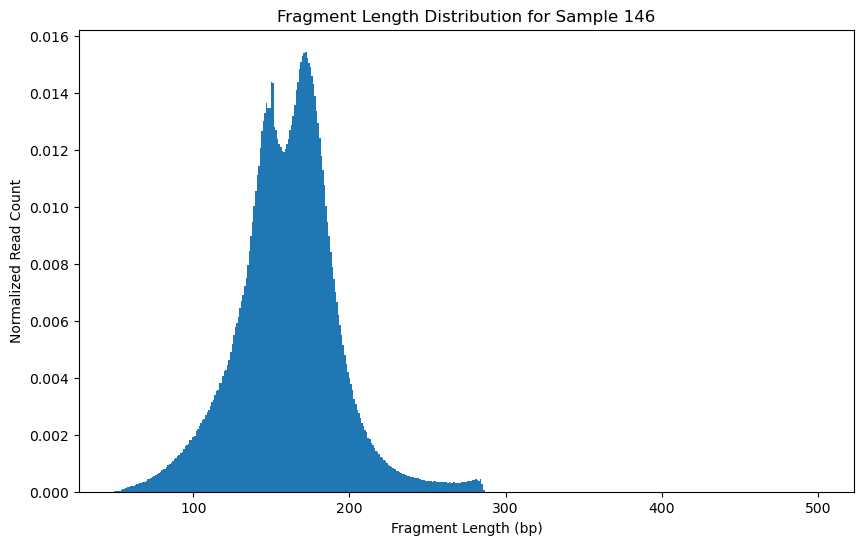

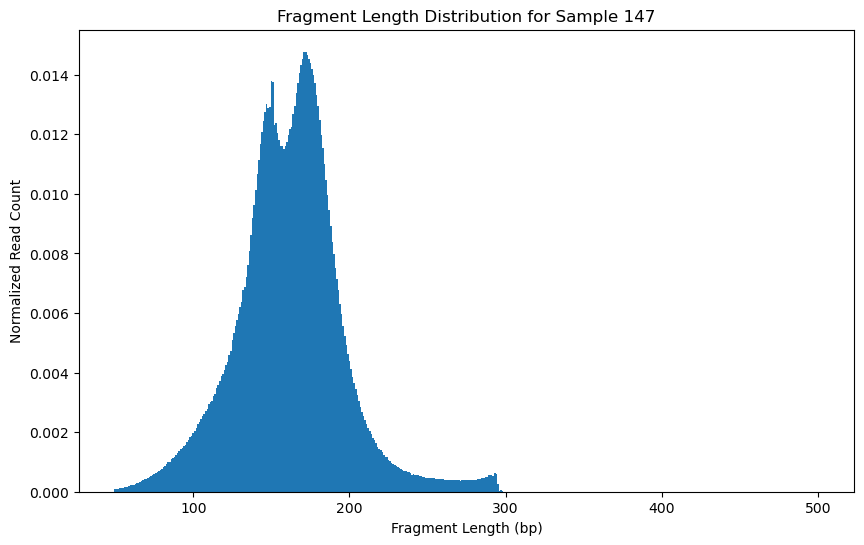

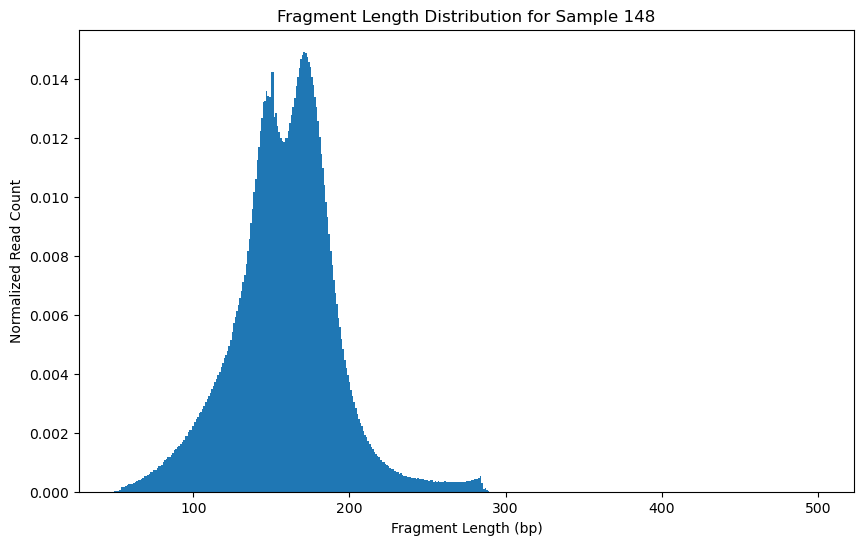

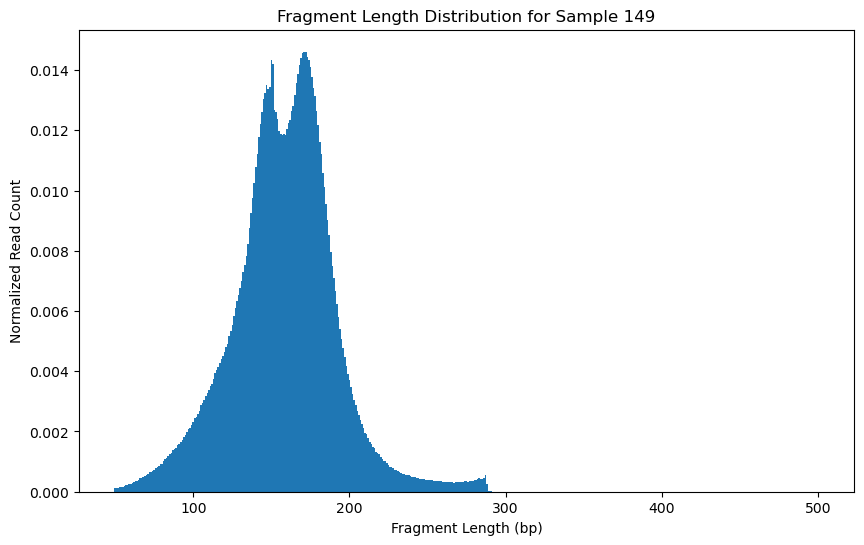

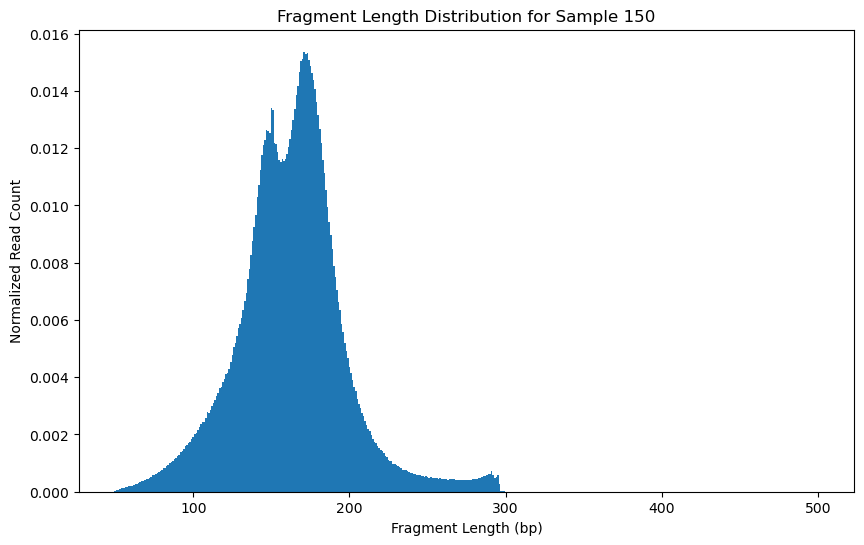

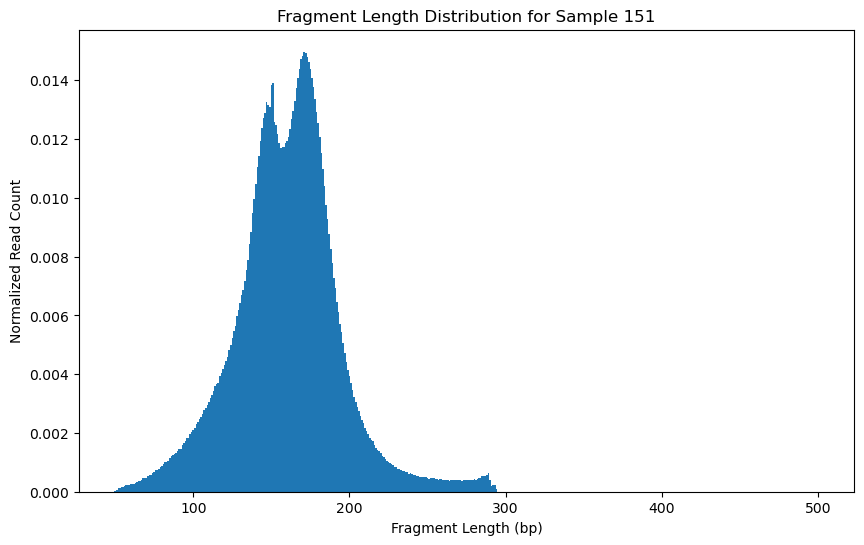

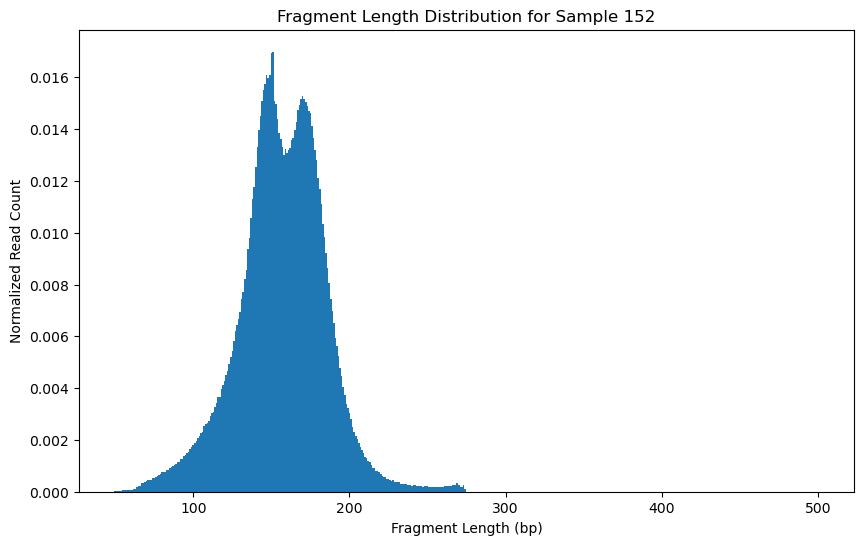

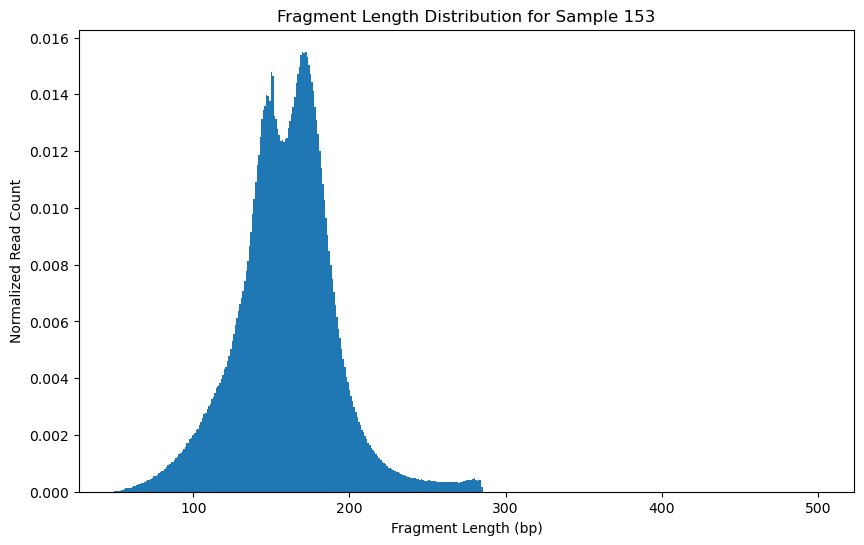

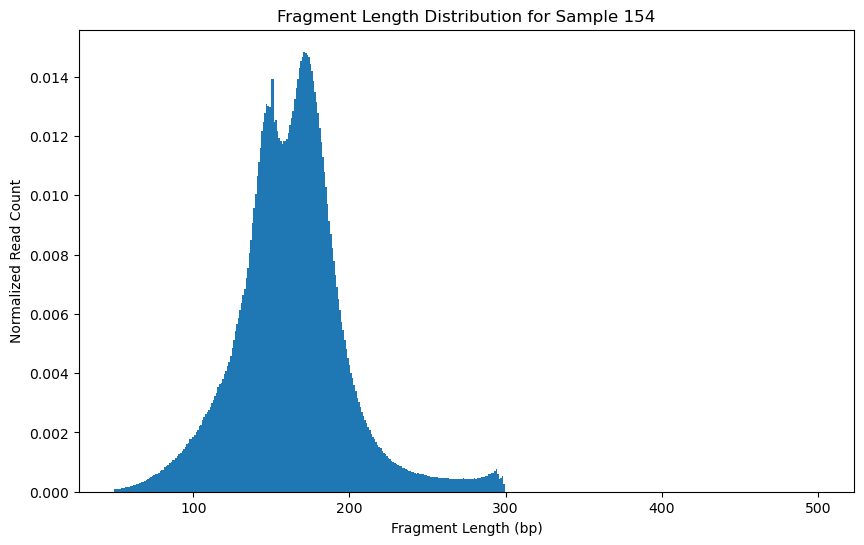

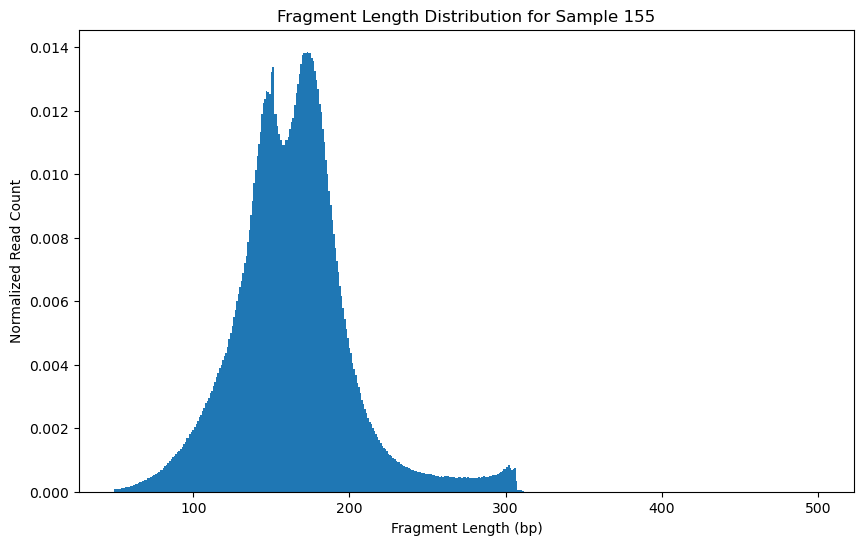

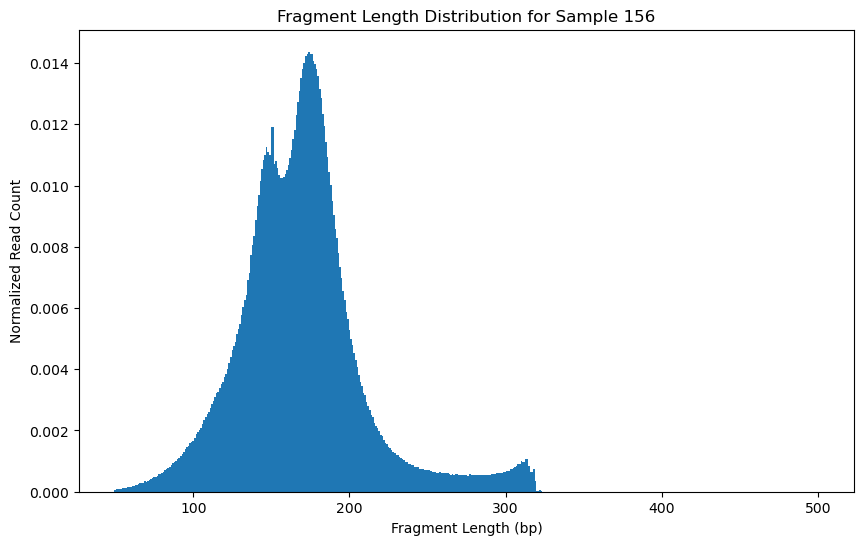

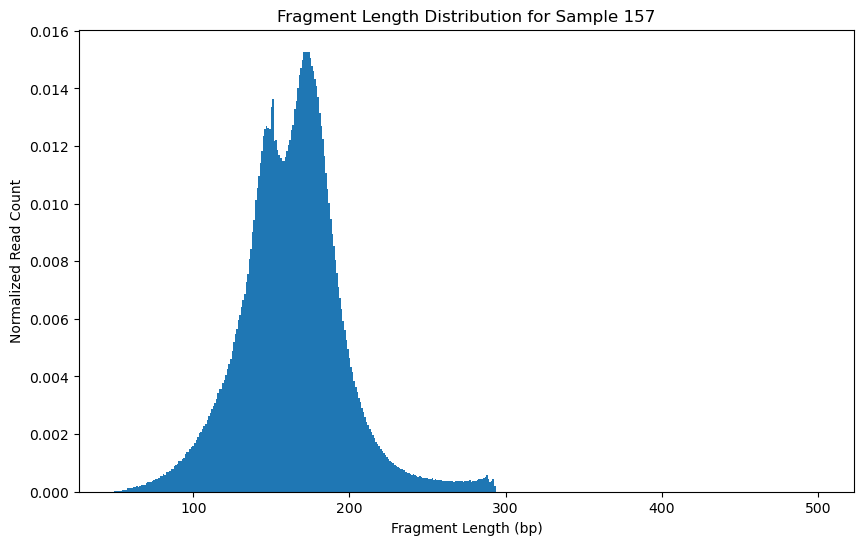

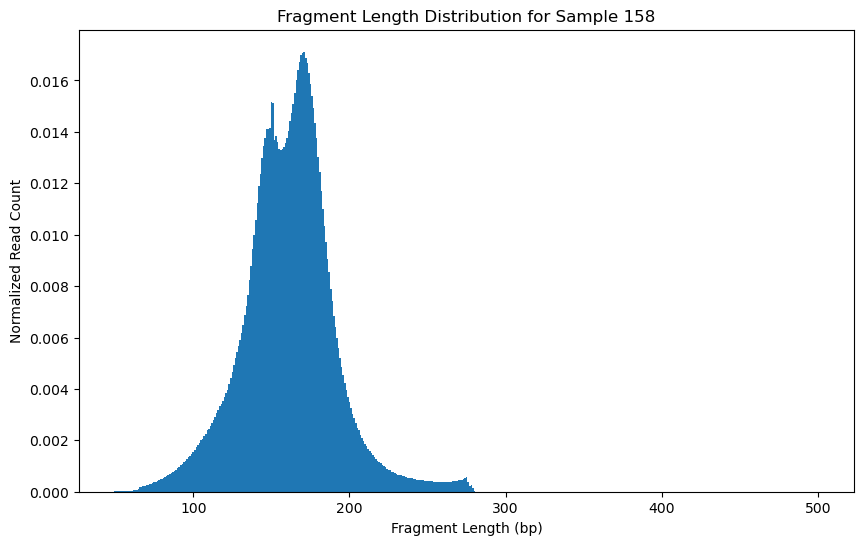

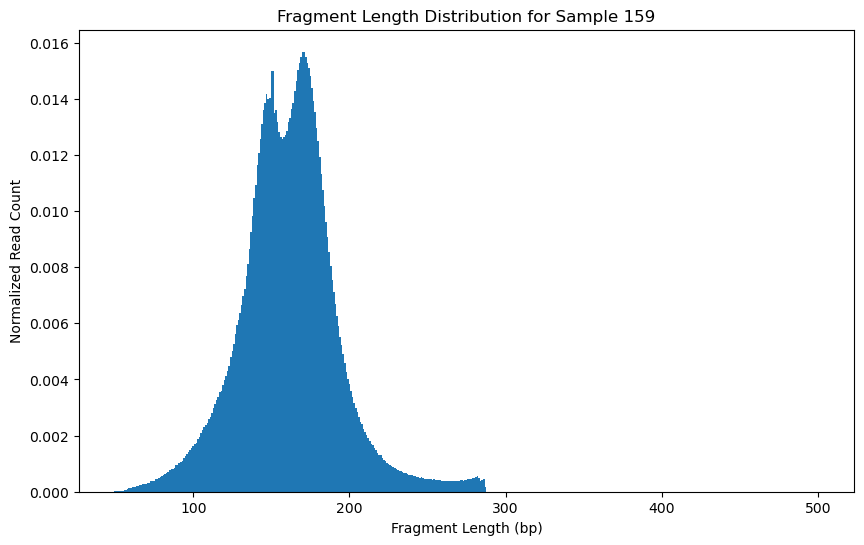

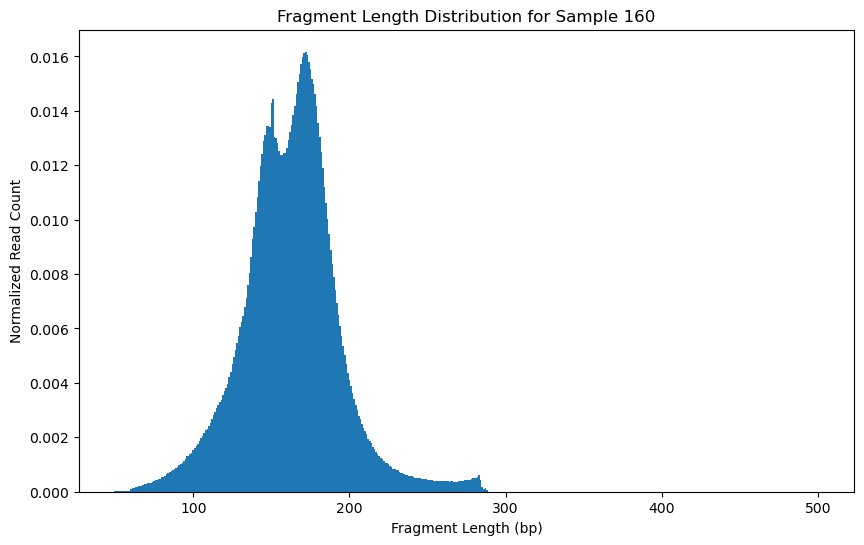

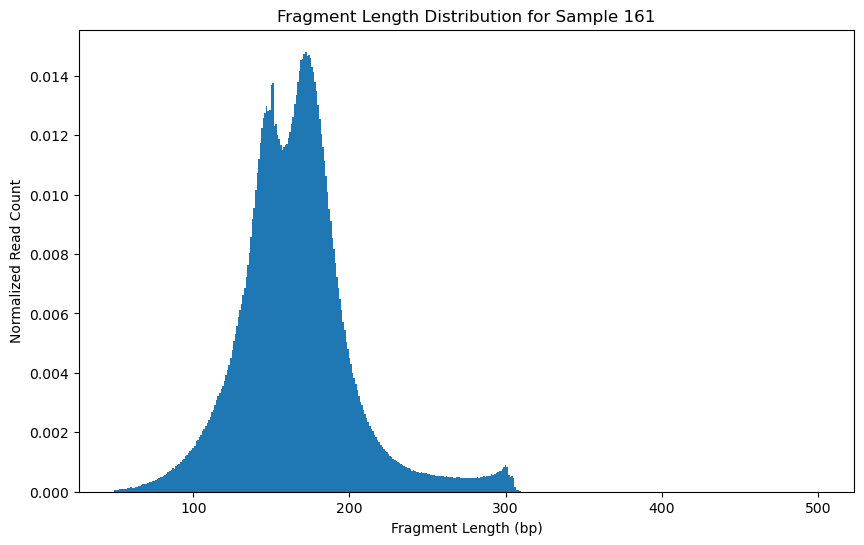

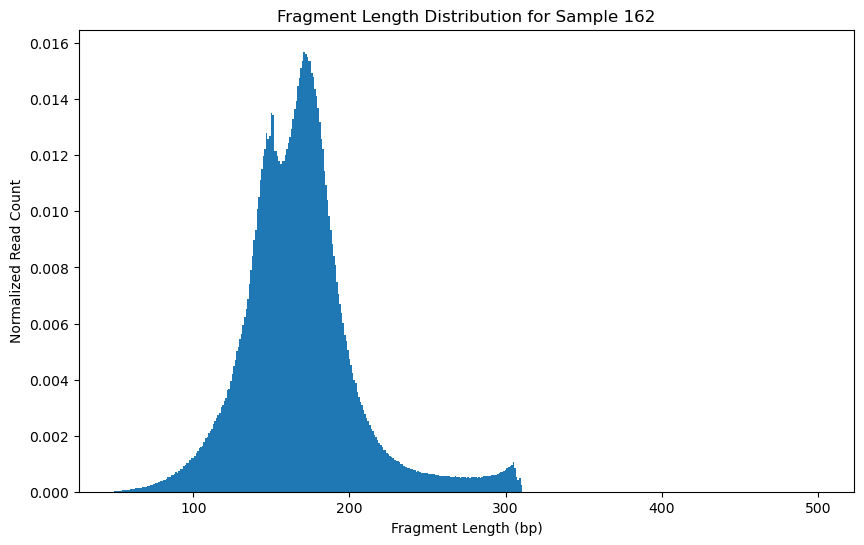

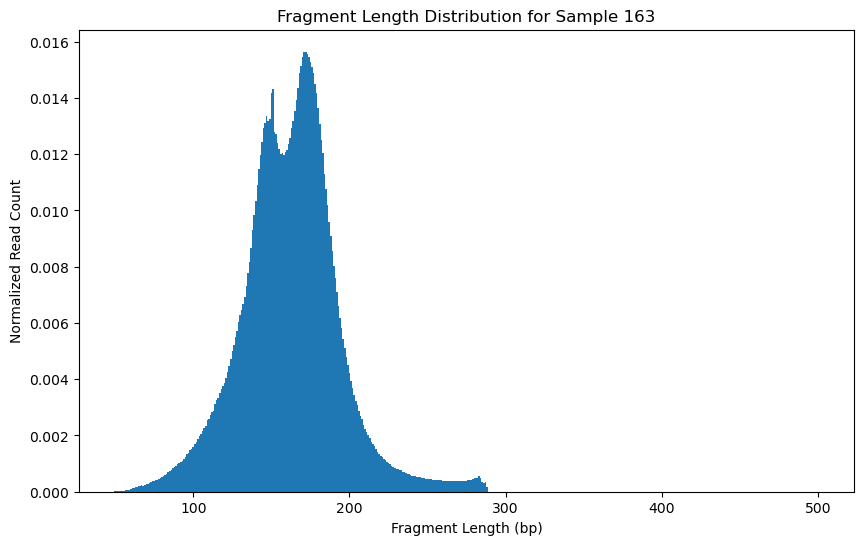

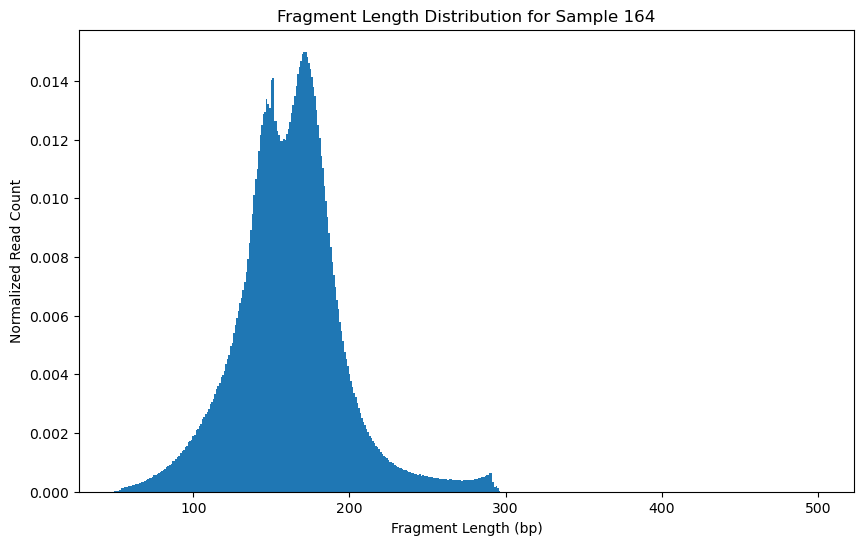

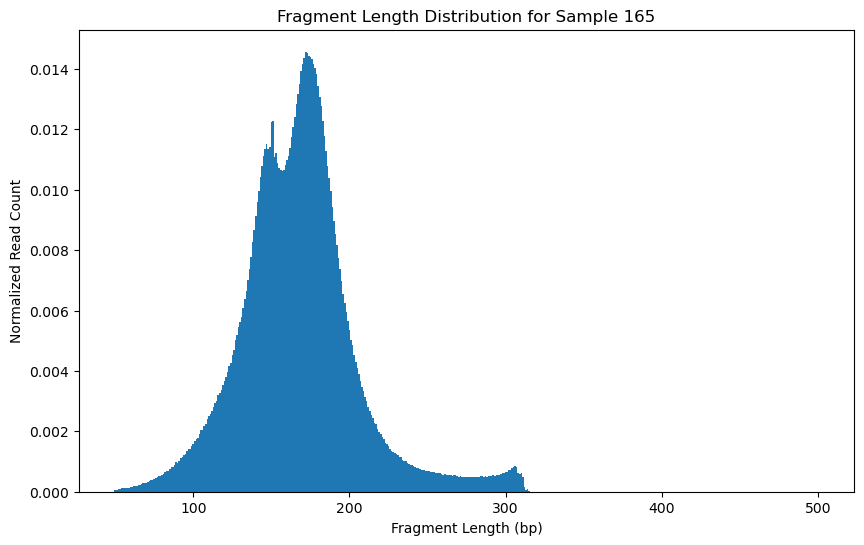

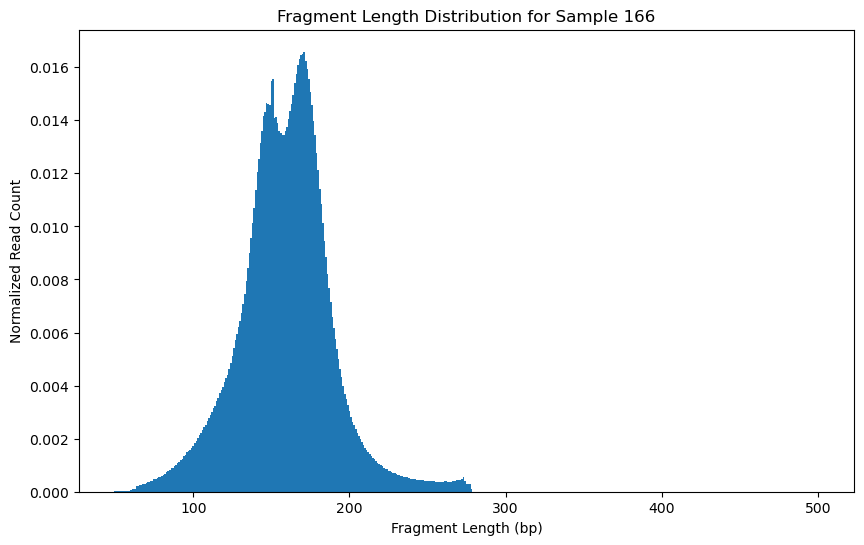

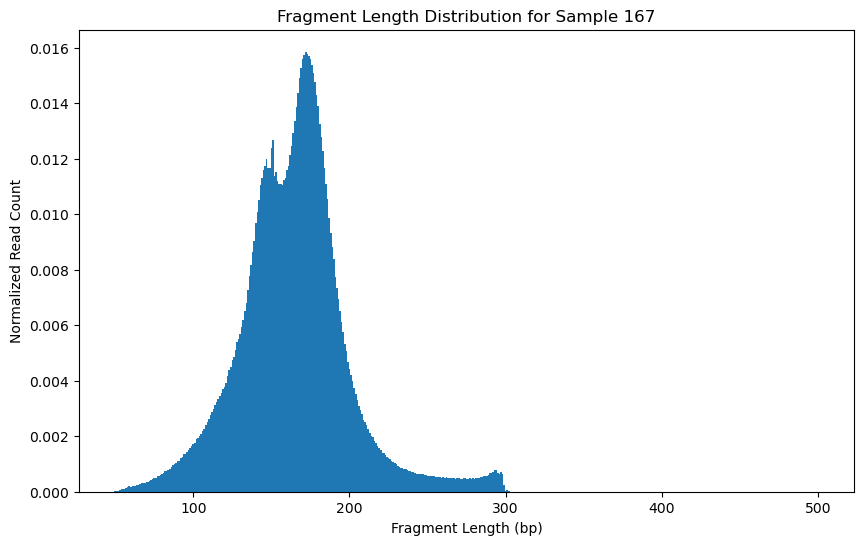

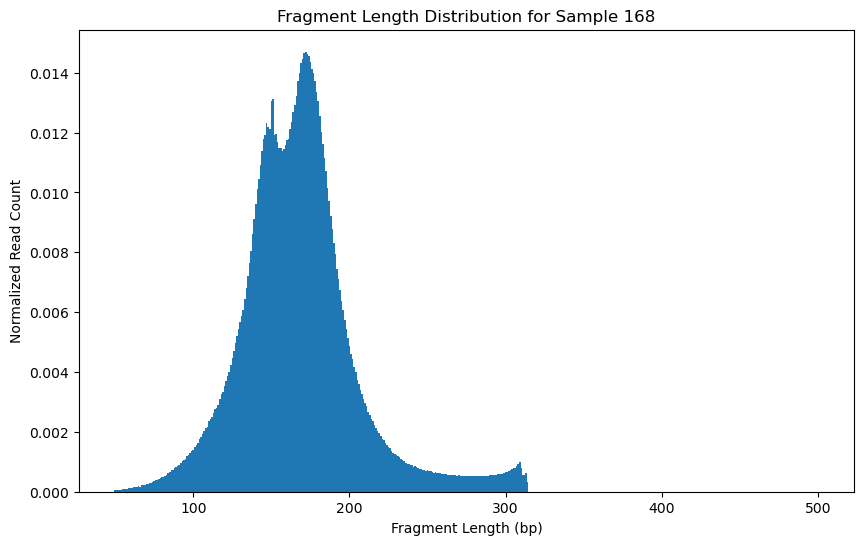

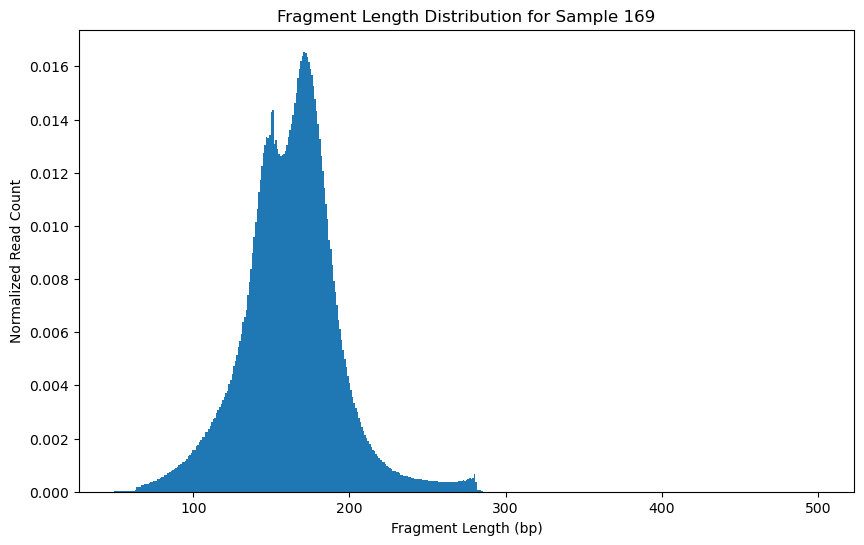

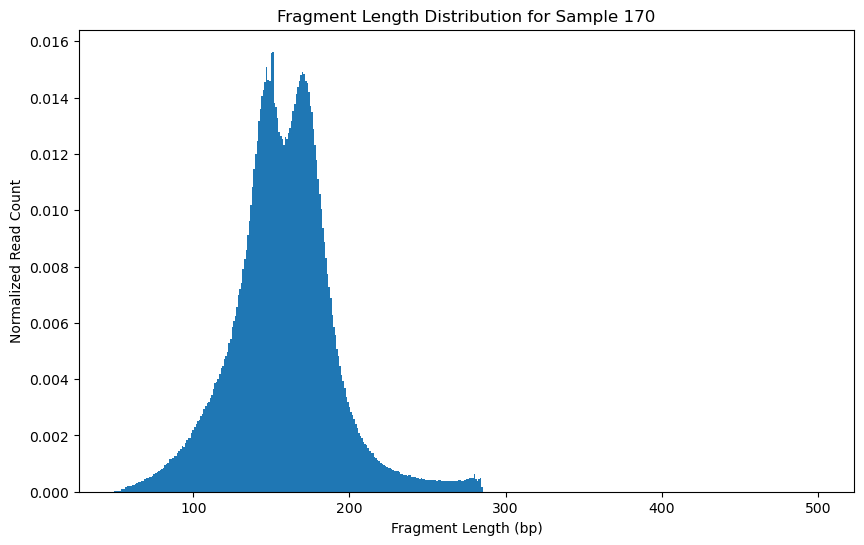

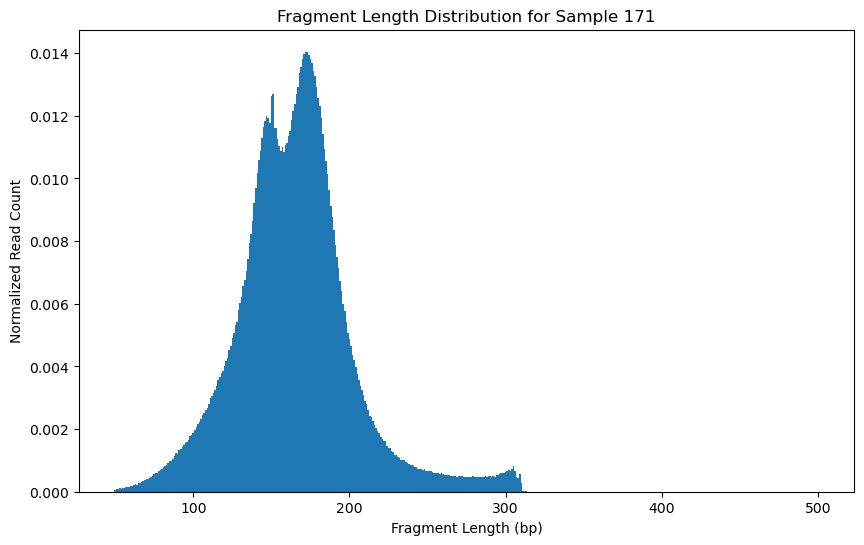

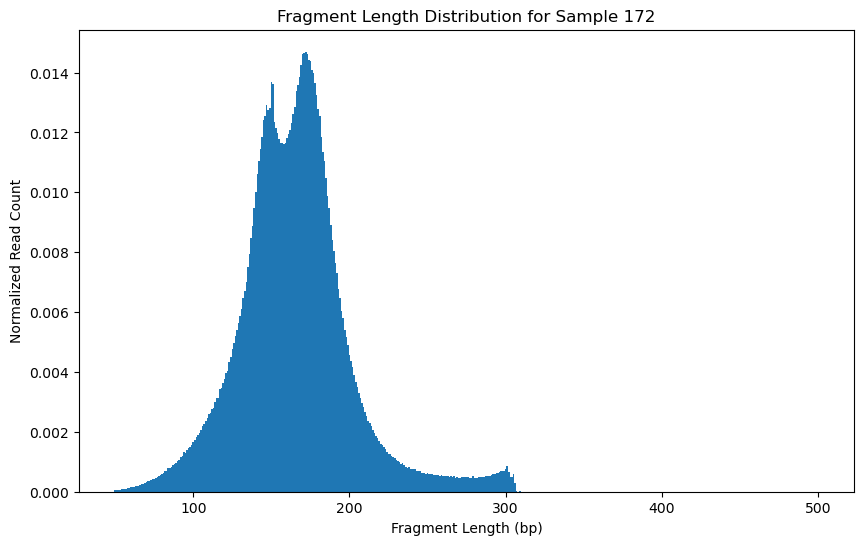

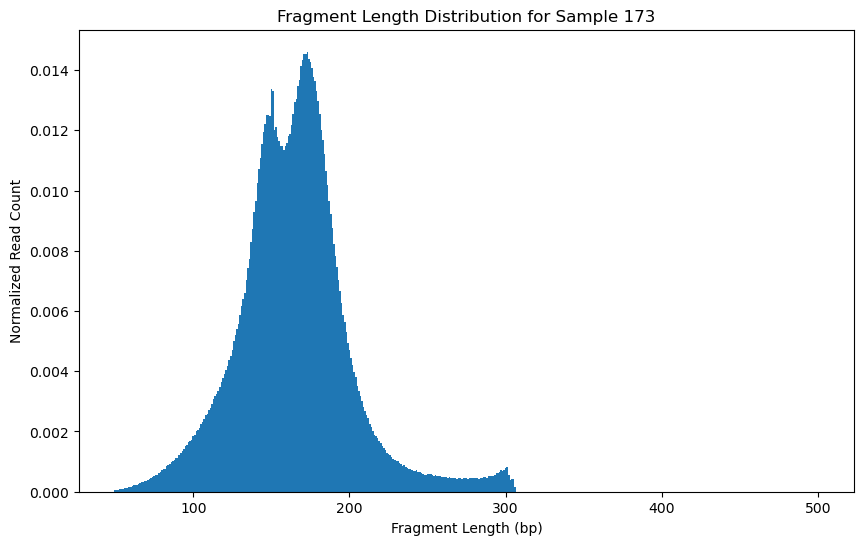

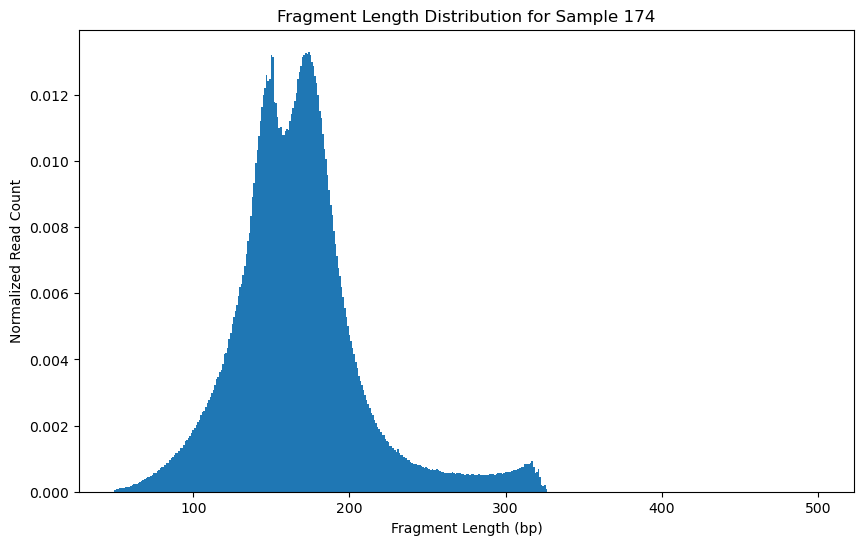

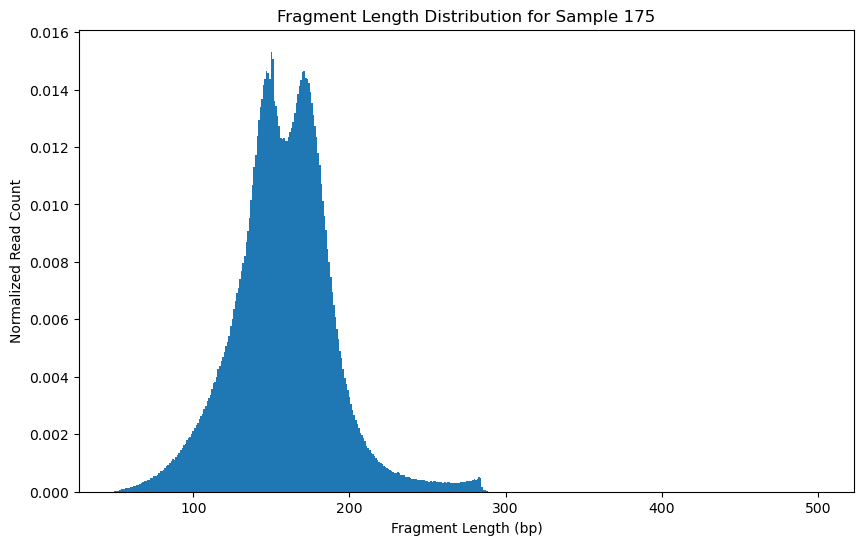

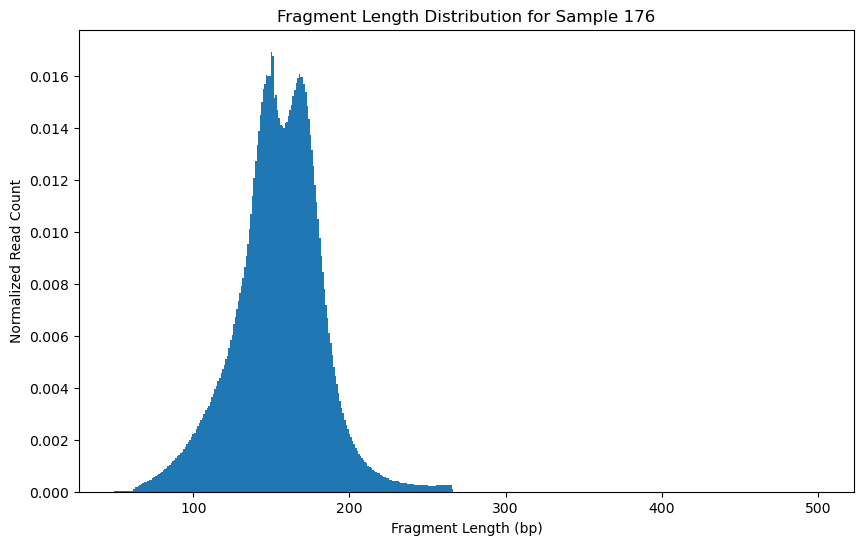

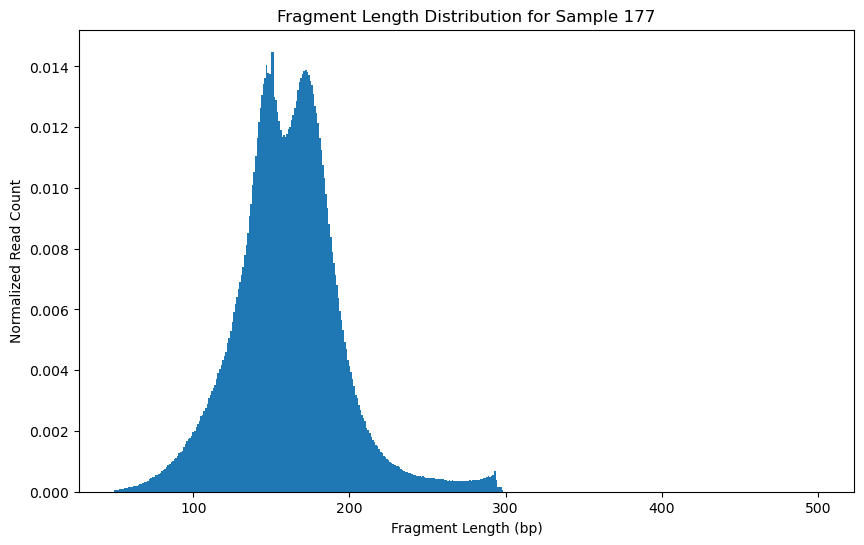

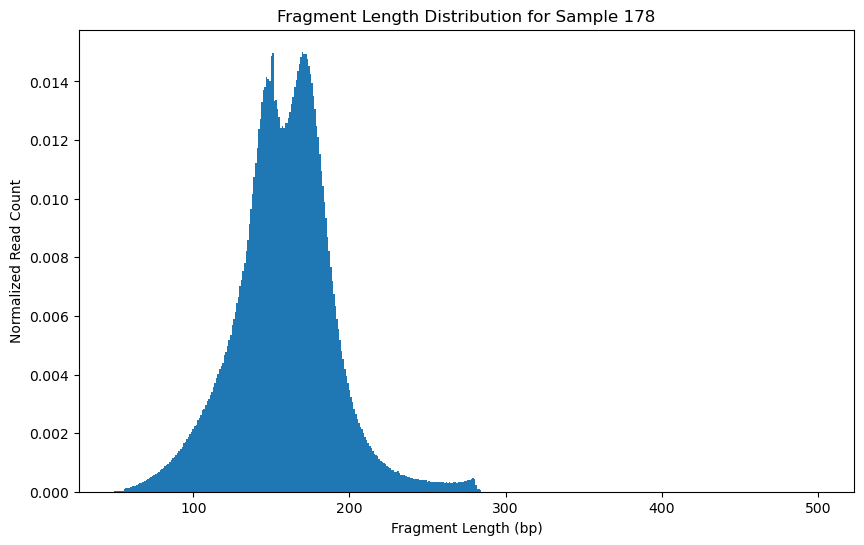

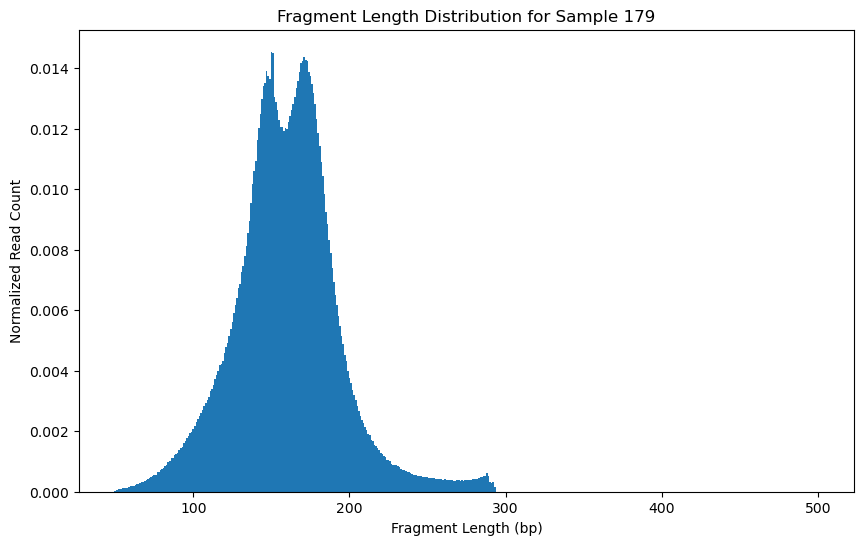

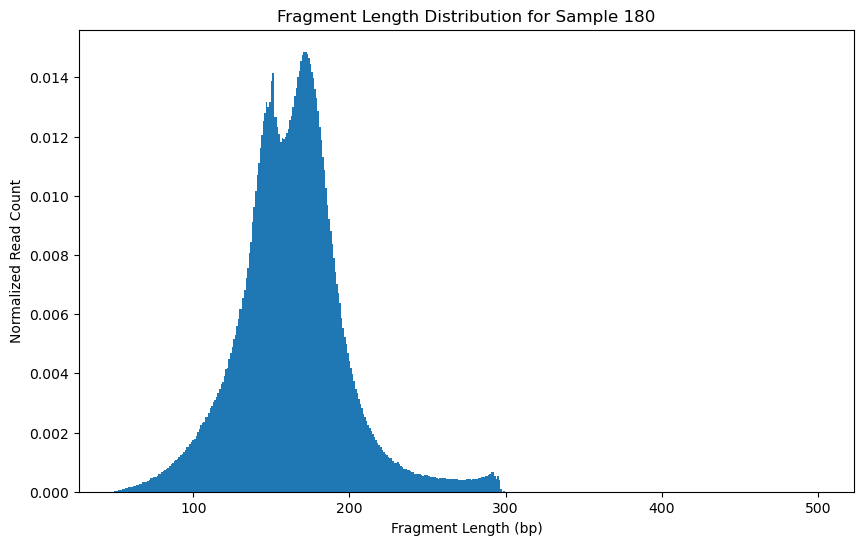

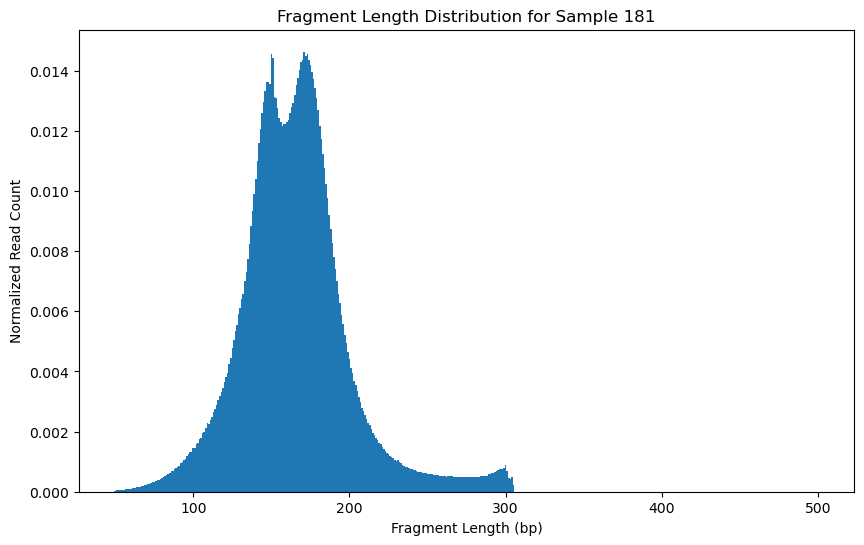

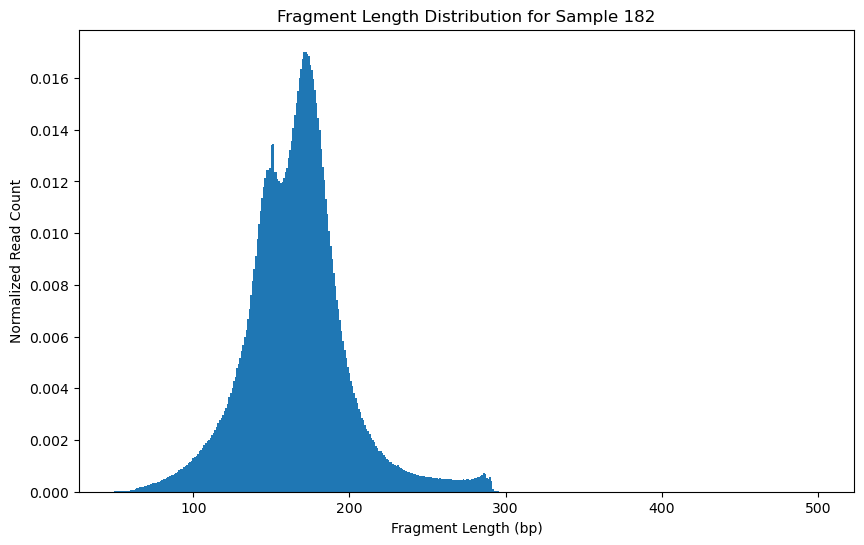

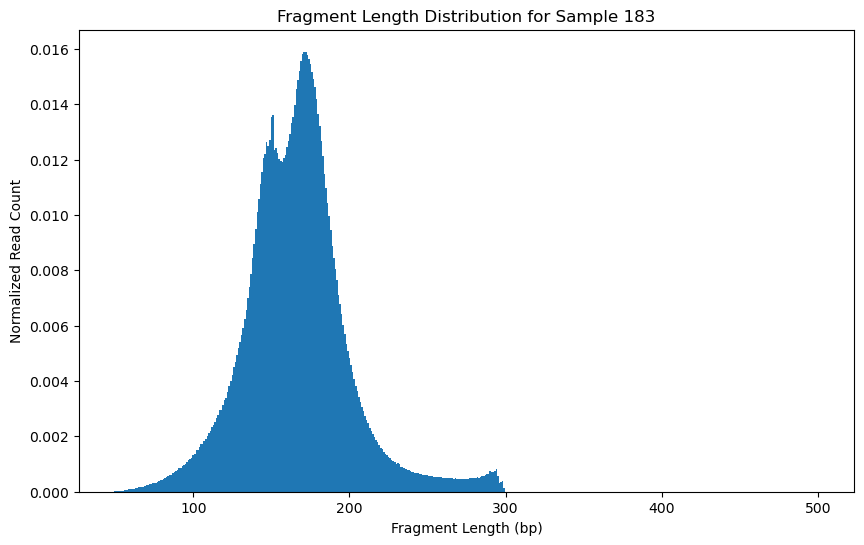

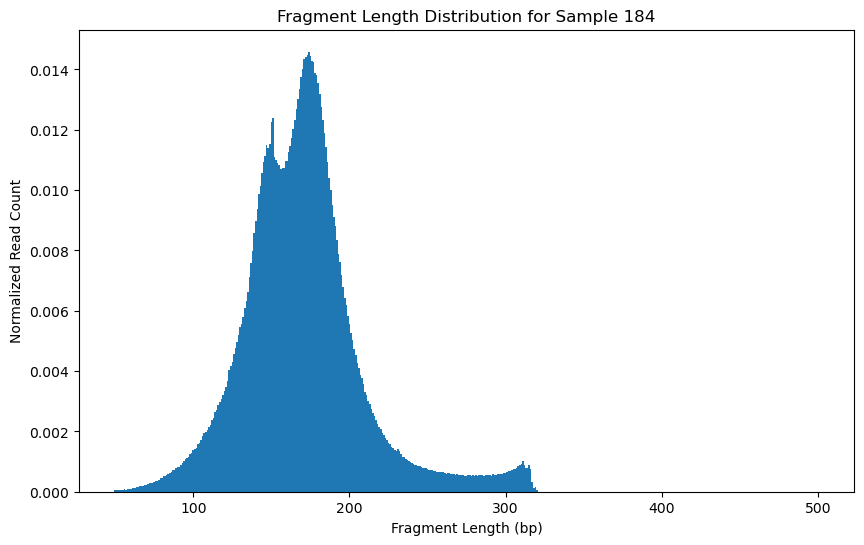

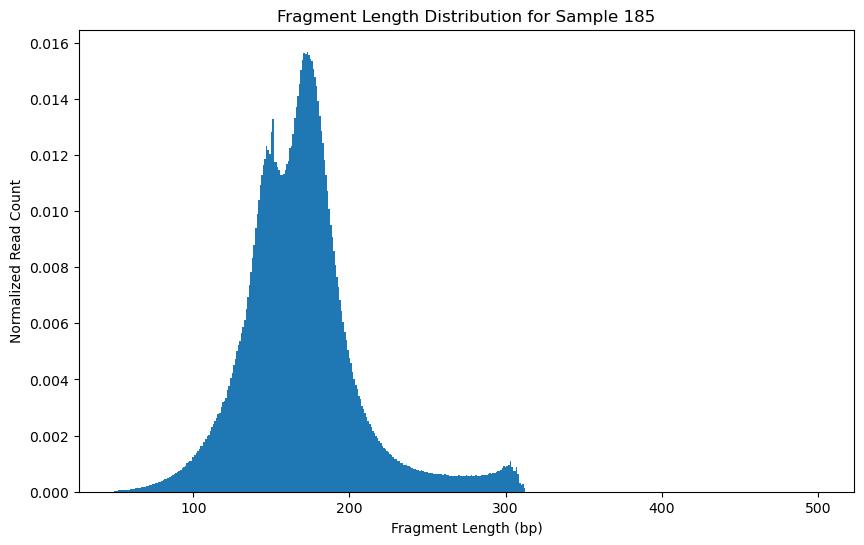

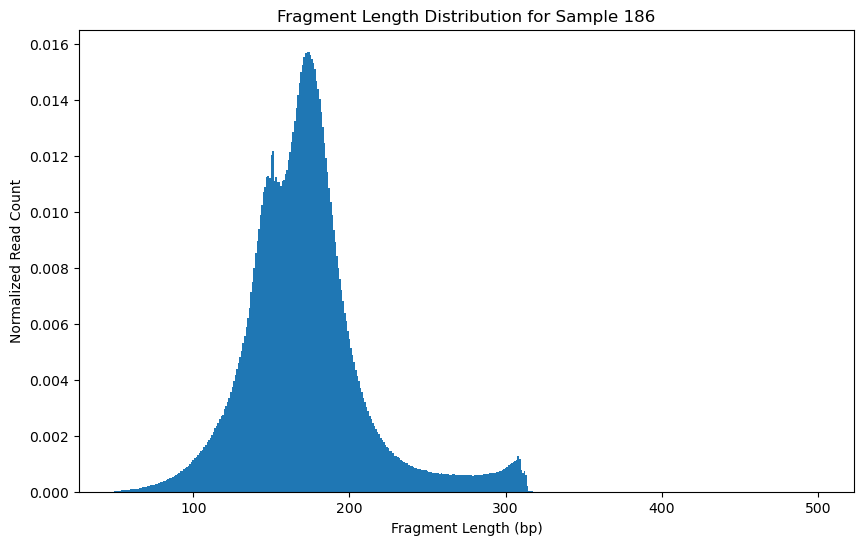

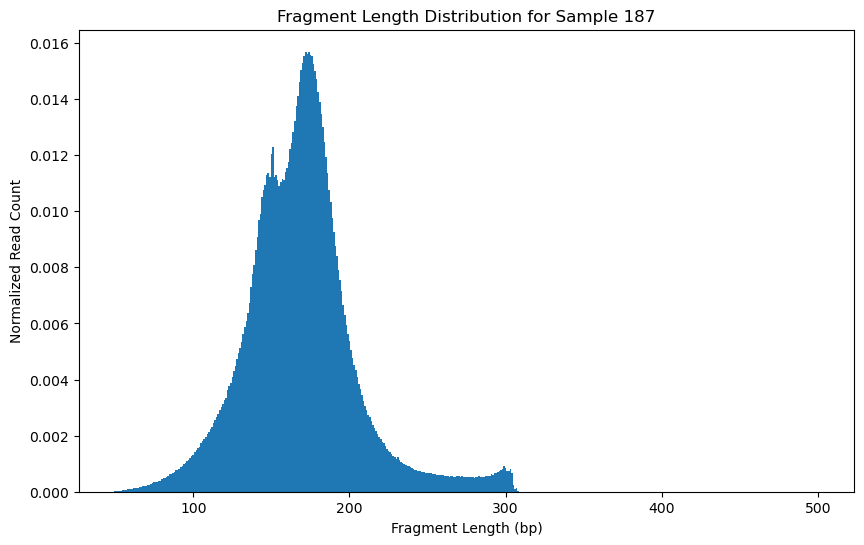

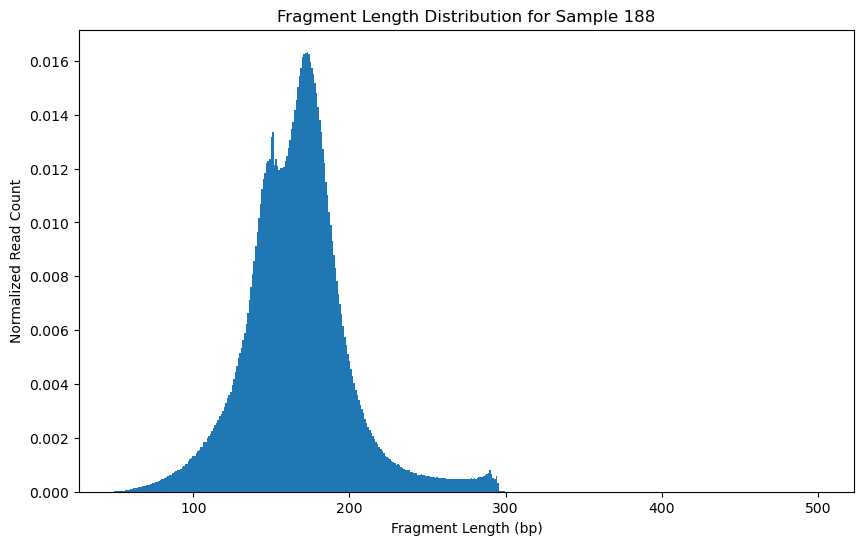

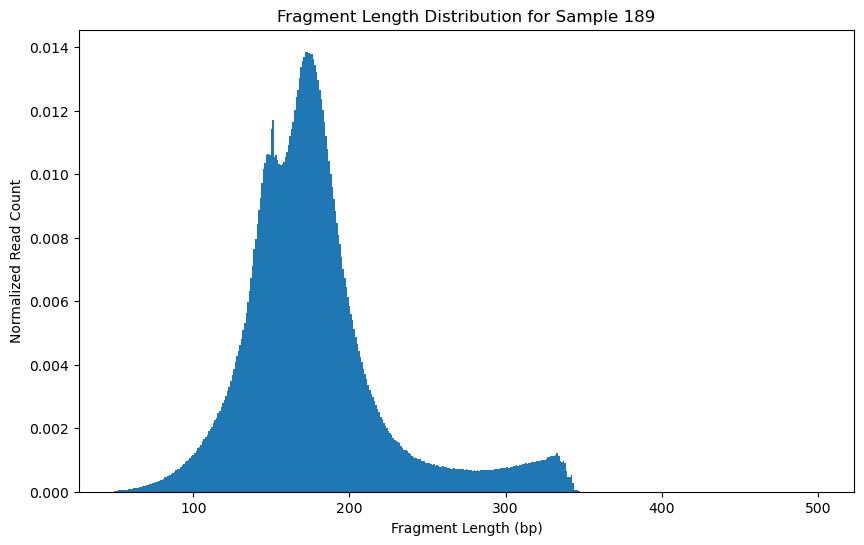

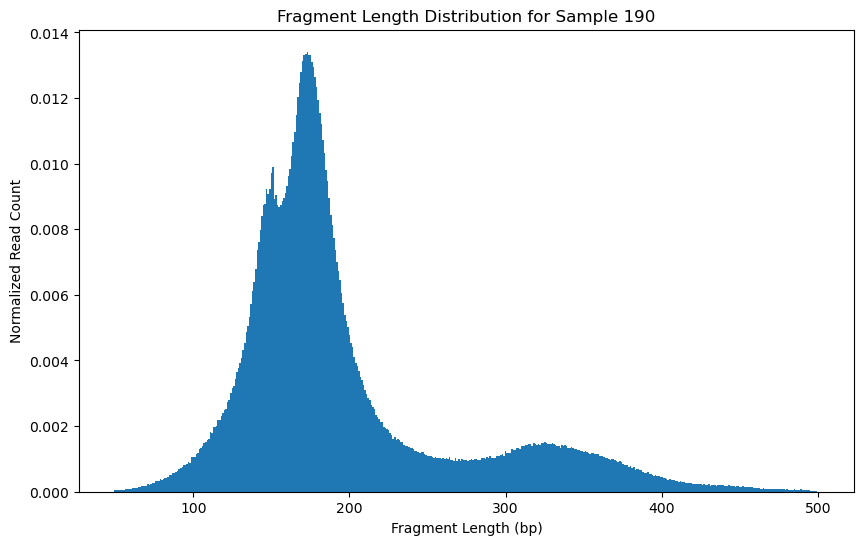

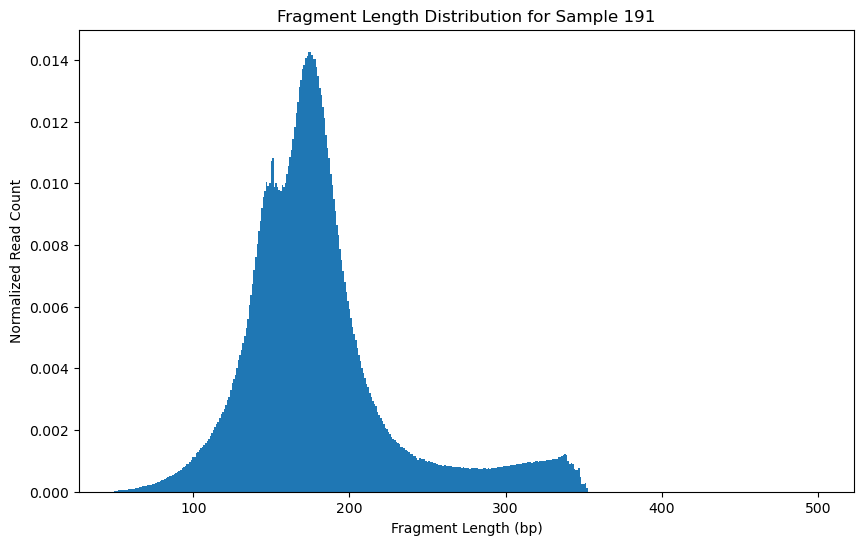

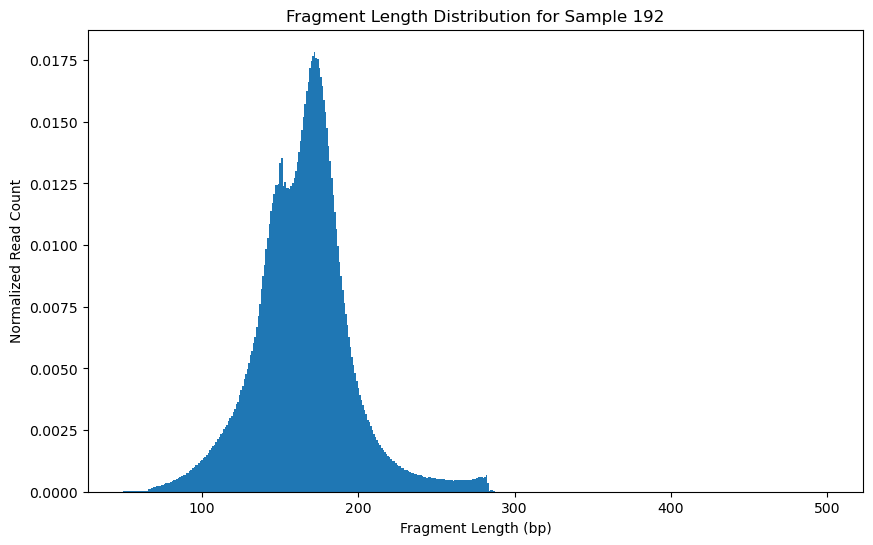

In [19]:
for i in range(1,193):
    plot_sample_distribution(i)

In [9]:
def periodicity(sample_num):
    
    fragment_lengths = np.repeat(all_counts.columns.astype(int), all_counts.iloc[sample_num-1])
    
    hist, bin_edges = np.histogram(fragment_lengths, bins=451, range=(50, 500))

    # Apply FFT to the histogram values
    hist_fft = fft(hist)
    frequencies = fftfreq(len(hist), (bin_edges[1] - bin_edges[0]))

    # Keep only the positive frequencies
    positive_frequencies = frequencies[:len(frequencies) // 2]
    positive_hist_fft = hist_fft[:len(hist_fft) // 2]

    # Remove zero frequencies and corresponding FFT values
    non_zero_indices = positive_frequencies != 0
    periods = 1 / positive_frequencies[non_zero_indices]
    power_spectrum = np.abs(positive_hist_fft[non_zero_indices]) ** 2
    
    # Filter periods to only consider those less than 13 bp
    valid_periods = periods < 13
    filtered_periods = periods[valid_periods]
    filtered_power_spectrum = power_spectrum[valid_periods]
    
    # Find peaks
    peaks, _ = find_peaks(filtered_power_spectrum)
    peak_periods = filtered_periods[peaks]
    peak_powers = filtered_power_spectrum[peaks]
    
    # Dict of periods and powers sorted by power
    peaks_dict = {period: power for period, power in zip(peak_periods, peak_powers)}
    sorted_peaks_dict = dict(sorted(peaks_dict.items(), key=lambda item: item[1], reverse=True))

    # Plot the power spectrum
    plt.figure()
    plt.plot(filtered_periods, filtered_power_spectrum, label='Power Spectrum')

    for i, (period, power) in enumerate(sorted_peaks_dict.items()):
        if i < 3:  # Label the top 3 peaks
            plt.axvline(x=period, color='r', linestyle='--', alpha=0.5)
            plt.text(period, 1.0e9, f'{period:.2f}', rotation=90, ha='right')
    
    plt.xlabel('Period')
    plt.ylabel('Power')
    plt.title('Power Spectrum of Fragment Lengths Histogram')
    plt.xlim(0, 13)  # Limit x-axis to 13 bp
    plt.ylim(0, 1.5e9)
    plt.legend()
    plt.show()
    
    top_3_peaks = list(sorted_peaks_dict.items())[:3]
    
    # Separate into periods and powers
    periods = [p[0] for p in top_3_peaks]
    powers = [p[1] for p in top_3_peaks]
    
    return periods, powers

In [10]:
def add_top_peaks_to_df(df):
    df['Period_1'] = np.nan
    df['Power_1'] = np.nan
    df['Period_2'] = np.nan
    df['Power_2'] = np.nan
    df['Period_3'] = np.nan
    df['Power_3'] = np.nan

    for sample_num in df['sample_num']:
        periods, powers = periodicity(int(sample_num))
        
        df.loc[df['sample_num'] == sample_num, 'Period_1'] = periods[0]
        df.loc[df['sample_num'] == sample_num, 'Power_1'] = powers[0]
        df.loc[df['sample_num'] == sample_num, 'Period_2'] = periods[1]
        df.loc[df['sample_num'] == sample_num, 'Power_2'] = powers[1]
        df.loc[df['sample_num'] == sample_num, 'Period_3'] = periods[2]
        df.loc[df['sample_num'] == sample_num, 'Power_3'] = powers[2]

    return df

In [11]:
clinical_peaks = add_top_peaks_to_df(clinical)

NameError: name 'all_counts' is not defined

In [21]:
clinical_peaks.head()

sample_num collection_ID sample_type sample_type_3 als_type cohort  \
0           1           NaN        ctrl          ctrl      NaN   ucsf   
1           2           NaN        ctrl          ctrl      NaN   ucsf   
2           3           NaN        ctrl          ctrl      NaN   ucsf   
3           4           NaN        ctrl          ctrl      NaN   ucsf   
4           5           NaN        ctrl          ctrl      NaN   ucsf   

   als_frs  als_frs_slope   age  age_at_onset   ... post_otr     mean_fl  \
0      NaN            NaN  74.0            NaN  ...   256684  175.535263   
1      NaN            NaN  57.0            NaN  ...   195718  182.714829   
2      NaN            NaN  47.0            NaN  ...   257410  187.014856   
3      NaN            NaN  55.0            NaN  ...   227446  196.295752   
4      NaN            NaN  80.0            NaN  ...   279048  185.834278   

  median_fl  num_fragments   Period_1       Power_1   Period_2       Power_2  \
0     174.0        7278060  10.975610  9.505435e+08  10.227273  8.474935e+08   
1     177.0        6061038  10.465116  4.622797e+08  10.975610  4.073129e+08   
2     177.0        7926972  10.975610  5.361741e+08  10.465116  5.105227e+08   
3     182.0        7583456  10.975610  3.523522e+08   3.658537  2.390429e+08   
4     175.0        8698916  10.714286  1.071474e+09  10.000000  5.897938e+08   

    Period_3       Power_3  
0   9.574468  6.382240e+08  
1   5.172414  2.719040e+08  
2  10.000000  4.982240e+08  
3   7.258065  1.878346e+08  
4   8.333333  4.039421e+08  

[5 rows x 30 columns]

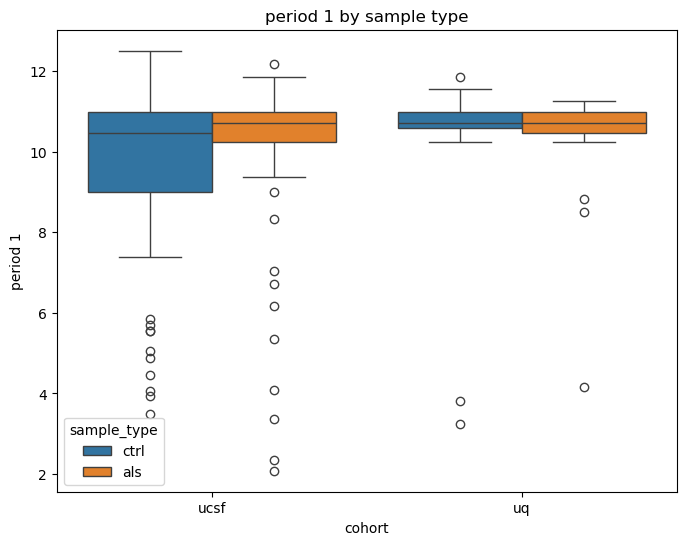

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical_peaks, x='cohort', y='Period_1', hue='sample_type')
plt.title('period 1 by sample type')
plt.ylabel('period 1')
plt.show()

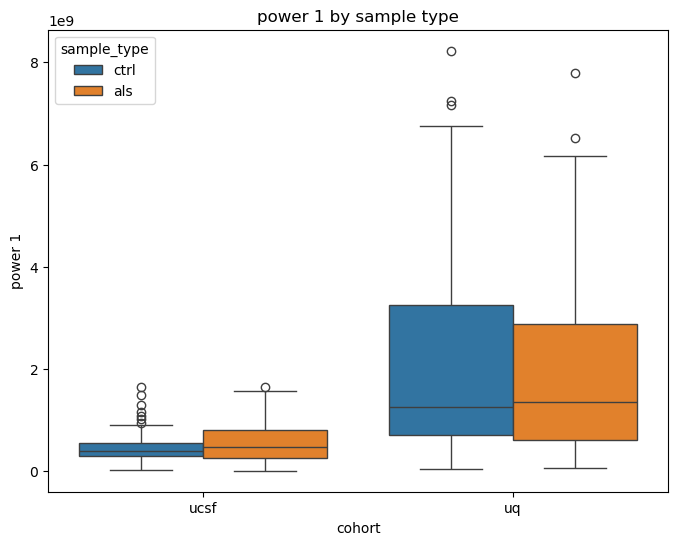

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical_peaks, x='cohort', y='Power_1', hue='sample_type')
plt.title('power 1 by sample type')
plt.ylabel('power 1')
plt.show()

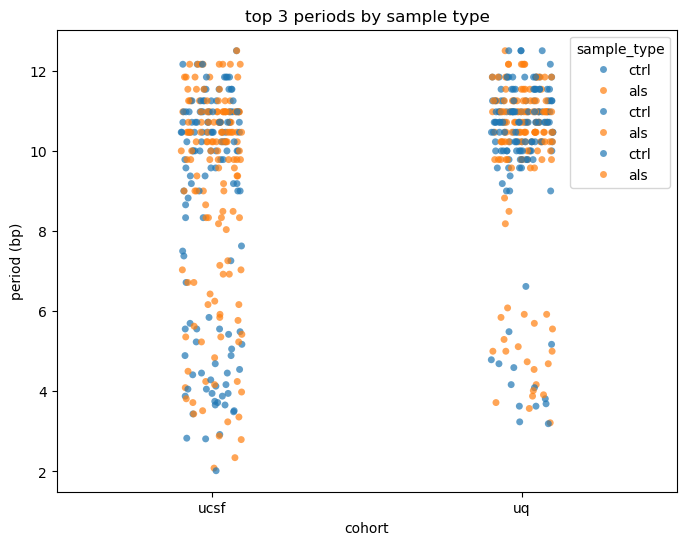

In [24]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=clinical_peaks, x='cohort', y='Period_1', hue='sample_type', jitter=True, alpha=0.7)
sns.stripplot(data=clinical_peaks, x='cohort', y='Period_2', hue='sample_type', jitter=True, alpha=0.7)
sns.stripplot(data=clinical_peaks, x='cohort', y='Period_3', hue='sample_type', jitter=True, alpha=0.7)
plt.title('top 3 periods by sample type')
plt.xlabel('cohort')
plt.ylabel('period (bp)')

plt.show()

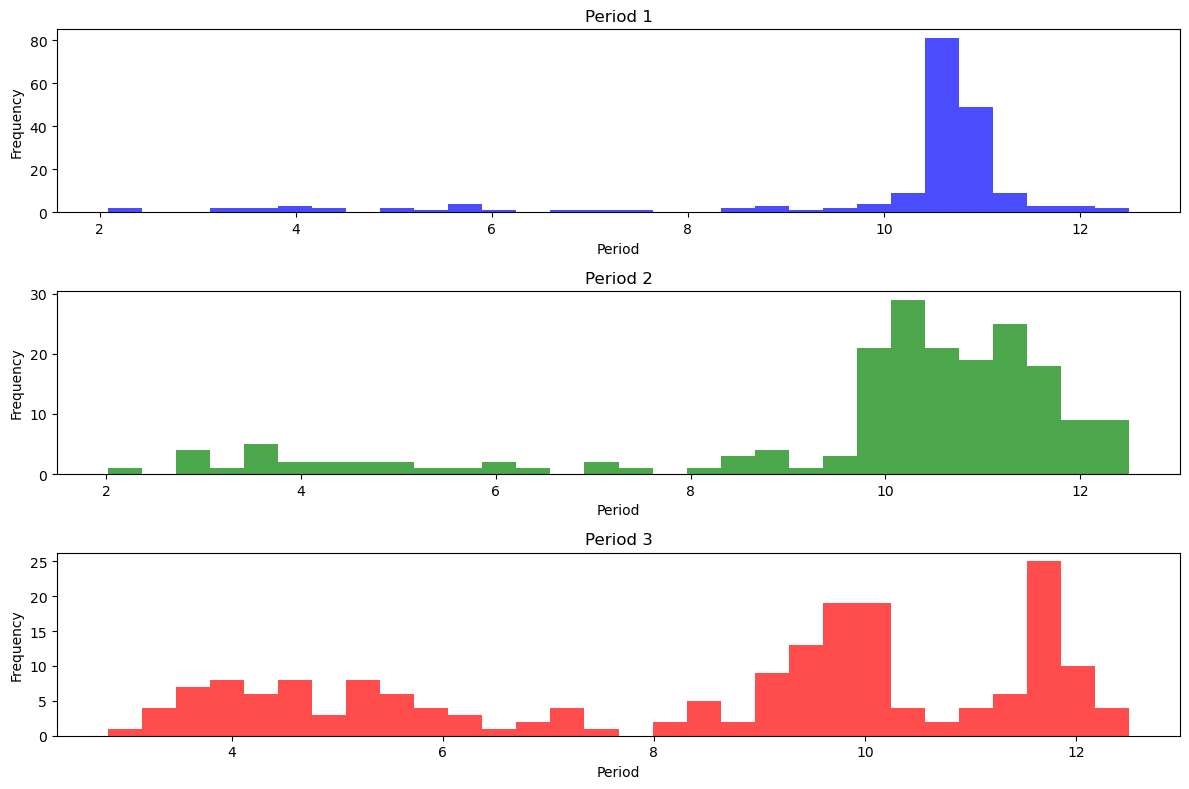

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(clinical_peaks['Period_1'], bins=30, color='b', alpha=0.7)
plt.title('Period 1')
plt.xlabel('Period')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(clinical_peaks['Period_2'], bins=30, color='g', alpha=0.7)
plt.title('Period 2')
plt.xlabel('Period')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(clinical_peaks['Period_3'], bins=30, color='r', alpha=0.7)
plt.title('Period 3')
plt.xlabel('Period')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

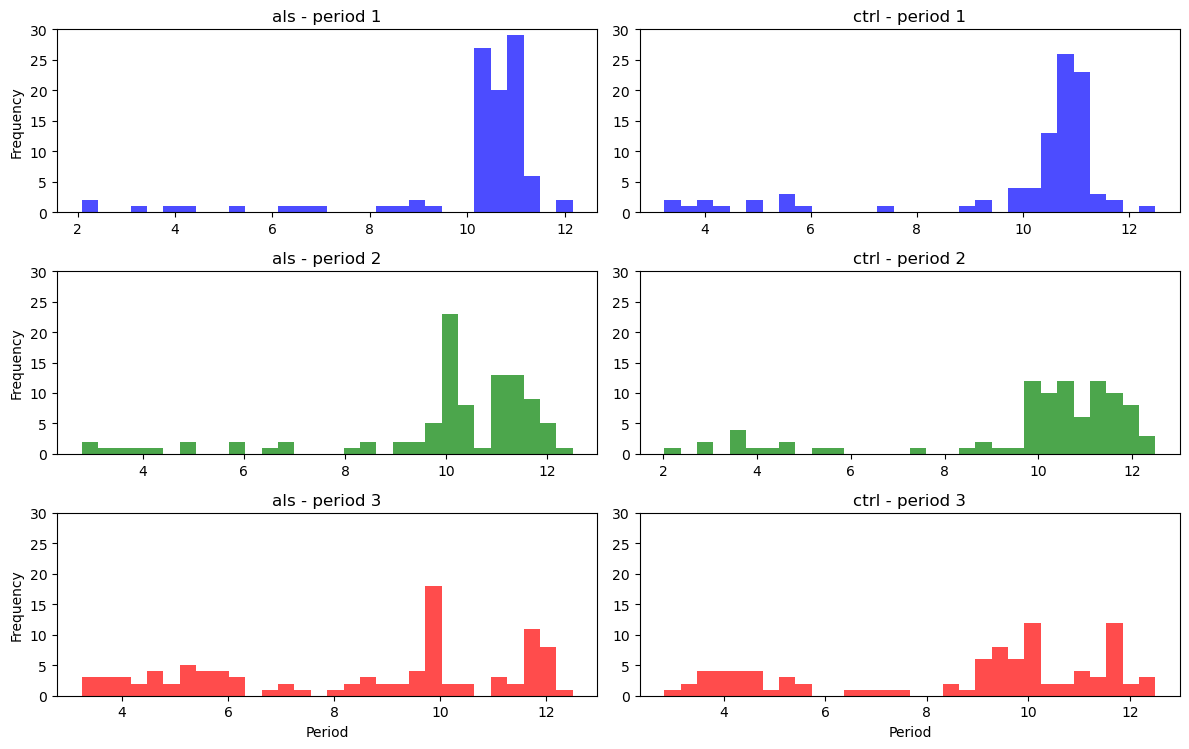

In [32]:
plt.figure(figsize=(12, 8))

# ALS Plots
plt.subplot(3, 2, 1)
plt.hist(clinical_peaks[clinical_peaks['sample_type'] == 'als']['Period_1'], bins=30, color='b', alpha=0.7)
plt.title('als - period 1')
plt.ylim(0, 30)
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
plt.hist(clinical_peaks[clinical_peaks['sample_type'] == 'als']['Period_2'], bins=30, color='g', alpha=0.7)
plt.title('als - period 2')
plt.ylim(0, 30)
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.hist(clinical_peaks[clinical_peaks['sample_type'] == 'als']['Period_3'], bins=30, color='r', alpha=0.7)
plt.title('als - period 3')
plt.xlabel('Period')
plt.ylim(0, 30)
plt.ylabel('Frequency')

# Control Plots
plt.subplot(3, 2, 2)
plt.hist(clinical_peaks[clinical_peaks['sample_type'] == 'ctrl']['Period_1'], bins=30, color='b', alpha=0.7)
plt.title('ctrl - period 1')
plt.ylim(0, 30)

plt.subplot(3, 2, 4)
plt.hist(clinical_peaks[clinical_peaks['sample_type'] == 'ctrl']['Period_2'], bins=30, color='g', alpha=0.7)
plt.title('ctrl - period 2')
plt.ylim(0, 30)

plt.subplot(3, 2, 6)
plt.hist(clinical_peaks[clinical_peaks['sample_type'] == 'ctrl']['Period_3'], bins=30, color='r', alpha=0.7)
plt.title('ctrl - period 3')
plt.xlabel('Period')
plt.ylim(0, 30)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

In [29]:
#clinical_peaks.to_csv("./clinical_peaks.csv", index=False)